# Etude de marché Python.

# Partie 1

In [1]:
# Importation des bibliothèques

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Désactivation des avertissements
warnings.filterwarnings('ignore')

# Chargement des données
Data_perso = pd.read_csv("Data_persO.csv", decimal=".")
Disp_ali = pd.read_csv("DisponibiliteAlimentaire_2017.csv", decimal=".", index_col=0)
Pib_pay = pd.read_csv("FAOSTAT_data_1.csv", decimal=".", index_col=0)
Politik_Stability = pd.read_csv("PoliticalStability.csv", decimal=".")
Indice_prix_production_Poulet = pd.read_csv("FAOSTAT_data_2.csv", decimal=".", index_col=0)
Dépenses_Administrations_Publiques = pd.read_csv("FAOSTAT_data_4.csv", decimal=".", index_col=0)


>
## - Préparation des différents dataset.
>

## Dataset PIB.

In [2]:
display(Pib_pay.head(3))
Pib_pay=Pib_pay.query("Produit=='Produit Intérieur Brut'")
Pib_pays=Pib_pay.reset_index()[["Zone","Élément","Année","Valeur"]]
Pib_pays=Pib_pays.set_index(["Zone","Année"]).pivot(columns=['Élément'], values='Valeur').reset_index().rename(columns={"Croissance annuelle US$":"Pib_pays_Croissance/an/%","Valeur US $ par habitant":"Pib_pays_Valeur/hab"})
columns=["Pays","Année","Pib_pays_Croissance/an/%","Pib_pays_Valeur/hab"]
Pib_pays.columns=columns
Pib_pays.head()   

Domaine  Code zone (M49)         Zone  Code Élément  \
Code Domaine                                                                  
MK            Indicateurs macro                4  Afghanistan          6119   
MK            Indicateurs macro                4  Afghanistan          6129   
MK            Indicateurs macro                4  Afghanistan          6119   

                               Élément  Code Produit                 Produit  \
Code Domaine                                                                   
MK            Valeur US $ par habitant         22008  Produit Intérieur Brut   
MK             Croissance annuelle US$         22008  Produit Intérieur Brut   
MK            Valeur US $ par habitant         22008  Produit Intérieur Brut   

              Code année  Année Unité      Valeur Symbole  \
Code Domaine                                                
MK                  2014   2014   US$  585.862673       X   
MK                  2014   2014     %   -0.362351       E   
MK                  2015   2015   US$  543.768940       X   

                         Description du Symbole  Note  
Code Domaine                                           
MK            Ciffre de sources internationales   NaN  
MK                               Valeur estimée   NaN  
MK            Ciffre de sources internationales   NaN

Pays  Année  Pib_pays_Croissance/an/%  Pib_pays_Valeur/hab
0  Afghanistan   2014                 -0.362351           585.862673
1  Afghanistan   2015                 -4.284522           543.768940
2  Afghanistan   2016                 -3.705918           509.271172
3  Afghanistan   2017                  4.865790           520.616409
4  Afghanistan   2018                 -2.526962           495.504343

## Dataset Poulet_Valeur.

In [3]:
display(Indice_prix_production_Poulet.head(3))
Poulet_Valeur=Indice_prix_production_Poulet.reset_index()[["Zone","Année","Valeur"]]
Columns=["Pays","Année","Valeur"]
Poulet_Valeur.columns=Columns
Poulet_Valeur.head()  

Domaine  Code zone (M49)         Zone  \
Code Domaine                                                       
PP            Prix à la Production                4  Afghanistan   
PP            Prix à la Production                4  Afghanistan   
PP            Prix à la Production                4  Afghanistan   

              Code Élément                                            Élément  \
Code Domaine                                                                    
PP                    5539  Indice des prix à la production (2014-2016 = 100)   
PP                    5539  Indice des prix à la production (2014-2016 = 100)   
PP                    5539  Indice des prix à la production (2014-2016 = 100)   

             Code Produit (CPC)  \
Code Domaine                      
PP                       21121b   
PP                       21121b   
PP                       21121b   

                                                      Produit  Code année  \
Code Domaine                                                                
PP            Viande poids vif, poulet, fraîche ou réfrigérée        2016   
PP            Viande poids vif, poulet, fraîche ou réfrigérée        2017   
PP            Viande poids vif, poulet, fraîche ou réfrigérée        2018   

              Année  Code Mois           Mois  Unité  Valeur Symbole  \
Code Domaine                                                           
PP             2016       7021  Valeur annuel    NaN   93.36       I   
PP             2017       7021  Valeur annuel    NaN   89.57       I   
PP             2018       7021  Valeur annuel    NaN   85.02       I   

             Description du Symbole  
Code Domaine                         
PP                   Valeur imputée  
PP                   Valeur imputée  
PP                   Valeur imputée

Pays  Année  Valeur
0  Afghanistan   2016   93.36
1  Afghanistan   2017   89.57
2  Afghanistan   2018   85.02
3  Afghanistan   2019   88.13
4  Afghanistan   2020   89.10

## Dataset Dépenses_Administrations_Publiques et Environnement.

In [4]:
display(Dépenses_Administrations_Publiques.head(3))
Dep_publik=Dépenses_Administrations_Publiques[(Dépenses_Administrations_Publiques["Produit"]=="Dépenses (Administrations Publiques)")|(Dépenses_Administrations_Publiques["Produit"]=="Protection de lénvironnement (Administrations Publiques)")][["Zone","Année","Valeur","Produit"]].reset_index().set_index(["Zone","Année"]).pivot(columns=['Produit'], values='Valeur').reset_index().rename(columns={"Dépenses (Administrations Publiques)":"Dép(Admi_Publiq)","Protection de lénvironnement (Administrations Publiques)":"Protec_Env"})
Columns=['Pays', 'Année', 'Dép(Admi_Publiq)', 'Protec_Env']
Dep_publik.columns=Columns
Dep_publik.head()  

Domaine  Code zone (M49)         Zone  Code Élément  \
Code Domaine                                                                   
IG            Dépenses publiques                4  Afghanistan          6110   
IG            Dépenses publiques                4  Afghanistan          6110   
IG            Dépenses publiques                4  Afghanistan          6110   

                  Élément  Code Produit  \
Code Domaine                              
IG            Valeur US $         23130   
IG            Valeur US $         23130   
IG            Valeur US $         23131   

                                                        Produit  Code année  \
Code Domaine                                                                  
IG                         Dépenses (Administrations Publiques)        2016   
IG                         Dépenses (Administrations Publiques)        2017   
IG            Agriculture, sylviculture, pêche (Administrati...        2016   

              Année     Unité       Valeur Symbole  \
Code Domaine                                         
IG             2016  millions  9299.089340       X   
IG             2017  millions  9095.510866       X   
IG             2016  millions   311.850438       X   

                         Description du Symbole  \
Code Domaine                                      
IG            Ciffre de sources internationales   
IG            Ciffre de sources internationales   
IG            Ciffre de sources internationales   

                                                     Note  
Code Domaine                                               
IG            Consolidated General Government Expenditure  
IG            Consolidated General Government Expenditure  
IG            Consolidated General Government Expenditure

Pays  Année  Dép(Admi_Publiq)   Protec_Env
0     Afghanistan   2016       9299.089340    25.092549
1     Afghanistan   2017       9095.510866    34.955836
2  Afrique du Sud   2016     102874.441161   746.586710
3  Afrique du Sud   2017     118821.281476   884.295279
4  Afrique du Sud   2018     129162.637164  1076.058880

## Dataset Disponibilité Alimentaire (Milliers de tonnes)

In [5]:
display(Disp_ali.head(3))
[Disp_ali[i].unique() for i in ["Produit","Élément"]]   # Viande de Volailles et choix liste.
liste=["Production","Importations - Quantité","Disponibilité intérieure","Nourriture","Exportations - Quantité" ,"Disponibilité intérieure"]
Disp_alim=Disp_ali[Disp_ali.Élément.isin(liste)].query("Produit=='Viande de Volailles'")[["Zone","Élément","Année" ,"Valeur"]].set_index(["Zone","Année"]).pivot(columns=['Élément'], values='Valeur').reset_index().rename(columns={"Disponibilité intérieure":"Disp_int","Exportations - Quantité":"Exportations","Importations - Quantité":"Importations"})
Columns=['Pays', 'Année', 'Poulet_Dispo_Int', 'Poulet_Expor', 'Poulet_Impor','Poulet_Alimentaire', 'Poulet_Production']
Disp_alim.columns=Columns
Disp_alim.head()

Domaine  Code zone         Zone  \
Code Domaine                                                        
FBS           Nouveaux Bilans Alimentaire          2  Afghanistan   
FBS           Nouveaux Bilans Alimentaire          2  Afghanistan   
FBS           Nouveaux Bilans Alimentaire          2  Afghanistan   

              Code Élément                  Élément  Code Produit  \
Code Domaine                                                        
FBS                   5511               Production          2511   
FBS                   5611  Importations - Quantité          2511   
FBS                   5072       Variation de stock          2511   

                      Produit  Code année  Année               Unité  Valeur  \
Code Domaine                                                                   
FBS           Blé et produits        2017   2017  Milliers de tonnes  4281.0   
FBS           Blé et produits        2017   2017  Milliers de tonnes  2302.0   
FBS           Blé et produits        2017   2017  Milliers de tonnes  -119.0   

             Symbole Description du Symbole  
Code Domaine                                 
FBS                S  Données standardisées  
FBS                S  Données standardisées  
FBS                S  Données standardisées

Pays  Année  Poulet_Dispo_Int  Poulet_Expor  Poulet_Impor  \
0     Afghanistan   2017              57.0           NaN          29.0   
1  Afrique du Sud   2017            2118.0          63.0         514.0   
2         Albanie   2017              47.0           0.0          38.0   
3         Algérie   2017             277.0           0.0           2.0   
4       Allemagne   2017            1739.0         646.0         842.0   

   Poulet_Alimentaire  Poulet_Production  
0                55.0               28.0  
1              2035.0             1667.0  
2                47.0               13.0  
3               264.0              275.0  
4              1609.0             1514.0

## Dataset Politik_Stab

In [6]:
display(Politik_Stability.head(3))
Politik_Stab=Politik_Stability[["Country","Year","Political_Stability"]]
col_Politik_Stab=["Pays","Année","Politik_Stab"]
Politik_Stab.columns=col_Politik_Stab
Politik_Stab.head(3)

Country  Year  Political_Stability Granularity
0  Afghanistan  2000                -2.44       Total
1  Afghanistan  2002                -2.04       Total
2  Afghanistan  2003                -2.20       Total

Pays  Année  Politik_Stab
0  Afghanistan   2000         -2.44
1  Afghanistan   2002         -2.04
2  Afghanistan   2003         -2.20

>
### <u>Dans le cas de mon étude, je vais m'aider de l'Analyse PESTREL.</u>
>
>

Une  méthode  utilisée dans le cadre de l'Analyse Multicritère d'Aide à la Décision (MCDA) qui vise

 à sélectionner des données pertinentes pour l'étude de différents sujets de société.

La méthode PESTREL permet en effet de sélectionner des données pertinentes en considérant les critères suivants :

- Politique : Les données politiques comprennent les politiques gouvernementales, les réglementations, les lois, les relations internationales, etc.

- Économique : Les données économiques comprennent les indicateurs économiques tels que le PIB, l'inflation, le chômage, les taux d'intérêt, etc.

- Social : Les données sociales englobent les aspects démographiques, socioculturels, de santé publique, d'éducation, de style de vie, etc.

- Technologique : Les données technologiques concernent les innovations technologiques, les progrès scientifiques, les infrastructures technologiques, etc.

- Réglementaire : Les données réglementaires portent sur les normes, les réglementations industrielles, les exigences environnementales, etc.

- Environnemental : Les données environnementales incluent les aspects liés à l'environnement tels que la qualité de l'air, de l'eau, la biodiversité, les changements climatiques, etc.

- Légal : Les données légales concernent les aspects juridiques, les lois, les réglementations, les litiges, etc.

## Dataset Personnel

- La collecte de données s inspire des axes de la méthode Pestrel d ou la forte quantités de Features n étant pas exclusive au poulet .

In [7]:
## Features pestrel : data_perso

list(Data_perso.columns[3:])

['Croiss_PIB/pers/an(%)',
 'Frais_prop_intellectuelle_$',
 'Com_informatique(%)',
 'Impor_de_biens_$',
 'Importations_biens_services_$',
 'services_dImportations_$',
 'Services de voyage(%)',
 'Invest_étranger_direct_$',
 'Import_biens_services_et_rev_ primaires_$',
 'Services_transport(%)',
 'Impor_biens_services_croiss_an(%)',
 'Encours_dette_extérieure(% du RNB)',
 'Dép_éducation(% du RNB) ',
 'Consommation de capital fixe (% du RNB)',
 'Taux_scolarisation_primaire(% )',
 ' Enfants_non_scolarisés(% garçons)',
 'Import_energie(%)',
 'Terres_agricoles(km²)Pop Urbaine',
 'Émission_CO2_résidentiels_ et_services_commerciaux(%)',
 'Pop_agglo_urb(+1 million/hab)',
 'Densi_pop(hab/km²)',
 'pop_grande_ville(%)',
 'Croiss_pop_urb/an(%)',
 'Pop_urb',
 'Ratio_réserves_liquidités_bancaires(%)',
 'Taux_intérêt_dépôts(%)',
 'Inflation_prix_conso(%/an)',
 'Distri_auto_(DAB/100ml)',
 'Risk_décès_maternel(%)',
 'Abo_bande_fixe',
 ' Abo_tél_fixe',
 ' Expo_hi_tech(%prod_manuf)',
 'Trans_aérien_fret(mil

>
### Nettoyage data frame Data_perso  - Shape : 766, 48

>
#### le dataframe est en object avec des " .. " pour valeurs manquantes.

- je vais observer les valeurs autours de zéro ainsi que les pays qui comptabilisent le plus je  




In [8]:
df_na__ = Data_perso.copy()

# Assurez-vous que df_na__ est correctement défini
df_na_list_float = df_na__.columns[3:].to_list()

for colonne in df_na_list_float:
    df_na__[colonne] = pd.to_numeric(df_na__[colonne], errors='coerce')


nbr_na = (df_na__.isna()).sum().sum()
print("\nNombre de na :")
print(nbr_na)


Nombre de na :
9006


In [9]:
# Initialisez une liste pour stocker les valeurs égales à 0
valeurs_egales_zero = []

# Parcourez chaque colonne du DataFrame
for colonne in df_na__.columns:
    # Filtrer les valeurs égales à 0 dans la colonne actuelle
    valeurs_filtrees = df_na__[colonne].loc[df_na__[colonne] == 0].tolist()
    
    # Ajoutez ces valeurs filtrées à la liste principale
    valeurs_egales_zero.extend(valeurs_filtrees)

# Affichez la liste des valeurs égales à 0
print("Nombre de valeur égal a 0 :",len(valeurs_egales_zero))


Nombre de valeur égal a 0 : 74


In [10]:
# Initialisez une liste pour stocker toutes les valeurs entre -1 et 1
valeurs_entre_moins_un_et_un = []

# Parcourez chaque colonne du DataFrame
for colonne in df_na__.columns[3:]:
    # Filtrer les valeurs entre -1 et 1 dans la colonne actuelle
    valeurs_filtrees = df_na__[colonne].loc[(df_na__[colonne] >= -1) & (df_na__[colonne] <= 1)].tolist()
    
    # Ajouter ces valeurs filtrées à la liste principale
    valeurs_entre_moins_un_et_un.extend(valeurs_filtrees) # évite d applatir la liste a la fin

# Affichez le nombre total de valeurs filtrées
print("Nombre de valeur entre -1 et 1 :",len(valeurs_entre_moins_un_et_un))


Nombre de valeur entre -1 et 1 : 1603


In [11]:
# Initialisez un dictionnaire pour stocker le nombre de zéros pour chaque colonne
nombre_de_zeros_par_colonne = {}

# Parcourez chaque colonne du DataFrame
for colonne in df_na__.columns[3:]:
    # Calculez le nombre de zéros dans la colonne actuelle
    nombre_de_zeros = (df_na__[colonne] == 0).sum()
    
    # Si le nombre de zéros est supérieur à zéro, ajoutez-le au dictionnaire
    if nombre_de_zeros > 0:
        nombre_de_zeros_par_colonne[colonne] = nombre_de_zeros

# Affichez le nombre de zéros pour chaque colonne avec un nombre de zéros supérieur à zéro
for colonne, nb_zeros in nombre_de_zeros_par_colonne.items():
    print(f"Colonnes : {colonne}, Nombre de zéros : {nb_zeros}")


Colonnes : Frais_prop_intellectuelle_$, Nombre de zéros : 16
Colonnes : Impor_biens_services_croiss_an(%), Nombre de zéros : 1
Colonnes : Émission_CO2_résidentiels_ et_services_commerciaux(%), Nombre de zéros : 12
Colonnes : Croiss_pop_urb/an(%), Nombre de zéros : 1
Colonnes : Trans_aérien_fret(millions de tonnes-km) , Nombre de zéros : 44


Pour ce travail, j'ai décidé de créer un script personnel d'imputation basé sur les quantiles.

Comme je l'ai remarqué plus haut, il n'y a pas de zéro dans ce dataset, je vais donc utiliser cette niche pour y stocker les quantiles.

Pour commencer, je remplace les données manquantes par pays et par caractéristique par des zéros.

Ensuite, je cherche la répartition en quartiles des valeurs pour chaque caractéristique au sein de chaque pays. Voici comment cela fonctionne : 

>Pour chaque pays et caractéristique, j'examine les valeurs d'une caractéristique spécifique, puis je calcule les quantiles de ces valeurs pour déterminer comment elles sont réparties en termes de quartiles (Q1, Q2, Q3). Cela me donne une indication de la position de chaque valeur par rapport à la distribution globale des données pour ce pays.

En fonction du nombre de valeurs manquantes, certains pays et caractéristiques sont filtrés pour exclure ceux qui ont trop de zéros.

Enfin, j'obtiens un nouveau jeu de données ne conservant que les caractéristiques qui ont été filtrées et en excluant les pays avec un nombre excessif de valeurs manquantes.



In [12]:
df_na=Data_perso.copy()
pays_col_0={}
col_quant={}
Col_0_Max={}
pays_quant={}
def QQ(x,lstt):          # x=valeur pay ,lstt le quartile de la col           # situer l index le plus proche
    lst=[]
    for i in lstt[:]:
        lst.append(abs(i-x))           # attribution du quantille 
    if lst.index(min(lst)) in [0,1] :
        return "Q1"
    if lst.index(min(lst)) ==2 :
        return "Q2"
    if lst.index(min(lst)) in [3,4] :
        return "Q3"
def rempl(val,nom_col,pays_col_0,pays_quant):
    zero=0
    vale=list()
    indx_pay=0
    indx_pays=list()
    for i in val:
        if i == '..':
            i=0
            vale.append(i) 
            zero+=1
            indx_pays.append(indx_pay) 
            if indx_pay in pays_col_0:
                pays_col_0[indx_pay].append(0)
            else:
                pays_col_0[indx_pay]=[]
                pays_col_0[indx_pay].append(0)
        else:
            i=float(i)
            vale.append(i)
            if indx_pay in pays_col_0:
                pays_col_0[indx_pay].append(1)
            else:
                pays_col_0[indx_pay]=[]
                pays_col_0[indx_pay].append(1)
        indx_pay+=1
    indx_pay=0
    df_na[f"{nom_col}"]=vale
    liste_q=df_na[f"{nom_col}"].describe()[4:8].to_list()
    for Y in vale:
        if indx_pay in pays_quant:
            pays_quant[indx_pay].append(QQ(Y,liste_q))
        else:
            pays_quant[indx_pay]=[]
            pays_quant[indx_pay].append(QQ(Y,liste_q))
        indx_pay+=1
    return vale,zero,pays_col_0,pays_quant

for i in Data_perso.columns[3::]:
    val,zero,pays_col_0,pays_quant=rempl(Data_perso[i],i,pays_col_0,pays_quant)
    df_na[i]=val #test ds la func
    
    col_quant[f"{i}"]=df_na[f"{i}"].describe()[4:8].to_list()   #  dict des quantiles  
    Col_0_Max[f"{i}"]=zero


In [13]:
Pays=Data_perso["Pays"].unique()
P_dict={}
compt=0
for y in Pays :
    P_dict[y]=len(pays_col_0[compt])-sum(pays_col_0[compt])
    compt+=1
Data_perso_pays_0 = pd.DataFrame(list(zip(P_dict.keys(),P_dict.values())), columns=['Pays','Total_Zéro']).set_index("Pays").sort_values(by="Total_Zéro",ascending=False)

# je vais supprime les pays supérieur a 110 zéro.
Pays_nope=Data_perso_pays_0[Data_perso_pays_0["Total_Zéro"]>11].index.to_list()
Pays_nope=Pays_nope+["European Union","Kyrgyz Republic","Slovak Republic"]

#je garde uniquement les features dont le nombre de zéro est inférieur a 135  je stoque dans Var_gard
zipped = list(zip(list(Col_0_Max.keys()),list(Col_0_Max.values())))
df = pd.DataFrame(zipped, columns=['Variable','Total_Zéro'])
df.sort_values(by='Total_Zéro',ascending=False).describe()                        # Q2 135             
Data_perso_Feat_0=df.sort_values(by='Total_Zéro',ascending=False).set_index("Variable").head(11)

# Les features conservés.
Var_garde=df[df.Total_Zéro<135].sort_values(by='Total_Zéro',ascending=False).Variable.to_list()
Var_garde

#### Maintenant je vais  remplacer les zéros par une immputations que j ai choisi baser sur les quantilles.
import operator
dat_Q=pd.DataFrame.from_dict(pays_quant).T
dat_Q.columns = df_na.columns[3:]
dat_Q["Pays"]=df_na["Pays"]
dat_Q=dat_Q.set_index("Pays")
def rank_pays(l_p,t=0):
    dick_Q={}
    dick_Q_max={}
    for p in l_p:
                Flat=[A for B in [dat_Q.loc[f"{p}"].iloc[i,:].to_list() for i in range(0,len(dat_Q.loc[f"{p}"]))] for A in B]
                Rank_q=sorted({Q: Flat.count(Q) for Q in Flat}.items(),key=lambda Q:Q[1],reverse=True)
                Q={Q: Flat.count(Q) for Q in Flat}
                Q_max=max(Q.items(), key=operator.itemgetter(1))[0]
                if t==1:print(p,Q_max,"\n",Rank_q)
                dick_Q[f"{p}"]=Q
                dick_Q_max[f"{p}"]=Q_max
    return dick_Q,dick_Q_max            


In [14]:
#display(dat_Q.head(5),dat_Q.loc["Albania"].head(5)),print("\n")
dick_Q,dick_Q_max=rank_pays(Pays[:8],1)
def Q_rank_pay(l_p):
    dick_Q={}
    for p in l_p:
                Flat=[A for B in [dat_Q.loc[f"{p}"].iloc[i,:].to_list() for i in range(0,len(dat_Q.loc[f"{p}"]))] for A in B]
                Rank_q=sorted({Q: Flat.count(Q) for Q in Flat}.items(),key=lambda Q:Q[1],reverse=True)
                Q={Q: Flat.count(Q) for Q in Flat}
                dick_Q[f"{p}"]=Q
    return dick_Q
Qrank_pays=Q_rank_pay(Pays)
Dat_Qrank_pays=pd.DataFrame.from_dict(Qrank_pays)
Dat_Qrank_pays.T.sort_values(by="Q3",ascending=False).head(10)
df_naf=df_na.copy()

def imputation():
    dick_Q,dick_Q_max=rank_pays(Pays)
    compt_col=2
    for i in df_naf.columns[3:]:
        print("\n ******* FEATURE : ",i,"*******")
        compt=0
        compt_col+=1
        for y in dick_Q_max:        
            indx_pays_Q=df_naf[(df_naf["Pays"]==f"{y}")&(df_naf[f"{i}"]==0)][f"{i}"].index.to_list()
            if len(indx_pays_Q)>0:
                if list(dick_Q_max.values())[compt] == 'Q1':
                    if col_quant[f"{i}"][1] != 0:
                        print("\n",y," : imputation ",dick_Q_max[f"{y}"],col_quant[f"{i}"][1])
                        df_naf.iloc[indx_pays_Q,compt_col]=col_quant[f"{i}"][1]
                if list(dick_Q_max.values())[compt] == 'Q2':
                    print("\n",y," : imputation ",dick_Q_max[f"{y}"],col_quant[f"{i}"][2])
                    df_naf.iloc[indx_pays_Q,compt_col]=col_quant[f"{i}"][2]
                if list(dick_Q_max.values())[compt] == 'Q3':
                    print("\n",y," : imputation ",dick_Q_max[f"{y}"],col_quant[f"{i}"][3])
                    df_naf.iloc[indx_pays_Q,compt_col]=col_quant[f"{i}"][3]
            compt+=1
imputation()


Albania Q1 
 [('Q1', 400), ('Q2', 155), ('Q3', 30)]
Andorra Q1 
 [('Q1', 535), ('Q2', 45), ('Q3', 5)]
Armenia Q1 
 [('Q1', 382), ('Q2', 165), ('Q3', 38)]
Austria Q2 
 [('Q2', 298), ('Q1', 280), ('Q3', 7)]
Azerbaijan Q1 
 [('Q1', 392), ('Q2', 172), ('Q3', 21)]
Belarus Q1 
 [('Q1', 334), ('Q2', 222), ('Q3', 29)]
Belgium Q2 
 [('Q2', 284), ('Q1', 262), ('Q3', 39)]
Bosnia and Herzegovina Q1 
 [('Q1', 403), ('Q2', 173), ('Q3', 9)]

 ******* FEATURE :  Croiss_PIB/pers/an(%) *******

 Gibraltar  : imputation  Q1 1.78530829020433

 Greenland  : imputation  Q1 1.78530829020433

 Isle of Man  : imputation  Q1 1.78530829020433

 Liechtenstein  : imputation  Q1 1.78530829020433

 Monaco  : imputation  Q1 1.78530829020433

 San Marino  : imputation  Q1 1.78530829020433

 Turkmenistan  : imputation  Q1 1.78530829020433

 ******* FEATURE :  Frais_prop_intellectuelle_$ *******

 Andorra  : imputation  Q1 158827470.0

 Armenia  : imputation  Q1 158827470.0

 Azerbaijan  : imputation  Q1 158827470.0

 C

>
Voila comment se présente le dataset sous forme quantille.
>
Avec en zoom L Albanie.
>

In [15]:
display(dat_Q.head(5),dat_Q.loc["Albania"].head(5)),print("\n");

Croiss_PIB/pers/an(%) Frais_prop_intellectuelle_$  \
Pays                                                           
Albania                       Q2                          Q1   
Andorra                       Q1                          Q1   
Armenia                       Q1                          Q1   
Austria                       Q1                          Q2   
Azerbaijan                    Q2                          Q1   

           Com_informatique(%) Impor_de_biens_$ Importations_biens_services_$  \
Pays                                                                            
Albania                     Q1               Q1                            Q1   
Andorra                     Q1               Q1                            Q1   
Armenia                     Q1               Q1                            Q1   
Austria                     Q1               Q2                            Q2   
Azerbaijan                  Q2               Q1                            Q1   

           services_dImportations_$ Services de voyage(%)  \
Pays                                                        
Albania                          Q1                    Q3   
Andorra                          Q1                    Q1   
Armenia                          Q1                    Q2   
Austria                          Q2                    Q2   
Azerbaijan                       Q1                    Q1   

           Invest_étranger_direct_$ Import_biens_services_et_rev_ primaires_$  \
Pays                                                                            
Albania                          Q1                                        Q1   
Andorra                          Q2                                        Q1   
Armenia                          Q1                                        Q1   
Austria                          Q2                                        Q2   
Azerbaijan                       Q2                                        Q1   

           Services_transport(%)  ...  Revenus_détenus_20%  \
Pays                              ...                        
Albania                       Q1  ...                   Q1   
Andorra                       Q1  ...                   Q1   
Armenia                       Q2  ...                   Q2   
Austria                       Q2  ...                   Q2   
Azerbaijan                    Q1  ...                   Q1   

           Impor_services_commerciaux($)  \
Pays                                       
Albania                               Q1   
Andorra                               Q1   
Armenia                               Q1   
Austria                               Q2   
Azerbaijan                            Q1   

           Impor_prod_alimentaires(%impor_marchandises)  \
Pays                                                      
Albania                                              Q2   
Andorra                                              Q2   
Armenia                                              Q2   
Austria                                              Q1   
Azerbaijan                                           Q2   

           Commerce_marchandises(%_PIB) Dette_administration_total(%_PIB)  \
Pays                                                                        
Albania                              Q1                                Q1   
Andorra                              Q1                                Q1   
Armenia                              Q1                                Q1   
Austria                              Q1                                Q2   
Azerbaijan                           Q1                                Q1   

           Salariés_total(%) Travailleurs_indé(%) Pop_réfugiée  \
Pays                                                             
Albania                   Q1                   Q3           Q2   
Andorra                   Q1                   Q1           Q1   
Armenia                   Q1        

Croiss_PIB/pers/an(%) Frais_prop_intellectuelle_$ Com_informatique(%)  \
Pays                                                                            
Albania                    Q2                          Q1                  Q1   
Albania                    Q2                          Q1                  Q1   
Albania                    Q1                          Q1                  Q1   
Albania                    Q1                          Q1                  Q1   
Albania                    Q1                          Q1                  Q1   

        Impor_de_biens_$ Importations_biens_services_$  \
Pays                                                     
Albania               Q1                            Q1   
Albania               Q1                            Q1   
Albania               Q1                            Q1   
Albania               Q1                            Q1   
Albania               Q1                            Q1   

        services_dImportations_$ Services de voyage(%)  \
Pays                                                     
Albania                       Q1                    Q3   
Albania                       Q1                    Q3   
Albania                       Q1                    Q3   
Albania                       Q1                    Q3   
Albania                       Q1                    Q3   

        Invest_étranger_direct_$ Import_biens_services_et_rev_ primaires_$  \
Pays                                                                         
Albania                       Q1                                        Q1   
Albania                       Q1                                        Q1   
Albania                       Q1                                        Q1   
Albania                       Q1                                        Q1   
Albania                       Q1                                        Q1   

        Services_transport(%)  ...  Revenus_détenus_20%  \
Pays                           ...                        
Albania                    Q1  ...                   Q1   
Albania                    Q1  ...                   Q1   
Albania                    Q1  ...                   Q1   
Albania                    Q1  ...                   Q2   
Albania                    Q1  ...                   Q1   

        Impor_services_commerciaux($)  \
Pays                                    
Albania                            Q1   
Albania                            Q1   
Albania                            Q1   
Albania                            Q1   
Albania                            Q1   

        Impor_prod_alimentaires(%impor_marchandises)  \
Pays                                                   
Albania                                           Q2   
Albania                                           Q2   
Albania                                           Q2   
Albania                                           Q2   
Albania                                           Q2   

        Commerce_marchandises(%_PIB) Dette_administration_total(%_PIB)  \
Pays                                                                     
Albania                           Q1                                Q1   
Albania                           Q1                                Q1   
Albania                           Q1                                Q2   
Albania                           Q1                                Q2   
Albania                           Q1                                Q2   

        Salariés_total(%) Travailleurs_indé(%) Pop_réfugiée  \
Pays                                                          
Albania                Q1                   Q3           Q2   
Albania                Q1                   Q3           Q2   
Albania                Q1                   Q3           Q2   
Albania                Q1                   Q3           Q2   
Albania                Q1                   Q3           Q2   

        Chômage_éduc_su

In [16]:
# les caractéristiques conservées
Var_garde

['Dép_éducation(% du RNB) ',
 'Frais_prop_intellectuelle_$',
 'Pop_réfugiée',
 'Invest_étranger_direct_$',
 'Inflation_prix_conso(%/an)',
 'Services_transport(%)',
 'Com_informatique(%)',
 'Services de voyage(%)',
 'Impor_biens_services_croiss_an(%)',
 'Impor_de_biens_$',
 'services_dImportations_$',
 'Import_biens_services_et_rev_ primaires_$',
 'Importations_biens_services_$',
 'Impor_services_commerciaux($)',
 'Terres_agricoles(km²)Pop Urbaine',
 'Abo_bande_fixe',
 ' Abo_tél_fixe',
 'Commerce_marchandises(%_PIB)',
 'Densi_pop(hab/km²)',
 'Croiss_PIB/pers/an(%)',
 'Pop_urb',
 'Croiss_pop_urb/an(%)']


Je vais faire un merge de mes Dataset.

Pour cela je vais me baser sur le nom des Pays.

Mais je dois traduire et remplacer les noms sur deux d entre eux ainsi que des noms orthographié différement.

De plus l étude va se concentrer sur une année en commun 2017.


In [17]:
### Nouveau Dataframe avec les features conservés et l imputation.

df_na_2=df_naf[["Pays","Année"]+Var_garde]
df_na_2=df_na_2[~df_na["Pays"].isin(Pays_nope)]  


In [18]:

Poulet_Valeur.name = "Poulet_Valeur"
Dep_publik.name = "Dep_publik"
Pib_pays.name = "Pib_pays"
Disp_alim.name ="Disp_alim"
Politik_Stab.name="Politik_Stab"
df_na_2.name ="df_na_2"
dd=[df_na_2,Politik_Stab,Poulet_Valeur,Dep_publik,Pib_pays,Disp_alim]
dd2=[Poulet_Valeur,Dep_publik,Pib_pays,Disp_alim]
dn2=["Poulet_Valeur","Dep_publik","Pib_pays","Disp_alim"]
Pays
for i in range(len(dd2)):#for i in range(4):
    dd2[i].loc[dd2[i][dd2[i]["Pays"].str.contains("Royaume-Uni")].index,"Pays"]="Angleterre"
Politik_Stab.loc[Politik_Stab[Politik_Stab["Pays"].str.contains("oldova")].index.to_list(),"Pays"]="Moldova"
Politik_Stab.loc[Politik_Stab[Politik_Stab["Pays"].str.contains("Turkey")].index.to_list(),"Pays"]="Turkiye"
Politik_Stab.loc[Politik_Stab[Politik_Stab["Pays"].str.contains("United King")].index.to_list(),"Pays"]="United Kingdom"
Politik_Stab=Politik_Stab.drop(index=Politik_Stab[Politik_Stab["Pays"]=='Slovakia'].index)
Politik_Stab.loc[Politik_Stab[Politik_Stab["Pays"].str.contains("Slova")].index.to_list(),"Pays"]="Slovenia"

# 2017
D_f_2017=list()
for i in range(len(dd)):
    A=dd[i]=dd[i][dd[i]["Année"]==2017]
    D_f_2017.append(A)

# Le Data Frame de Merge Mg
Mg=pd.merge(D_f_2017[0] ,D_f_2017[1].drop(columns="Année",axis=1),on=['Pays'],how='inner')
Mg=Mg.sort_values(by="Pays")
lsPays_trad=[
"Albanie","Arménie","Autriche","Azerbaïdjan","Biélorussie","Belgique","Bosnie-et-Herzégovine","Bulgarie",
"Croatie","Chypre","Tchéquie","Danemark","Estonie","Finlande","Géorgie","Allemagne","Grèce","Hongrie","Islande",
"Irlande","Italie","Kazakhstan","Lettonie","Liban","Lituanie","Luxembourg","Malte","Moldavie","Mongolie","Monténégro",
"Maroc","Pays-Bas","Macédoine du Nord","Norvège","Pologne","Portugal","Roumanie","Fédération de Russie","Serbie",
"Slovénie","Espagne","Suède","Suisse","Tadjikistan","Turquie","Angleterre","Ouzbékistan"]  
Mg["Pays"]=lsPays_trad
for i in range(2,6):
    Mg=pd.merge(Mg ,D_f_2017[i].drop(columns="Année",axis=1) ,on=['Pays'],how='left')
    Mg=Mg.fillna(0)    

In [19]:
Mg.head()

Pays  Année  Dép_éducation(% du RNB)   Frais_prop_intellectuelle_$  \
0      Albanie   2017                  3.303909                 1.313243e+07   
1      Arménie   2017                  2.290981                 1.588275e+08   
2     Autriche   2017                  5.060658                 1.663374e+09   
3  Azerbaïdjan   2017                  2.537727                 1.588275e+08   
4  Biélorussie   2017                  4.701528                 1.571000e+08   

   Pop_réfugiée  Invest_étranger_direct_$  Inflation_prix_conso(%/an)  \
0       12168.0             -1.128922e+09                    2.060598   
1       10786.0             -2.218783e+08                    0.969553   
2          10.0             -3.410591e+09                    2.081269   
3       10893.0             -3.031064e+08                   12.935918   
4        3650.0             -1.208500e+09                    6.031837   

   Services_transport(%)  Com_informatique(%)  Services de voyage(%)  ...  \
0              11.130481            31.525512              71.061221  ...   
1              23.286371            27.284973              62.456772  ...   
2              29.524443            41.246926              19.280281  ...   
3              12.994475            14.411470              32.950554  ...   
4              33.133728            44.747761              20.370063  ...   

   Valeur  Dép(Admi_Publiq)   Protec_Env  Pib_pays_Croissance/an/%  \
0   80.33       3805.991340    23.987016                  9.765944   
1  102.38       3193.614350    36.182630                  9.305043   
2  100.00     205500.393249  1495.675284                  5.483879   
3  119.46      13682.986546     8.819660                  7.921474   
4    0.00          0.000000     0.000000                  0.000000   

   Pib_pays_Valeur/hab  Poulet_Dispo_Int  Poulet_Expor  Poulet_Impor  \
0          4514.204908              47.0           0.0          38.0   
1          3914.525246              47.0           0.0          35.0   
2         47309.051637             173.0          78.0         110.0   
3          4150.868844             129.0           0.0          27.0   
4             0.000000               0.0           0.0           0.0   

   Poulet_Alimentaire  Poulet_Production  
0                47.0               13.0  
1                47.0               11.0  
2               160.0              148.0  
3               129.0              104.0  
4                 0.0                0.0  

[5 rows x 35 columns]

In [20]:
Data_perso=Mg.copy()

In [21]:
Data_perso.iloc[:, ::-1].head()  #REVERSE

Poulet_Production  Poulet_Alimentaire  Poulet_Impor  Poulet_Expor  \
0               13.0                47.0          38.0           0.0   
1               11.0                47.0          35.0           0.0   
2              148.0               160.0         110.0          78.0   
3              104.0               129.0          27.0           0.0   
4                0.0                 0.0           0.0           0.0   

   Poulet_Dispo_Int  Pib_pays_Valeur/hab  Pib_pays_Croissance/an/%  \
0              47.0          4514.204908                  9.765944   
1              47.0          3914.525246                  9.305043   
2             173.0         47309.051637                  5.483879   
3             129.0          4150.868844                  7.921474   
4               0.0             0.000000                  0.000000   

    Protec_Env  Dép(Admi_Publiq)  Valeur  ...  Services de voyage(%)  \
0    23.987016       3805.991340   80.33  ...              71.061221   
1    36.182630       3193.614350  102.38  ...              62.456772   
2  1495.675284     205500.393249  100.00  ...              19.280281   
3     8.819660      13682.986546  119.46  ...              32.950554   
4     0.000000          0.000000    0.00  ...              20.370063   

   Com_informatique(%)  Services_transport(%)  Inflation_prix_conso(%/an)  \
0            31.525512              11.130481                    2.060598   
1            27.284973              23.286371                    0.969553   
2            41.246926              29.524443                    2.081269   
3            14.411470              12.994475                   12.935918   
4            44.747761              33.133728                    6.031837   

   Invest_étranger_direct_$  Pop_réfugiée  Frais_prop_intellectuelle_$  \
0             -1.128922e+09       12168.0                 1.313243e+07   
1             -2.218783e+08       10786.0                 1.588275e+08   
2             -3.410591e+09          10.0                 1.663374e+09   
3             -3.031064e+08       10893.0                 1.588275e+08   
4             -1.208500e+09        3650.0                 1.571000e+08   

   Dép_éducation(% du RNB)   Année         Pays  
0                  3.303909   2017      Albanie  
1                  2.290981   2017      Arménie  
2                  5.060658   2017     Autriche  
3                  2.537727   2017  Azerbaïdjan  
4                  4.701528   2017  Biélorussie  

[5 rows x 35 columns]

In [22]:
# Voir les ZERO dans df  V_1  erreur sur sortie
df = Data_perso.iloc[:,2:].copy()

# Utilisez la méthode apply pour compter le nombre de zéros dans chaque colonne
resultat = df.apply(lambda x: "Pas de Zéro" if x.value_counts().get(0, 0) == 0 else x.value_counts().get(0, 0))

# Affichez le résultat
print(resultat)


Dép_éducation(% du RNB)                      Pas de Zéro
Frais_prop_intellectuelle_$                  Pas de Zéro
Pop_réfugiée                                 Pas de Zéro
Invest_étranger_direct_$                     Pas de Zéro
Inflation_prix_conso(%/an)                   Pas de Zéro
Services_transport(%)                        Pas de Zéro
Com_informatique(%)                          Pas de Zéro
Services de voyage(%)                        Pas de Zéro
Impor_biens_services_croiss_an(%)            Pas de Zéro
Impor_de_biens_$                             Pas de Zéro
services_dImportations_$                     Pas de Zéro
Import_biens_services_et_rev_ primaires_$    Pas de Zéro
Importations_biens_services_$                Pas de Zéro
Impor_services_commerciaux($)                Pas de Zéro
Terres_agricoles(km²)Pop Urbaine             Pas de Zéro
Abo_bande_fixe                               Pas de Zéro
 Abo_tél_fixe                                Pas de Zéro
Commerce_marchandises(%_PIB)   

In [23]:
# je trie les valeurs de la colonne attention a sorted .head !
col = Data_perso["Dép(Admi_Publiq)"] 
sorted_col = sorted(col)
print(sorted_col[:9])

#  A

Data_perso_Viz_min_max =Data_perso.copy()

print("\n Choisir les valeurs_specifiques a imputer sur le dataset !!!\n")

# Vérif
# TEST avec ---> col = Data_perso["Protec_Env"]  # Data_perso[["Pays","Protec_Env"]].sort_values(by="Protec_Env")

# je trie les valeurs de la colonne attention a sorted .head !
col = Data_perso["Dép(Admi_Publiq)"] 
sorted_col = sorted(col)
print(sorted_col[:9])

#  B

# je compte les 0 et récupère autant de valeur dans la liste  :  valeurs_specifiques
# Liste des valeurs spécifiques
valeurs_specifiques = [2595.505322, 3193.61435, 3657.683468, 3805.99134, 3819.925898, 4599.401436]   

# coup d oeil sur les origines 
# Filtrer les lignes où la colonne "Dép(Admi_Publiq)" correspond à l'une des valeurs spécifiques
pays_correspondants = Data_perso[Data_perso["Dép(Admi_Publiq)"].isin(valeurs_specifiques)]
display(pays_correspondants["Pays"].to_list()," donne ")


# Nouvelle liste avec un zéro intercalé entre chaque valeur spécifique
liste_avec_zeros = []

# Nouvelle liste pour stocker les valeurs après l'interpolation
valeurs_apres_lissage = []

for valeur in valeurs_specifiques:
    liste_avec_zeros.extend([valeur, 0])

# Supprimer le dernier zéro ajouté
#nouvelle_liste.pop()

# Indices des zéros dans la liste
indices_zeros = [i for i, valeur in enumerate(liste_avec_zeros) if valeur == 0]

# Interpolation linéaire pour remplacer les zéros
for indice_zero in indices_zeros:
    # Trouver les indices voisins non nuls
    indice_gauche = max([i for i in range(indice_zero, -1, -1) if liste_avec_zeros[i] != 0], default=None)
    indice_droite = min([i for i in range(indice_zero, len(liste_avec_zeros)) if liste_avec_zeros[i] != 0], default=None)

    # Interpolation linéaire si les indices voisins sont trouvés
    if indice_gauche is not None and indice_droite is not None:
        valeur_gauche = liste_avec_zeros[indice_gauche]
        valeur_droite = liste_avec_zeros[indice_droite]
        valeur_apres_lissage = np.interp(indice_zero, [indice_gauche, indice_droite], [valeur_gauche, valeur_droite])
        
        # Ajouter la valeur à la liste
        valeurs_apres_lissage.append(valeur_apres_lissage)

# Afficher les valeurs après l'interpolation
print(valeurs_apres_lissage)

# on cherche la moyenne on rajoute a la liste trop courte .
moyenne = np.mean(valeurs_apres_lissage)

# Filtrer les lignes où la colonne "Dép(Admi_Publiq)" est égale à 0  chopé les index pour imputer les nouvelles valeurs
indices = Data_perso[Data_perso["Dép(Admi_Publiq)"] == 0].index

# Remplacer les valeurs dans la liste
valeurs = [3614.9564,2894.559836, 3425.648909, 3731.837404, 3812.958619, 4209.663667]
indices = [4, 6, 23, 27, 29, 30]

for i in range(len(indices)):
    Data_perso["Dép(Admi_Publiq)"][indices[i]] = valeurs[i]

Data_perso.iloc[[4, 6, 23, 27, 29, 30]][["Dép(Admi_Publiq)"]]



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2595.505322, 3193.61435, 3657.683468]

 Choisir les valeurs_specifiques a imputer sur le dataset !!!

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2595.505322, 3193.61435, 3657.683468]


['Albanie', 'Arménie', 'Malte', 'Mongolie', 'Macédoine du Nord', 'Tadjikistan']

' donne '

[2894.559836, 3425.648909, 3731.837404, 3812.958619, 4209.663667]


Dép(Admi_Publiq)
4        3614.956400
6        2894.559836
23       3425.648909
27       3731.837404
29       3812.958619
30       4209.663667

In [24]:
df_poule=df.copy()
df_poule=df_poule.set_index(Data_perso["Pays"])

In [25]:

# Liste des catégories de poulet
categories_poulet = ['Poulet_Dispo_Int', 'Poulet_Impor', 'Poulet_Alimentaire', 'Poulet_Production']

# Dictionnaire pour stocker les informations sur l'imputation
imputation_info = {}

# Parcours de chaque catégorie
for categorie in categories_poulet:
    print(f"\nImputation des zéros pour la catégorie '{categorie}':")
    
    # Sélection de la colonne correspondant à la catégorie actuelle
    colonne_poulet = df_poule[categorie]

    # Création d'un index contenant les indices des zéros
    indices_zeros = colonne_poulet[colonne_poulet == 0].index

    # Prendre les 5 premières valeurs non nulles
    nombres_non_nuls = colonne_poulet[colonne_poulet != 0].head(3).tolist()

    # Calcul de la moyenne des valeurs non nulles
    moyenne_non_nulles_globale = round(sum(nombres_non_nuls) / len(nombres_non_nuls))

    # Stockage des informations sur l'imputation dans le dictionnaire
    imputation_info[categorie] = {
        "nb_zeros_imputes": len(indices_zeros),
        "pays_imputes": indices_zeros,
        "valeurs_imputees": moyenne_non_nulles_globale
    }

    # Affichage des informations sur l'imputation
    print("Nombre de zéros imputés:", imputation_info[categorie]["nb_zeros_imputes"])
    print("Pays imputés:", imputation_info[categorie]["pays_imputes"])
    print("Valeurs imputées:", imputation_info[categorie]["valeurs_imputees"])



Imputation des zéros pour la catégorie 'Poulet_Dispo_Int':
Nombre de zéros imputés: 4
Pays imputés: Index(['Biélorussie', 'Bosnie-et-Herzégovine', 'Moldavie', 'Ouzbékistan'], dtype='object', name='Pays')
Valeurs imputées: 89

Imputation des zéros pour la catégorie 'Poulet_Impor':
Nombre de zéros imputés: 4
Pays imputés: Index(['Biélorussie', 'Bosnie-et-Herzégovine', 'Moldavie', 'Ouzbékistan'], dtype='object', name='Pays')
Valeurs imputées: 61

Imputation des zéros pour la catégorie 'Poulet_Alimentaire':
Nombre de zéros imputés: 4
Pays imputés: Index(['Biélorussie', 'Bosnie-et-Herzégovine', 'Moldavie', 'Ouzbékistan'], dtype='object', name='Pays')
Valeurs imputées: 85

Imputation des zéros pour la catégorie 'Poulet_Production':
Nombre de zéros imputés: 6
Pays imputés: Index(['Biélorussie', 'Bosnie-et-Herzégovine', 'Luxembourg', 'Moldavie',
       'Mongolie', 'Ouzbékistan'],
      dtype='object', name='Pays')
Valeurs imputées: 57


In [26]:
# Définition de la colonne "Pays" comme index dans le DataFrame Data_perso
Data_perso = Data_perso.set_index("Pays")

# Boucle à travers chaque catégorie dans le dictionnaire d'imputation
for categorie, info in imputation_info.items():
    # Récupération des informations nécessaires pour l'imputation
    pays_imputes = info['pays_imputes']
    valeur_imputee = info['valeurs_imputees']
    
    # Imputation des valeurs dans le DataFrame Data_perso
    Data_perso.loc[pays_imputes, categorie] = valeur_imputee

# Réinitialisation de l'index pour revenir à la forme originale
Data_perso = Data_perso.reset_index()


In [27]:
# Enregistrement du DataFrame Data_perso dans un fichier CSV
#Data_perso.to_csv('Fork_poulet_Data_perso.csv', index=False)

# Vérification de l'enregistrement
print("Le fichier Fork_poulet_Data_perso.csv a été enregistré avec succès.")


Le fichier Fork_poulet_Data_perso.csv a été enregistré avec succès.


In [28]:
 # Imputation last_minutes des Pib_pays_Valeur/hab Nul

# Calcul de la valeur moyenne
Pib_pVhab = Data_perso[["Pays","Pib_pays_Valeur/hab"]].sort_values(by="Pib_pays_Valeur/hab").head(9).iloc[3:]["Pib_pays_Valeur/hab"].mean()

# Imputation de la valeur moyenne aux index spécifiés
Data_perso.loc[[4, 6, 27], "Pib_pays_Valeur/hab"] = Pib_pVhab

In [29]:
# Voir les ZERO dans df  V_1  erreur sur sortie
df = Data_perso.iloc[:,2:].copy()

# Utilisez la méthode apply pour compter le nombre de zéros dans chaque colonne
resultat = df.apply(lambda x: "Pas de Zéro" if x.value_counts().get(0, 0) == 0 else x.value_counts().get(0, 0))

# Affichez le résultat
print(resultat)


Dép_éducation(% du RNB)                      Pas de Zéro
Frais_prop_intellectuelle_$                  Pas de Zéro
Pop_réfugiée                                 Pas de Zéro
Invest_étranger_direct_$                     Pas de Zéro
Inflation_prix_conso(%/an)                   Pas de Zéro
Services_transport(%)                        Pas de Zéro
Com_informatique(%)                          Pas de Zéro
Services de voyage(%)                        Pas de Zéro
Impor_biens_services_croiss_an(%)            Pas de Zéro
Impor_de_biens_$                             Pas de Zéro
services_dImportations_$                     Pas de Zéro
Import_biens_services_et_rev_ primaires_$    Pas de Zéro
Importations_biens_services_$                Pas de Zéro
Impor_services_commerciaux($)                Pas de Zéro
Terres_agricoles(km²)Pop Urbaine             Pas de Zéro
Abo_bande_fixe                               Pas de Zéro
 Abo_tél_fixe                                Pas de Zéro
Commerce_marchandises(%_PIB)   

### TROUVER les valeurs min max avec Features et Pays .


In [30]:
# TROUVER les valeur min max avec index et nom Features .
df=Data_perso.iloc[:,2:].copy()

# Trouver l'indice de la valeur maximale dans le DataFrame
indice_max = df.values.argmax()
# Trouver l'indice de la valeur minimale dans le DataFrame
indice_min = df.values.argmin()

# Obtenir les coordonnées (ligne, colonne) à partir des indices
ligne_max, colonne_max = divmod(indice_max, df.shape[1])
ligne_min, colonne_min = divmod(indice_min, df.shape[1])

# Obtenir les noms des colonnes
nom_colonne_max = df.columns[colonne_max]
nom_colonne_min = df.columns[colonne_min]

# Obtenir les noms des pays associés à la valeur maximale et minimale
nom_pays_max = df.index[ligne_max]
nom_pays_min = df.index[ligne_min]

display(Data_perso.iloc[[15,42]][["Pays","Import_biens_services_et_rev_ primaires_$","Invest_étranger_direct_$"]])

# Afficher les résultats avec les noms des pays
print(f"\nvaleur maximale : {df.describe().max().max()}\ncolonne : {nom_colonne_max} \npays : {Data_perso.iloc[nom_pays_max][0]}")
print(f"\nvaleur minimale : {df.describe().min().min()}\ncolonne : {nom_colonne_min} \npays : {Data_perso.iloc[nom_pays_min][0]}\n")

# Calculer l'étendue 
etendues = df.max() - df.min()

# Trouver le nom de la caractéristique (feature) avec la plus petite étendue
caracteristique_min = etendues.idxmin()
caracteristique_max = etendues.idxmax()

# Afficher la caractéristique (feature) avec la plus petite étendue
print("La caractéristique avec la plus petite étendue est :", caracteristique_min)
print()
print("La caractéristique avec la plus grande étendue est :", caracteristique_max)
print()
#

Pays  Import_biens_services_et_rev_ primaires_$  \
15  Allemagne                               1.630447e+12   
42     Suisse                               5.708436e+11   

    Invest_étranger_direct_$  
15              3.629692e+10  
42             -8.890579e+10


valeur maximale : 1630446902965.87
colonne : Import_biens_services_et_rev_ primaires_$ 
pays : Allemagne

valeur minimale : -88905787009.0505
colonne : Invest_étranger_direct_$ 
pays : Suisse

La caractéristique avec la plus petite étendue est : Politik_Stab

La caractéristique avec la plus grande étendue est : Import_biens_services_et_rev_ primaires_$



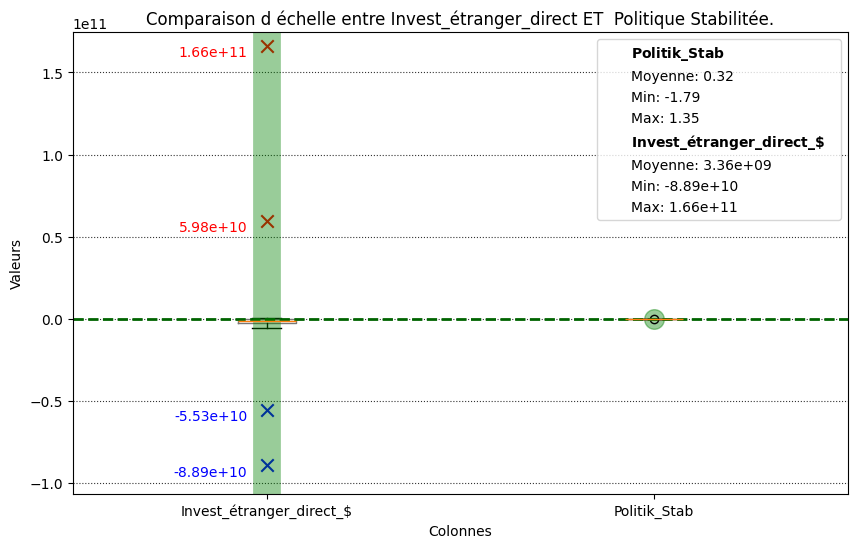

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Couleur
couleur_boxplot = '#777777'
couleur_axe = '#333333'
couleur_valeur_max = 'red'
couleur_valeur_min = 'blue'
couleur_moyenne = 'darkgreen'  # Nouvelle couleur pour la moyenne
epaisseur_trait = 2  # Epaisseur du trait pour la moyenne

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplots
bp1 = ax.boxplot(Data_perso['Invest_étranger_direct_$'], positions=[1],
                 labels=['Invest_étranger_direct_$'],
                 boxprops=dict(color=couleur_boxplot))

bp2 = ax.boxplot(Data_perso['Politik_Stab'], positions=[2],
                 labels=['Politik_Stab'],
                 boxprops=dict(color=couleur_boxplot))

bp1['fliers'][0].set_alpha(0)

# Limites y
y_min = min(Data_perso['Invest_étranger_direct_$'].min(), Data_perso['Politik_Stab'].min()) * 1.2
y_max = max(Data_perso['Invest_étranger_direct_$'].max(), Data_perso['Politik_Stab'].max()) * 1.05
ax.set_ylim(y_min, y_max)

# Valeurs extrêmes Invest_étranger_direct_$
max_val = Data_perso['Invest_étranger_direct_$'].nlargest(2)
min_val = Data_perso['Invest_étranger_direct_$'].nsmallest(2)

for x, y in max_val.items():
    ax.text(0.95, y, f'{y:.2e}', ha='right', va='top', color=couleur_valeur_max)
    ax.scatter(1, y, marker='x', color=couleur_valeur_max, s=80)

for x, y in min_val.items():
    ax.text(.95, y, f'{y:.2e}', ha='right', va='top', color=couleur_valeur_min)
    ax.scatter(1, y, marker='x', color=couleur_valeur_min, s=80)

# Ligne moyenne
mean_y = Data_perso['Politik_Stab'].mean()
mean_INVEST = Data_perso['Invest_étranger_direct_$'].mean()

ax.axhline(mean_y, linestyle='--', color=couleur_moyenne, linewidth=epaisseur_trait)  # Modification de la couleur et de l'épaisseur
ax.scatter(2, mean_y, marker='o', color='green', s=200, alpha=0.4)  # Remplacement de la croix verte par un point ajustable

# Ajout de la ligne verticale
ax.axvline(x=1, color='green', linewidth=20, alpha=0.4)

# Légende pour la moyenne, le minimum et le maximum de Politik_Stab et Invest_étranger_direct_$
legend_labels = [r'$\bf{Politik\_Stab}$', f'Moyenne: {mean_y:.2f}', f'Min: {Data_perso["Politik_Stab"].min():.2f}',
                 f'Max: {Data_perso["Politik_Stab"].max():.2f}',
                 r'$\bf{Invest\_étranger\_direct\_\$}$', f'Moyenne: {mean_INVEST:.2e}', f'Min: {Data_perso["Invest_étranger_direct_$"].min():.2e}',
                 f'Max: {Data_perso["Invest_étranger_direct_$"].max():.2e}']

legend = plt.legend(legend_labels, loc='upper right')

# Ajuster la position de la légende
plt.setp(legend.get_texts(), x=-10)

# Retirer les traits de la légende et les remplacer par des points blancs
for line in legend.get_lines():
    line.set_linestyle('None')

# Reste du graphique
ax.set_title('Comparaison d échelle entre Invest_étranger_direct ET  Politique Stabilitée.')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Invest_étranger_direct_$', 'Politik_Stab'])
ax.set_xlabel('Colonnes')
ax.set_ylabel('Valeurs')
ax.grid(axis='y', color=couleur_axe, linestyle=':')
plt.show()


### Recherche de la plage des valeurs du dataframe (min,max)   :   X_data_box

In [32]:
import pandas as pd

# Supprimer les colonnes "Année" et "Pays" du DataFrame
X_data_box = Data_perso.drop(columns=["Année", "Pays"]).copy()

# Empiler l'ensemble du dataset en une seule colonne et trier par ordre décroissant
X_data_box_stacked_sorted = X_data_box.stack().sort_values(ascending=False)

# Convertir la série triée en DataFrame
X_data_box_df_sorted = pd.DataFrame(X_data_box_stacked_sorted, columns=["Valeurs"])

# Réinitialiser les index du DataFrame
X_data_box_df_sorted = X_data_box_df_sorted.reset_index(drop=True)

# Afficher le DataFrame trié
X_data_box_df_sorted.describe()

X_data_box_df_sorted.describe()

Valeurs
count  1.551000e+03
mean   1.804613e+10
std    9.651562e+10
min   -8.890579e+10
25%    8.495754e+00
50%    1.022149e+02
75%    1.158182e+06
max    1.630447e+12

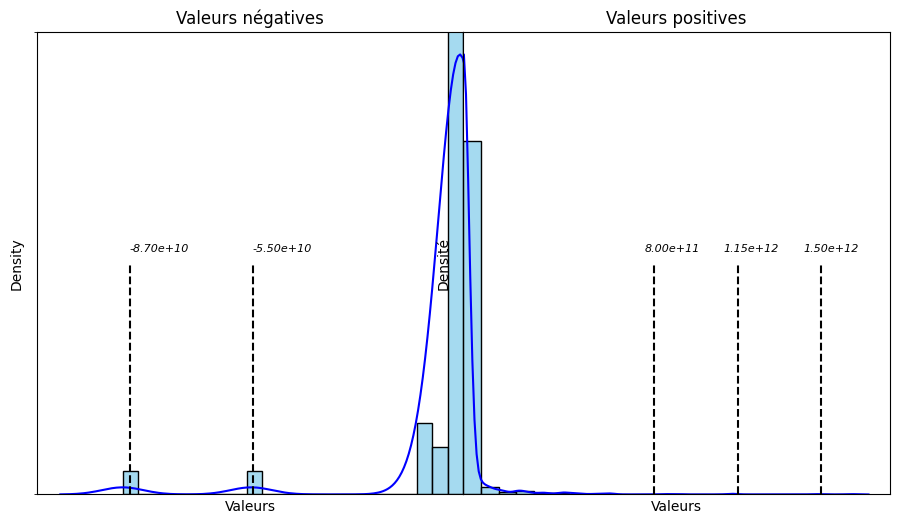

In [33]:
# Créer un DataFrame à partir des données
X_data_box_df = pd.DataFrame({'Valeurs': X_data_box_stacked_sorted})

# Séparer les valeurs négatives et positives
X_data_box_df_neg = X_data_box_df[X_data_box_df['Valeurs'] < 0]
X_data_box_df_pos = X_data_box_df[X_data_box_df['Valeurs'] >= 0]

# Tracer les histogrammes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

sns.kdeplot(X_data_box_df_neg['Valeurs'], color='blue', linestyle='-', ax=ax1)
ax1.set_title('Valeurs négatives')
#ax1.set_xlim(left=X_data_box_df_neg['Valeurs'].min(), right=0)
ax1.set_xlim(right=0)
ax1.set_ylim(bottom=0)
sns.histplot(X_data_box_df_neg['Valeurs'], bins=22, color='skyblue', edgecolor='black', kde=False, ax=ax1, stat='density')
ax1.set_title('Valeurs négatives')
ax1.set_yscale('symlog', linthresh=1e12)  # Échelle logarithmique symétrique
ax1.set_xticks([])
ax1.set_yticks([])

sns.kdeplot(X_data_box_df_pos['Valeurs'], color='blue', linestyle='-', ax=ax2)
ax2.set_title('Valeurs positives')
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
sns.histplot(X_data_box_df_pos['Valeurs'], bins=22, color='skyblue', edgecolor='black', kde=False, ax=ax2, stat='density')
ax2.set_title('Valeurs positives')
ax2.set_ylabel('Densité')
ax2.set_yscale('symlog', linthresh=1e12)  # Échelle logarithmique symétrique
ax2.set_xticks([])
ax2.set_yticks([])

# Ajouter des marques avec des lignes verticales positif 
for x in [1.5e12, 1.15e12, 0.8e12]:
    ax2.axvline(x, ymin=0, ymax=0.5, color='black', linestyle='--')
    ax2.text(x * 0.95, ax2.get_ylim()[1]/1.9, f'{x:.2e}', color='black', style='italic', fontsize=8)  # Décalage vers la gauche


# Ajouter des marques avec des lignes verticales négatif
for x in [-5.5e10, -8.7e10]:
    ax1.axvline(x, ymin=0, ymax=0.5, color='black', linestyle='--')
    ax1.text(x * 1, ax1.get_ylim()[1]/1.9 , f'{x:.2e}', color='black', style='italic', fontsize=8)  # Décalage vers la gauche

#
plt.subplots_adjust(wspace=.00)  # Rapprocher les deux graphiques

# Afficher le graphique
plt.show()


## Observons les Features possédants des valeurs Négatives 

In [34]:
def color_min(val):
    if val < -60:
        return 'background-color: orange'
    elif  val >= 0:
        return 'background-color: skyblue'
    elif val >= -28:
        return 'background-color: lightblue'
df_bleu = df.describe().T.sort_values(by="min").iloc[:8][["min","max"]]
df_bleu = df_bleu.style.applymap(color_min, subset=["min"])
df_bleu

###  Histogramme des features possédant valeurs négative

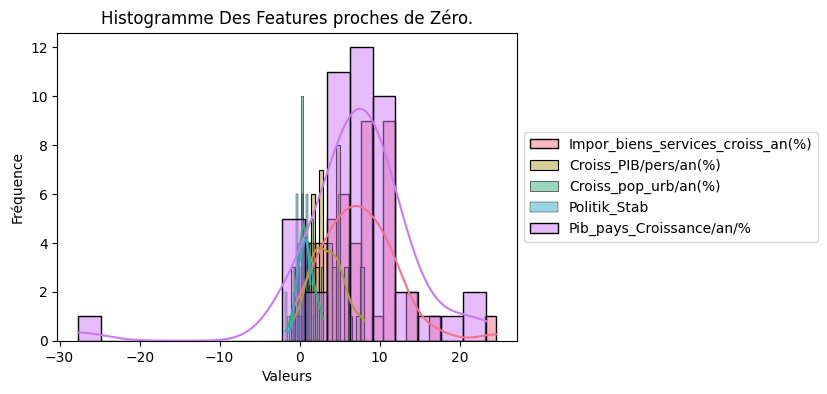

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes contenant des valeurs négatives, sauf 'Invest_étranger_direct_$'
columns = [col for col in df.columns if col != 'Invest_étranger_direct_$' and any(df[col] < 0)]

# Générer une palette de couleurs
colors = sns.color_palette('husl', len(columns))

plt.figure(figsize=(8, 4))

# Créer un histogramme pour chaque colonne
for i, col in enumerate(columns):
    # Générer une couleur unique pour chaque histogramme
    color = colors[i]
    
    # Créer l'histogramme
    sns.histplot(df[col], bins=18, kde=True, color=color, label=col, log=False)

# Ajouter le titre et les labels
plt.title('Histogramme Des Features proches de Zéro.')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Ajouter une légende à droite du graphe
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster la disposition du graphe pour laisser de la place sur le côté droit pour la légende
plt.subplots_adjust(right=0.7)

# Afficher le graphique
plt.show()


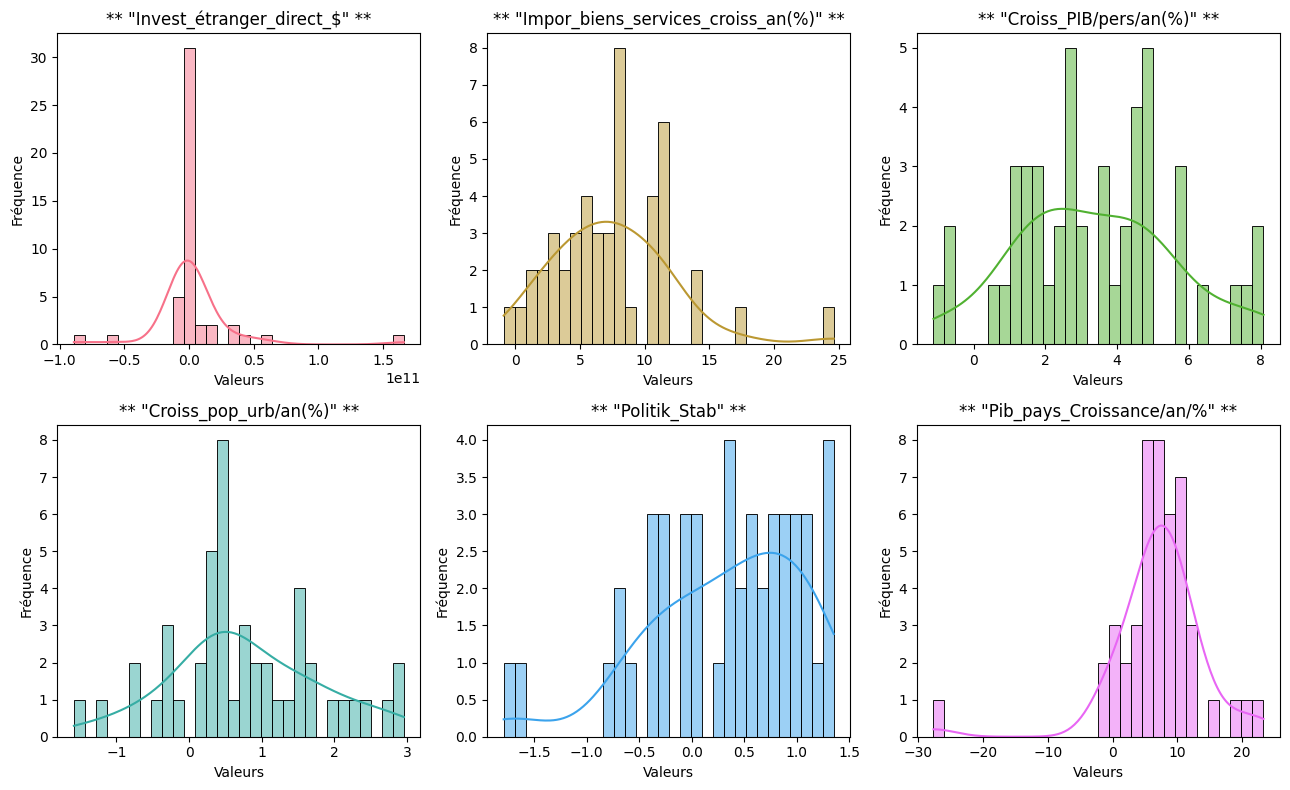

In [36]:
# Sélection des colonnes contenant des valeurs négatives
Feat_N = [col for col in X_data_box if any(X_data_box[col] < 0)]

# Générer une palette de couleurs
colors = sns.color_palette('husl', len(Feat_N))

plt.figure(figsize=(13, 8))

# Trier le DataFrame en fonction des valeurs de la première colonne
X_data_box_sorted = X_data_box.sort_values(by=Feat_N[0], ascending=False)

# Afficher les histogrammes en vignettes
for i, col in enumerate(Feat_N):
    if i < 6:  # Limiter à 6 subplots pour une meilleure visualisation
        plt.subplot(2, 3, i + 1)
        sns.histplot(X_data_box_sorted[col], bins=30, kde=True, color=colors[i])
        plt.title(f'** "{col}" **')
        plt.xlabel('Valeurs')
        plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


### A part investissement étranger les features possédants des valeurs négatives sont celles ayant la plus faible étendues.

### On se rend compte que l étendue des valeurs va poser un probleme pour la suite du Projet.
### les échelles sont trop déséquilibrés et vont totalement perturbé l' analyse .
### je vais créer des groupes de Features celon l' étendue de leurs valeurs.
### ainsi ces groupes seront ajustés par les réductions d'échelle.

- pour les plus élevé Groupe 3 un Log va etre utilisé .
-  Intermédiaire Groupe 2 je vais div par 100
-  Tandis que le groupe 1 entre -30 et 1000 environ  restera telquel




### Création d un dataframe sur la base des Ecart_Type  :   std_table_df
#### Colonnes groupe indique l appartenace des Features celon leur échelle.
- Groupe 2 diviser par 100
- Groupe 3 Log

In [37]:
description = X_data_box.describe()

# Collecter les écarts types dans un tableau
std_table = description.loc['std'].sort_values(ascending=True)

# Ajouter une colonne min-max
min_max_df = pd.DataFrame(index=std_table.index)
min_max_df['min'] = description.loc['min']
min_max_df['max'] = description.loc['max']

# Joindre le tableau des écarts types avec le tableau min-max
std_table_df = std_table.to_frame(name='std').join(min_max_df)

# constitution des groupes
groupe_1 = std_table_df.loc["Politik_Stab" : "Pop_réfugiée"].index.to_list()
groupe_2 = std_table_df.loc["Pib_pays_Valeur/hab" : "Pop_urb"].index.to_list()                                              #  /100
groupe_3 = std_table_df.loc["Frais_prop_intellectuelle_$" : "Import_biens_services_et_rev_ primaires_$"].index.to_list() #  /log

# Fonction pour assigner le groupe en fonction de l'index
def assigner_groupe(index):
    if index in groupe_1:
        return 1
    elif index in groupe_2:
        return 2
    elif index in groupe_3:
        return 3
    else:
        return None

# Ajout de la colonne "groupe" basée sur la fonction assigner_groupe
std_table_df['groupe'] = std_table_df.index.map(assigner_groupe)
#
std_table_df#.reset_index().groupby(["groupe","std"]).first()[['min', 'max','index']].rename(columns={"index":"Feats"})

std           min  \
Politik_Stab                               7.373696e-01 -1.790000e+00   
Croiss_pop_urb/an(%)                       1.025775e+00 -1.583708e+00   
Dép_éducation(% du RNB)                    1.440982e+00  1.760000e+00   
Croiss_PIB/pers/an(%)                      2.222567e+00 -1.116113e+00   
Inflation_prix_conso(%/an)                 2.567843e+00  3.405316e-01   
Impor_biens_services_croiss_an(%)          4.681901e+00 -8.769806e-01   
Pib_pays_Croissance/an/%                   7.337396e+00 -2.765877e+01   
Services de voyage(%)                      1.328056e+01  1.108493e+00   
Services_transport(%)                      1.502267e+01  1.267335e+00   
Com_informatique(%)                        1.778449e+01  7.461144e+00   
Valeur                                     3.347820e+01  0.000000e+00   
Commerce_marchandises(%_PIB)               3.555327e+01  3.562102e+01   
Poulet_Impor                               1.818088e+02  2.000000e+00   
Densi_pop(hab/km²)                         2.328182e+02  1.999536e+00   
Poulet_Expor                               2.815516e+02  0.000000e+00   
Poulet_Alimentaire                         7.911418e+02  9.000000e+00   
Poulet_Dispo_Int                           8.077910e+02  9.000000e+00   
Poulet_Production                          8.454849e+02  2.000000e+00   
Protec_Env                                 4.973032e+03  0.000000e+00   
Pop_réfugiée                               1.360352e+04  5.000000e+00   
Pib_pays_Valeur/hab                        2.582776e+04  8.486684e+02   
Dép(Admi_Publiq)                           3.193408e+05  2.595505e+03   
Terres_agricoles(km²)Pop Urbaine           4.584368e+05  1.038000e+02   
Abo_bande_fixe                             7.676896e+06  6.000000e+03   
 Abo_tél_fixe                              9.348565e+06  1.462130e+05   
Pop_urb                                    2.108958e+07  3.220160e+05   
Frais_prop_intellectuelle_$                1.274278e+10  8.885247e+04   
Invest_étranger_direct_$                   3.201709e+10 -8.890579e+10   
Impor_services_commerciaux($)              7.216346e+10  3.683405e+08   
services_dImportations_$                   7.265578e+10  3.741856e+08   
Impor_de_biens_$                           2.039267e+11  2.389723e+09   
Importations_biens_services_$              2.699919e+11  2.763908e+09   
Import_biens_services_et_rev_ primaires_$  3.258623e+11  3.124886e+09   

                                                    max  groupe  
Politik_Stab                               1.350000e+00       1  
Croiss_pop_urb/an(%)                       2.957103e+00       1  
Dép_éducation(% du RNB)                    9.374764e+00       1  
Croiss_PIB/pers/an(%)                      8.078347e+00       1  
Inflation_prix_conso(%/an)                 1.293592e+01       1  
Impor_biens_services_croiss_an(%)          2.460000e+01       1  
Pib_pays_Croissance/an/%                   2.329387e+01       1  
Services de voyage(%)                      7.106122e+01       1  
Services_transport(%)                      7.658822e+01       1  
Com_informatique(%)                        7.505734e+01       1  
Valeur                                     1.365300e+02       1  
Commerce_marchandises(%_PIB)               1.668504e+02       1  
Poulet_Impor                               8.420000e+02       1  
Densi_pop(hab/km²)                         1.462497e+03       1  
Poulet_Expor                               1.418000e+03       1  
Poulet_Alimentaire                         4.509000e+03       1  
Poulet_Dispo_Int                           4.556000e+03       1  
Poulet_Production                          4.444000e+03       1  
Protec_Env                                 2.022694e+04       1  
Pop_réfugiée                               6.158400e+04       1  
Pib_pays_Valeur/hab                        1.110172e+05       2  
Dép(Admi_Publiq)                           1.630438e+06       2  
Terres_agricoles(km²)Pop Urbaine           2.162137

In [38]:
# X_data_box = Data_perso.drop(columns=["Année", "Pays"]).copy()    ??

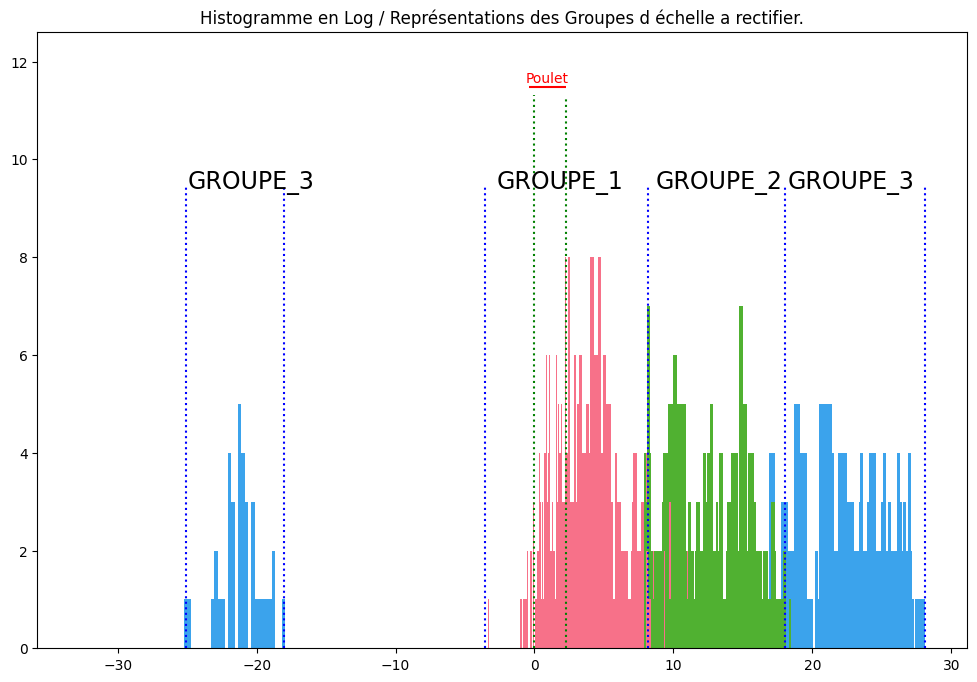

In [39]:
# Attribution Couleur par Groupes
columns = X_data_box.columns
# Générer une palette de couleurs pour chaque groupe
palette = sns.color_palette('husl', n_colors=3)
# Assigner une couleur à chaque colonne en fonction de son groupe
colors = []
for col in columns:
    if col in groupe_1:
        colors.append(palette[0])
    elif col in groupe_2:
        colors.append(palette[1])
    elif col in groupe_3:
        colors.append(palette[2])
    else:
        colors.append('gray')
#________________________

plt.figure(figsize=(12, 8))
# Créer un histogramme pour chaque colonne
for i, col in enumerate(columns):
    # couleur unique pour chaque groupe
    color = colors[i]
    # Sélectionner les valeurs positives et négatives
    positive_values = X_data_box[col][X_data_box[col] > 0]
    negative_values = X_data_box[col][X_data_box[col] < 0]
    
    # Créer l'histogramme avec une échelle logarithmique sur l'axe des x
    if not positive_values.empty:
        plt.hist(np.log1p(positive_values), bins=30, color=color, label=col + '_positive')
    if not negative_values.empty:
        plt.hist(-np.log1p(-negative_values), bins=30, color=color, label=col + '_negative')
        
# Positif
#plt.text(np.log1p(2), np.log1p(1.073495e+09), 'Poulet', color='red') 
plt.axvline(x=np.abs(np.log1p(8.399535147948004)), ymin=0, ymax=.895, color='g', linestyle='dotted', label='g1')
plt.axvline(x=np.abs(np.log1p(0)), ymin=0, ymax=.8985, color='g', linestyle='dotted', label='g1')
plt.text(np.log1p(.9006)*-1, np.log1p(1.073495e+05), 'Poulet', color='red') 
plt.hlines(y=np.log1p(.97073495e+05), xmin=np.log1p(.5)*-1, xmax=np.log1p(9), color='red', linestyle='-', label='Jonction g1')

# ligne verticale Négative
plt.axvline(x=np.log1p(1660e11)*-1, ymin=0, ymax=.75, color='w', linestyle='dotted', label='g1')  # garde pour le dézoom  metre en blanc !!
plt.axvline(x=np.log1p(76e9)*-1, ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')
plt.axvline(x=np.log1p(66e6)*-1, ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')
plt.axvline(x=np.log1p(33)*-1, ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')

# ligne verticale Positive
plt.axvline(x=np.log1p(66e11), ymin=0, ymax=.75, color='w', linestyle='dotted', label='g1')  # garde pour le dézoom
plt.axvline(x=np.log1p(168e10), ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')
plt.axvline(x=np.log1p(66e6), ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')
plt.axvline(x=np.log1p(36e2), ymin=0, ymax=.75, color='b', linestyle='dotted', label='g1')
#
plt.text(np.log1p(600), np.log1p(1.073495e+04),'GROUPE_1', color='black', ha='right', va='bottom', fontsize=17)
plt.text(np.log1p(578e5), np.log1p(1.073495e+04),'GROUPE_2', color='black', ha='right', va='bottom', fontsize=17)
plt.text(np.log1p(78e10), np.log1p(1.073495e+04),'GROUPE_3', color='black', ha='right', va='bottom', fontsize=17)
plt.text(np.log1p(78e5)*-1, np.log1p(1.073495e+04),'GROUPE_3', color='black', ha='right', va='bottom', fontsize=17)  #color=color, label=col + '_positive')

plt.title('Histogramme en Log / Représentations des Groupes d échelle a rectifier.')

plt.show()


### Mise en Place liste des Groupes

In [40]:
groupe_1=[    
"Dép_éducation(% du RNB) ",

"Inflation_prix_conso(%/an)",
"Services_transport(%)",
"Com_informatique(%)",
"Services de voyage(%)",
"Impor_biens_services_croiss_an(%)",
"Commerce_marchandises(%_PIB)",
"Densi_pop(hab/km²)",
"Croiss_PIB/pers/an(%)",
"Croiss_pop_urb/an(%)",
"Politik_Stab",
"Protec_Env",
"Pib_pays_Croissance/an/%",
"Poulet_Dispo_Int",
"Poulet_Expor",
"Poulet_Impor",
"Poulet_Alimentaire",
"Poulet_Production"]

groupe_2=[
"Terres_agricoles(km²)Pop Urbaine",
"Abo_bande_fixe",
" Abo_tél_fixe",
"Dép(Admi_Publiq)",
"Pib_pays_Valeur/hab",
"Pop_réfugiée",]

groupe_3=[    
"Frais_prop_intellectuelle_$",
"Invest_étranger_direct_$",
"Impor_de_biens_$",
"services_dImportations_$",
"Import_biens_services_et_rev_ primaires_$",
"Importations_biens_services_$",
"Impor_services_commerciaux($)",
"Pop_urb"]

### Visualisons en Boxplot les différents Groupes ainsi que leur modifications.
>

Pour afficher le contenu de la cellule en entier sans défilement, vous pouvez ajuster les paramètres d'affichage de pandas.
Ajoutez ce code au début de votre notebook :



Statistiques pour Groupe_1 :

Min : -27.65877
Max : 20226.941471
Moyenne : 242 




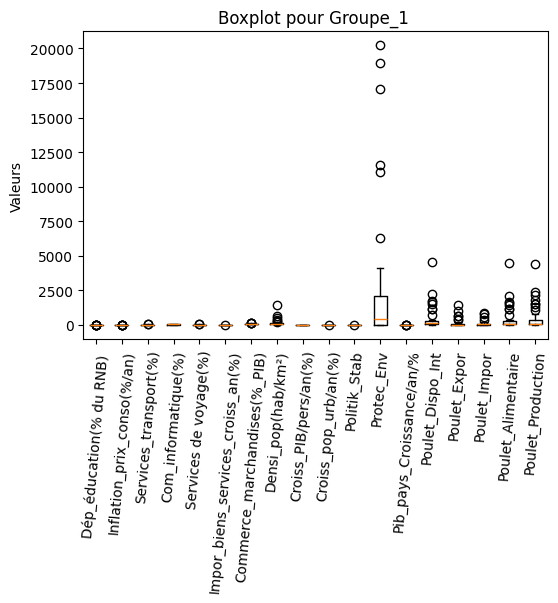




Statistiques pour Groupe_2 :

Min (Original): 5.0
Max (Original): 44400000.0
Moyenne (Original): 1697 



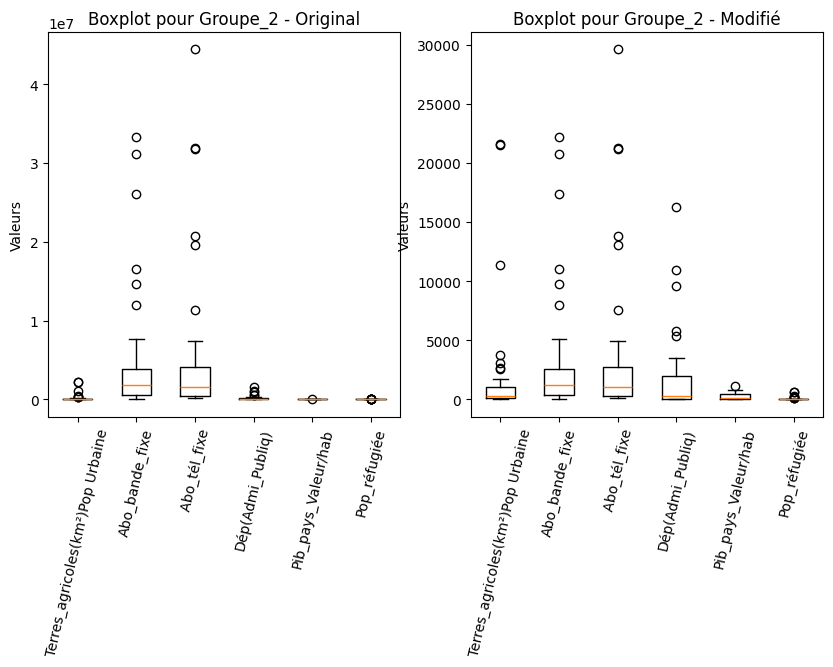

Min (Modifié): 0.05
Max (Modifié): 29600.0
Moyenne (Modifié): 1697 





Statistiques pour Groupe_3 :

Min (Original): -88905787009.0505
Max (Original): 1630446902965.87
Moyenne (Original): 22 



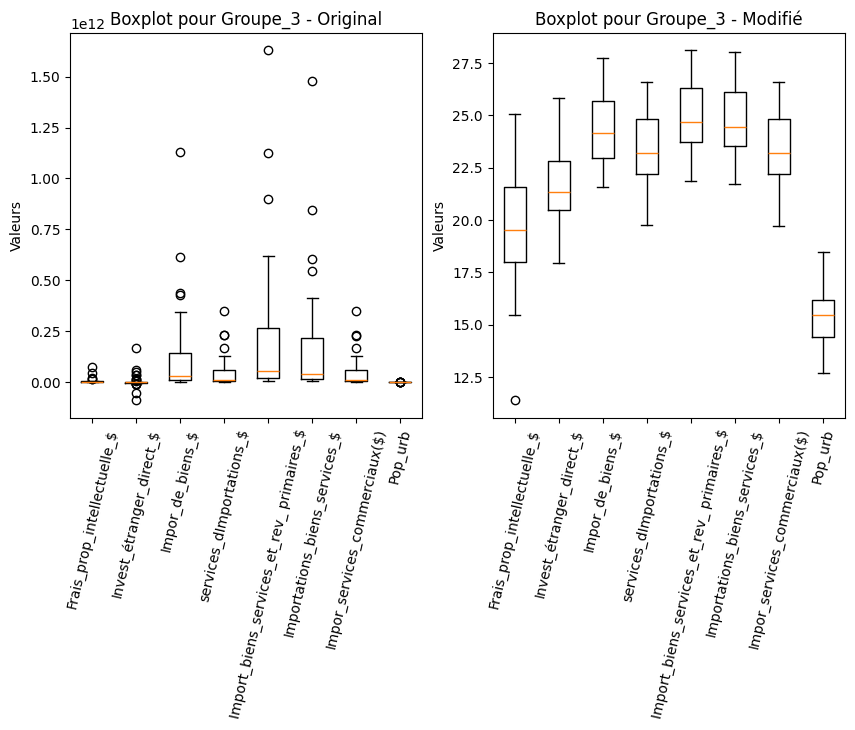

Min (Modifié): -11.394743920778655
Max (Modifié): 28.119875266767814
Moyenne (Modifié): 8.36256567299458



In [41]:
X_data_box_Mod = X_data_box.copy()

# Modifcation Groupe 2 /  Division du Groupe 2 par 100  
X_data_box_Mod[groupe_2] /= 100
# ajout rect abo
X_data_box_Mod[[" Abo_tél_fixe", "Abo_bande_fixe"]]  /= 15


# le Groupe 3 passe au log 
# les valeurs passent toutes positives   Voir plus bas récup index negatif
X_data_box_Mod[groupe_3] = X_data_box_Mod[groupe_3].abs()
# Appliquer le logarithme aux valeurs des colonnes du groupe_3
epsilon = 1e-6
X_data_box_Mod[groupe_3] = np.log1p(X_data_box_Mod[groupe_3] + epsilon)


# Les groupes
noms_groupes = [groupe_1, groupe_2, groupe_3]
Label_groupes = ['Groupe_1', 'Groupe_2', 'Groupe_3']


# Pour le premier groupe.
groupe_data = X_data_box[noms_groupes[0]]
groupe_data_mod = X_data_box_Mod[noms_groupes[0]]
noms_colonnes = groupe_data.columns.tolist()
print("Statistiques pour", Label_groupes[0], ":\n")
print("Min :", groupe_data_mod.min().min())
print("Max :", groupe_data_mod.max().max())
print("Moyenne :", round(groupe_data_mod.mean().mean()), "\n")
print()
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(groupe_data_mod)
ax.set_title("Boxplot pour {} ".format(Label_groupes[0]))
ax.set_xticklabels(noms_colonnes, rotation=85)
ax.set_ylabel("Valeurs")
plt.show()


for i in [1,2]:
    # Sélectionner les données pour chaque colonne dans le groupe
    groupe_data = X_data_box[noms_groupes[i]]
    groupe_data_mod = X_data_box_Mod[noms_groupes[i]]  # Données modifiées
    
    noms_colonnes = groupe_data.columns.tolist()

    # Créer une figure avec deux sous-graphiques côte à côte
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Calculer les statistiques 
    print("\n\n")
    print("Statistiques pour", Label_groupes[i], ":\n")
    print("Min (Original):", groupe_data.min().min())
    print("Max (Original):", groupe_data.max().max())
    print("Moyenne (Original):",round( groupe_data_mod.mean().mean()), "\n")
    
    # Boxplot pour X_data_box
    axs[0].boxplot(groupe_data)
    axs[0].set_title("Boxplot pour {} - Original".format(Label_groupes[i]))
    axs[0].set_xticks(range(1, len(groupe_data.columns) + 1))
    axs[0].set_xticklabels(groupe_data.columns, rotation=77)
    axs[0].set_ylabel("Valeurs")

    # Boxplot pour X_data_box_Mod
    axs[1].boxplot(groupe_data_mod)
    axs[1].set_title("Boxplot pour {} - Modifié".format(Label_groupes[i]))
    axs[1].set_xticks(range(1, len(groupe_data_mod.columns) + 1))
    axs[1].set_xticklabels(groupe_data_mod.columns, rotation=77)
    axs[1].set_ylabel("Valeurs")

    plt.show()

    if i==2:     
            
        print("Min (Modifié):", (groupe_data_mod.min().min())*-1)
        print("Max (Modifié):", groupe_data_mod.max().max())
        #print("Moyenne (Modifié):",round( groupe_data_mod.mean().mean()), "\n")
        print("Moyenne (Modifié):",((groupe_data_mod.min().min() * -1) + groupe_data_mod.max().max()) / 2)

        
    else:
        print("Min (Modifié):", groupe_data_mod.min().min())
        print("Max (Modifié):", groupe_data_mod.max().max())
        print("Moyenne (Modifié):",round( groupe_data_mod.mean().mean()), "\n")
    print()


In [42]:
# Bonne échelle avec Negatif !!

X_data_box_Mod = X_data_box.copy()

# Modifcation Groupe 2 /  Division du Groupe 2 par 100  
X_data_box_Mod[groupe_2] /= 100
# ajout rect abo
X_data_box_Mod[[" Abo_tél_fixe", "Abo_bande_fixe"]]  /= 15

epsilon = 1e-6
for col in X_data_box_Mod[groupe_3]:
    # Identifier les indices des valeurs négatives
    indices_negatifs = X_data_box_Mod[X_data_box_Mod[col] < 0].index 

# Pour chaque colonne dans groupe_3, obtenir les indices des lignes avec des valeurs négatives
for col in groupe_3:
    # Identifier les indices des lignes avec des valeurs négatives
    indices_negatifs = X_data_box_Mod[X_data_box_Mod[col] < 0].index
    
    # Appliquer le logarithme à toutes les valeurs (après les avoir rendues positives)
    X_data_box_Mod[col] = np.log1p(np.abs(X_data_box_Mod[col]) + epsilon)
    
    # Rétablir le signe négatif pour les valeurs initialement négatives
    X_data_box_Mod[col][indices_negatifs] = -X_data_box_Mod[col][indices_negatifs]


In [43]:
# !!

#dans mon dataframe X_data_std_fitness je veux changer la colonne Impor_services_commerciaux($) en Impor_services_commerciaux + ..

X_data_box_Mod = X_data_box_Mod.rename(columns={'Impor_services_commerciaux($)': 'Impor_services_commerciaux'})
X_data_box_Mod = X_data_box_Mod.rename(columns={'Inflation_prix_conso(%/an)':'Infla_prixConso/%an'})
X_data_box_Mod = X_data_box_Mod.rename(columns={' Abo_tél_fixe':'Abo_tél_fixe'})


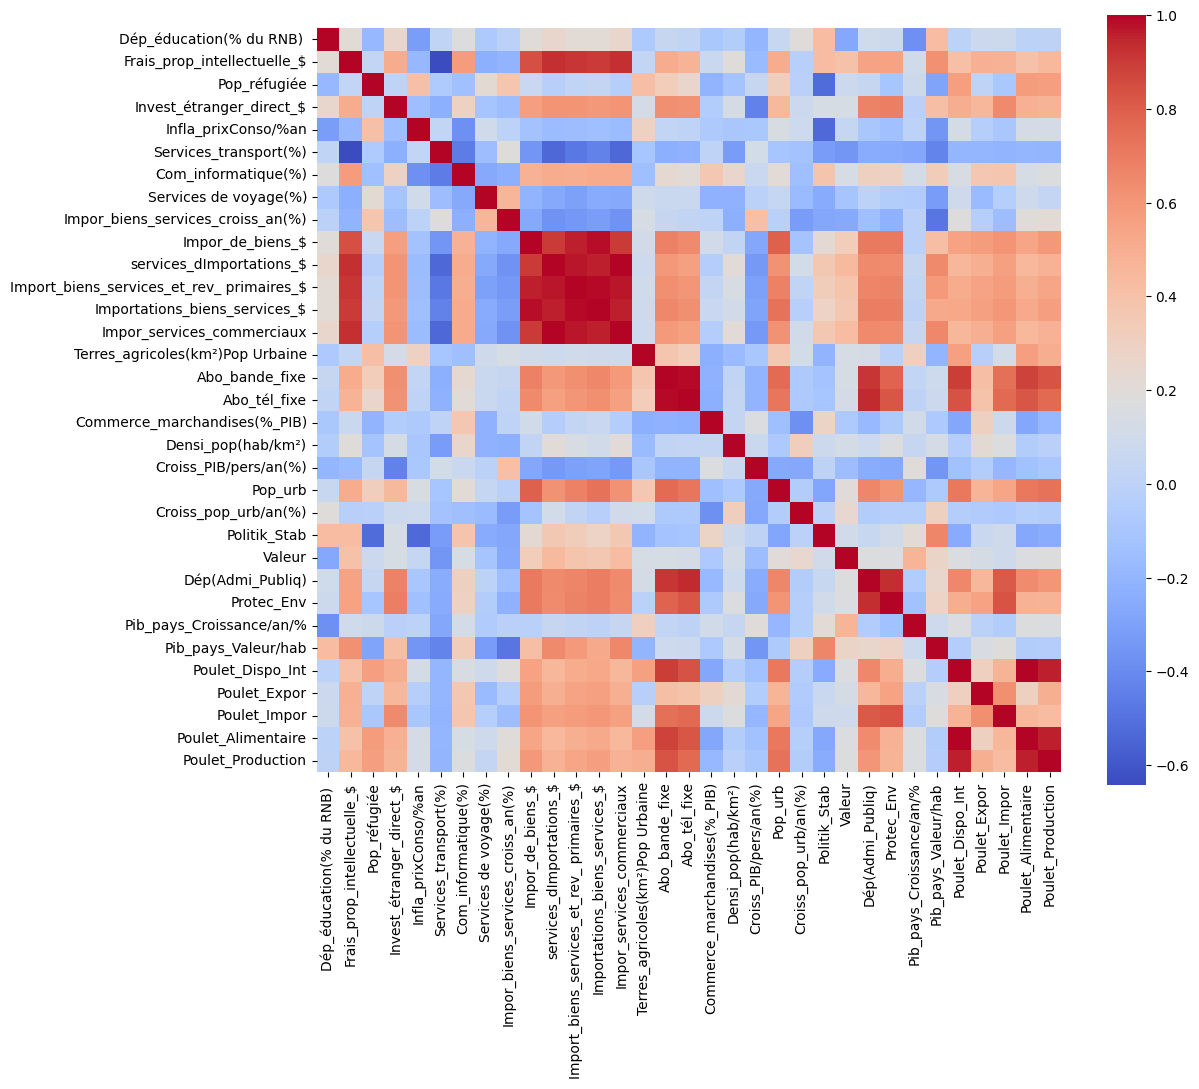

In [44]:
# Calcul de la matrice de corrélation
corr_matrix = X_data_box_Mod.corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

### Coup d oeil au poulet 

In [45]:
corr_matrix

Dép_éducation(% du RNB)   \
Dép_éducation(% du RNB)                                    1.000000   
Frais_prop_intellectuelle_$                                0.216314   
Pop_réfugiée                                              -0.183391   
Invest_étranger_direct_$                                   0.254860   
Infla_prixConso/%an                                       -0.320645   
Services_transport(%)                                      0.017063   
Com_informatique(%)                                        0.184869   
Services de voyage(%)                                     -0.078964   
Impor_biens_services_croiss_an(%)                         -0.013392   
Impor_de_biens_$                                           0.194768   
services_dImportations_$                                   0.253700   
Import_biens_services_et_rev_ primaires_$                  0.212373   
Importations_biens_services_$                              0.212127   
Impor_services_commerciaux                                 0.254440   
Terres_agricoles(km²)Pop Urbaine                          -0.082984   
Abo_bande_fixe                                             0.045533   
Abo_tél_fixe                                               0.020055   
Commerce_marchandises(%_PIB)                              -0.090374   
Densi_pop(hab/km²)                                        -0.050796   
Croiss_PIB/pers/an(%)                                     -0.196213   
Pop_urb                                                    0.051456   
Croiss_pop_urb/an(%)                                       0.196346   
Politik_Stab                                               0.435289   
Valeur                                                    -0.266968   
Dép(Admi_Publiq)                                           0.099754   
Protec_Env                                                 0.077706   
Pib_pays_Croissance/an/%                                  -0.374246   
Pib_pays_Valeur/hab                                        0.430669   
Poulet_Dispo_Int                                          -0.001395   
Poulet_Expor                                               0.070532   
Poulet_Impor                                               0.080126   
Poulet_Alimentaire                                        -0.004055   
Poulet_Production                                          0.001705   

                                           Frais_prop_intellectuelle_$  \
Dép_éducation(% du RNB)                                       0.216314   
Frais_prop_intellectuelle_$                                   1.000000   
Pop_réfugiée                                                  0.026234   
Invest_étranger_direct_$                                      0.511644   
Infla_prixConso/%an                                          -0.181476   
Services_transport(%)                                        -0.642499   
Com_informatique(%)                                           0.578681   
Services de voyage(%)                                        -0.226450   
Impor_biens_services_croiss_an(%)                            -0.210008   
Impor_de_biens_$                                              0.845410   
services_dImportations_$                                      0.928951   
Import_biens_services_et_rev_ primaires_$                     0.916582   
Importations_biens_services_$                                 0.900580   
Impor_services_commerciaux                                    0.929340   
Terres_agricoles(km²)Pop Urbaine                              0.029632   
Abo_bande_fixe                                                0.511087   
Abo_tél_fixe                                                  0.476768   
Commerce_marchandises(%_PIB)                                  0.063455   
Densi_pop(hab/km²)                                            0.194350   
Croiss_PIB/pers/an(%)                                        -0.168781   
Pop_urb                                                       0.508806   


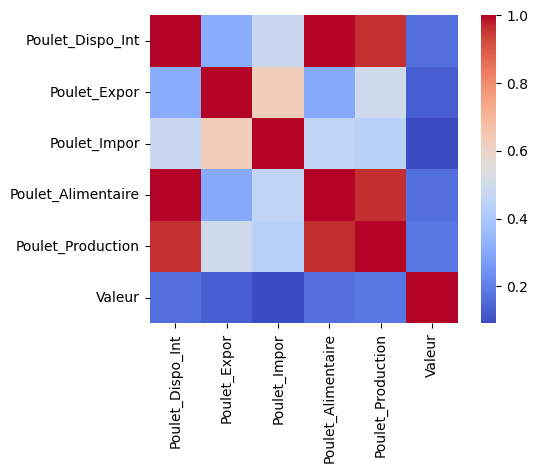

In [46]:
# DataFrame  les variables liées au poulet
variables_poulet = ['Poulet_Dispo_Int', 'Poulet_Expor', 'Poulet_Impor', 'Poulet_Alimentaire', 'Poulet_Production','Valeur']
X_data_box_Mod_poulet=X_data_box_Mod[variables_poulet]

# Calcul de la matrice de corrélation
corr_matrix = X_data_box_Mod_poulet.corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

## Observons les corélations sur les features sans Poulet

In [47]:
# df sans  les colonnes  variables_poulet
X_data_box_Mod_Nop = X_data_box_Mod.drop(variables_poulet, axis=1)


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def process_correlation_dataframe(input_df):
    # Calculer la matrice de corrélation pour le DataFrame en entrée
    correlation_matrix = input_df.corr()

    # Filtrer les corrélations positives excluant celles égales à 1
    top_positive_corr = correlation_matrix.unstack().sort_values(ascending=False)
    top_positive_corr = top_positive_corr[top_positive_corr < 1]

    # Convertir la série top_positive_corr en DataFrame
    df_corr_unique = top_positive_corr.reset_index(name='Corr')

    # Ajouter une colonne 'Doublon' basée sur la condition
    df_corr_unique['Doublon'] = np.where(df_corr_unique['Corr'].eq(df_corr_unique['Corr'].shift()), 'O', 'N')

    # Renommer les colonnes
    df_corr_unique.columns = ['Feature_1', 'Feature_2', 'Corr', 'Doublon']

    # Sélectionner les lignes avec Doublon égal à 'N'
    df_no_duplicates = df_corr_unique[df_corr_unique['Doublon'] == 'N']

    # Retirer la colonne Doublon
    df_no_duplicates = df_no_duplicates.drop(columns=['Doublon'])

    # Créer deux listes pour stocker les coefficients de corrélation 
    coef_cor_list = []

    # Parcourir les lignes de df_no_duplicates
    for index, row in df_no_duplicates.iterrows():
        # Sélectionner les caractéristiques pour la paire actuelle
        feature_1 = input_df[row['Feature_1']]
        feature_2 = input_df[row['Feature_2']]

        # Calculer le coefficient de corrélation 
        coef_cor, pvalue = pearsonr(feature_1, feature_2)

        # Ajouter les résultats aux listes
        coef_cor_list.append(coef_cor)

    return df_no_duplicates.reset_index().drop(columns={"index"})

# Utilisation de la fonction avec un autre DataFrame
result_dataframe = process_correlation_dataframe(X_data_box_Mod_Nop)


In [49]:
print("\nTOP Corélation Positive\n")
display(result_dataframe.head(11))
print("\nTOP Corélation Négative\n")
display(result_dataframe.tail(11))


TOP Corélation Positive



Feature_1  \
0                    services_dImportations_$   
1               Importations_biens_services_$   
2                              Abo_bande_fixe   
3                            Impor_de_biens_$   
4   Import_biens_services_et_rev_ primaires_$   
5                  Impor_services_commerciaux   
6               Importations_biens_services_$   
7               Importations_biens_services_$   
8                            Impor_de_biens_$   
9                            Dép(Admi_Publiq)   
10                           Dép(Admi_Publiq)   

                                    Feature_2      Corr  
0                  Impor_services_commerciaux  0.999939  
1   Import_biens_services_et_rev_ primaires_$  0.989404  
2                                Abo_tél_fixe  0.988110  
3               Importations_biens_services_$  0.985149  
4                    services_dImportations_$  0.972825  
5   Import_biens_services_et_rev_ primaires_$  0.972701  
6                    services_dImportations_$  0.958563  
7                  Impor_services_commerciaux  0.958223  
8   Import_biens_services_et_rev_ primaires_$  0.955837  
9                                Abo_tél_fixe  0.937825  
10                                 Protec_Env  0.935323


TOP Corélation Négative



Feature_1                    Feature_2  \
340                      Services_transport(%)          Pib_pays_Valeur/hab   
341              Importations_biens_services_$        Services_transport(%)   
342                      Croiss_PIB/pers/an(%)     Invest_étranger_direct_$   
343                      Services_transport(%)          Com_informatique(%)   
344  Import_biens_services_et_rev_ primaires_$        Services_transport(%)   
345          Impor_biens_services_croiss_an(%)          Pib_pays_Valeur/hab   
346                               Politik_Stab                 Pop_réfugiée   
347                        Infla_prixConso/%an                 Politik_Stab   
348                      Services_transport(%)     services_dImportations_$   
349                      Services_transport(%)   Impor_services_commerciaux   
350                      Services_transport(%)  Frais_prop_intellectuelle_$   

         Corr  
340 -0.428852  
341 -0.433641  
342 -0.435503  
343 -0.457319  
344 -0.473594  
345 -0.482255  
346 -0.522656  
347 -0.531081  
348 -0.534264  
349 -0.535255  
350 -0.642499

In [50]:
df = result_dataframe.copy()
# Créer des dictionnaires pour stocker les corrélations positives et négatives par feature
positive_correlations_dict = {}
negative_correlations_dict = {}

# Grouper les corrélations par feature
grouped_by_feature = df.groupby('Feature_1')

for feature, group in grouped_by_feature:
    # Sélectionner les 6 premières corrélations positives pour la feature
    positive_correlations = group[group['Corr'] > 0].sort_values(by='Corr', ascending=False).head(6)
    # Sélectionner les 6 premières corrélations négatives pour la feature
    negative_correlations = group[group['Corr'] < 0].sort_values(by='Corr', ascending=True).head(6)
    
    # Ajouter les corrélations au dictionnaire
    positive_correlations_dict[feature] = positive_correlations[['Feature_2', 'Corr']].values.tolist()
    negative_correlations_dict[feature] = negative_correlations[['Feature_2', 'Corr']].values.tolist()

print("Dictionnaire des corrélations positives:  PRET !")
#positive_correlations_dict

print("\nDictionnaire des corrélations négatives:   PRET !")
#negative_correlations_dict


Dictionnaire des corrélations positives:  PRET !

Dictionnaire des corrélations négatives:   PRET !


In [51]:
X_data_box_Mod.head()

Dép_éducation(% du RNB)   Frais_prop_intellectuelle_$  Pop_réfugiée  \
0                  3.303909                    16.390595        121.68   
1                  2.290981                    18.883329        107.86   
2                  5.060658                    21.232114          0.10   
3                  2.537727                    18.883329        108.93   
4                  4.701528                    18.872393         36.50   

   Invest_étranger_direct_$  Infla_prixConso/%an  Services_transport(%)  \
0                -20.844529             2.060598              11.130481   
1                -19.217640             0.969553              23.286371   
2                -21.950151             2.081269              29.524443   
3                -19.529594            12.935918              12.994475   
4                -20.912646             6.031837              33.133728   

   Com_informatique(%)  Services de voyage(%)  \
0            31.525512              71.061221   
1            27.284973              62.456772   
2            41.246926              19.280281   
3            14.411470              32.950554   
4            44.747761              20.370063   

   Impor_biens_services_croiss_an(%)  Impor_de_biens_$  ...  Valeur  \
0                           8.355809         22.135677  ...   80.33   
1                          24.600000         22.055026  ...  102.38   
2                           5.289218         25.779825  ...  100.00   
3                           2.843510         22.924628  ...  119.46   
4                          11.145519         24.178607  ...    0.00   

   Dép(Admi_Publiq)   Protec_Env  Pib_pays_Croissance/an/%  \
0         38.059913    23.987016                  9.765944   
1         31.936144    36.182630                  9.305043   
2       2055.003932  1495.675284                  5.483879   
3        136.829865     8.819660                  7.921474   
4         36.149564     0.000000                  0.000000   

   Pib_pays_Valeur/hab  Poulet_Dispo_Int  Poulet_Expor  Poulet_Impor  \
0            45.142049              47.0           0.0          38.0   
1            39.145252              47.0           0.0          35.0   
2           473.090516             173.0          78.0         110.0   
3            41.508688             129.0           0.0          27.0   
4            29.030200              89.0           0.0          61.0   

   Poulet_Alimentaire  Poulet_Production  
0                47.0               13.0  
1                47.0               11.0  
2               160.0              148.0  
3               129.0              104.0  
4                85.0               57.0  

[5 rows x 33 columns]

# Une autre Représentation graphique des corrélations

In [52]:
result_dataframe.shape

(351, 3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


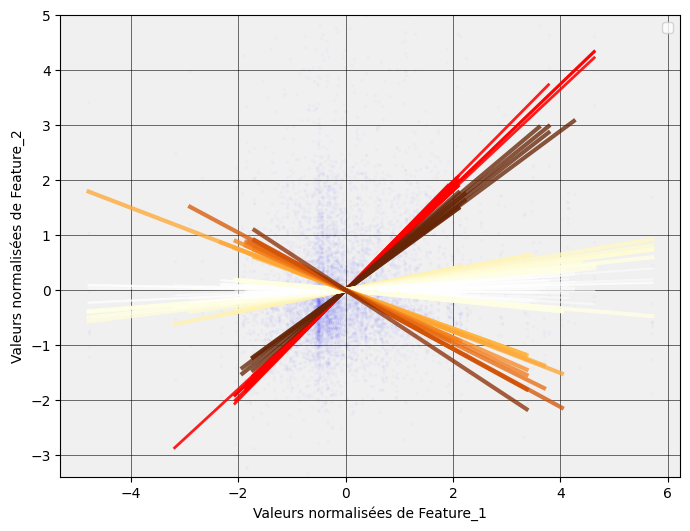

In [53]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Je garde les features
features = X_data_box_Mod_Nop.columns
values = X_data_box_Mod_Nop.values

# Standardisation
scaler = StandardScaler()
X_data_std = scaler.fit_transform(values)
# Je crée un DataFrame pour la version standardisée
X_data_std_df = pd.DataFrame(X_data_std, columns=features)


# Filtrer les valeurs de Corr selon les conditions spécifiées
result_dataframe_Filtre = result_dataframe[((result_dataframe['Corr'] > 0.7) | (result_dataframe['Corr'] < -0.35)) | ((result_dataframe['Corr'] >= -0.1) & (result_dataframe['Corr'] <= 0.2))]

# Sélectionner  paires de variables
selected_pairs = result_dataframe_Filtre  # result_dataframe  

# Créer un dictionnaire paires de variables
pairs_dict = {}
for i, (feature_1, feature_2) in enumerate(zip(selected_pairs['Feature_1'], selected_pairs['Feature_2']), start=1):
    pairs_dict[i] = (feature_1, feature_2)

# Créer une seule figure pour tous les scat
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('black')  # Définir le fond en noir
#
plt.gca().set_facecolor('#F0F0F0')

# Parcourir les paires et créer les scatter plots sur la même figure
for i, (feature_1, feature_2) in pairs_dict.items():
    X_data_box_Mod_sort = X_data_std_df[[feature_1, feature_2]].sort_values(by=feature_1)
    # Paramètres de scatter plot (ajustez la taille et la transparence)
    scatter_params = {'s': 6, 'alpha': 0.02}  # Ajustez cette valeur pour la transparence du scatter plot
    # Ajouter du bruit à la forme des points
    noise = np.random.normal(0, 0.3, size=len(X_data_box_Mod_sort))
    sns.scatterplot(x=X_data_box_Mod_sort[feature_1], y=X_data_box_Mod_sort[feature_2] + noise, color='blue', **scatter_params)
    # Régression linéaire
    regr = LinearRegression()
    regr.fit(X_data_box_Mod_sort[[feature_1]], X_data_box_Mod_sort[[feature_2]])
    y_pred = regr.predict(X_data_box_Mod_sort[[feature_1]])
    # Stocker la pente dans le dictionnaire
    slope = regr.coef_[0][0]
    pairs_dict[i] = (feature_1, feature_2, slope)
    # Tracer la droite de régression avec une couleur conditionnelle (en miroir avec le zéro)
    abs_slope = abs(slope)
    if abs_slope > 0.9:
        plt.plot(X_data_box_Mod_sort[feature_1], y_pred, color='red', linewidth=2, alpha=0.88)  # Ajustez cette valeur pour la transparence du dégradé
    elif abs_slope > 0.08:
        # Utiliser un dégradé de noir à orange clair pour les pentes entre 0.3 et 0.8
        color = plt.cm.YlOrBr((abs_slope - 0.1) / 0.6)  
        plt.plot(X_data_box_Mod_sort[feature_1], y_pred, color=color, linewidth=3, alpha=0.77)  # Ajustez cette valeur pour la transparence du dégradé
    else:
        # Utiliser orange clair pour les pentes inférieures à 0.3
        plt.plot(X_data_box_Mod_sort[feature_1], y_pred, color='white', linewidth=1.5, alpha=0.53)  # Ajustez cette valeur pour la transparence du dégradé

plt.xlabel('Valeurs normalisées de Feature_1')
plt.ylabel('Valeurs normalisées de Feature_2')
plt.ylim(-3.4, 5)  # Ajustez les limites de l'axe Y
plt.grid(True, color='black', linestyle='-', linewidth=0.4)
plt.legend()
# Afficher la figure
plt.show()

In [54]:
def Pentoufl():
    # Afficher les 10 premières paires et leurs pentes
    for i, (key, (feature_1, feature_2, slope)) in enumerate(pairs_dict.items()):
        print(f'Paire {i + 1}: {feature_1} vs {feature_2}, Pente: {slope:.4f}')
        if i == 9:  # Arrêtez après avoir affiché les 10 premières
            break
    print("\n\n")
    # Afficher les 10 dernières paires et leurs pentes
    total_pairs = len(pairs_dict)
    for i, (key, (feature_1, feature_2, slope)) in enumerate(pairs_dict.items()):
        if i >= total_pairs - 10:  # Affiche les 10 dernières paires
            print(f'Paire {i + 1}: {feature_1} vs {feature_2}, Pente: {slope:.4f}')

#

Pentoufl()

Paire 1: services_dImportations_$ vs Impor_services_commerciaux, Pente: 0.9999
Paire 2: Importations_biens_services_$ vs Import_biens_services_et_rev_ primaires_$, Pente: 0.9894
Paire 3: Abo_bande_fixe vs Abo_tél_fixe, Pente: 0.9881
Paire 4: Impor_de_biens_$ vs Importations_biens_services_$, Pente: 0.9851
Paire 5: Import_biens_services_et_rev_ primaires_$ vs services_dImportations_$, Pente: 0.9728
Paire 6: Impor_services_commerciaux vs Import_biens_services_et_rev_ primaires_$, Pente: 0.9727
Paire 7: Importations_biens_services_$ vs services_dImportations_$, Pente: 0.9586
Paire 8: Importations_biens_services_$ vs Impor_services_commerciaux, Pente: 0.9582
Paire 9: Impor_de_biens_$ vs Import_biens_services_et_rev_ primaires_$, Pente: 0.9558
Paire 10: Dép(Admi_Publiq) vs Abo_tél_fixe, Pente: 0.9378



Paire 163: Importations_biens_services_$ vs Services_transport(%), Pente: -0.4336
Paire 164: Croiss_PIB/pers/an(%) vs Invest_étranger_direct_$, Pente: -0.4355
Paire 165: Services_transport(%

# Je vais Travailler sur les Features pour diminuer les corélations.

- Création de features synthétique 
- ou éliminations des moins pertinantes 

## Afin de créer de nouvelles variables, je vais faire des regroupements par thèmes et m aider des corrélations


**La Connectivité** :
- Abonnement téléphonique
- Abonnement internet
- Communication informatique.

**Investissement** :
- Investissement étranger direct
- Frais de propriété intellectuelle.

**Urbanisation et migration** :
- Population réfugiée
- Terres agricoles (en km²)
- Population urbaine
- Densité de population (habitants par km²)
- Croissance de la population urbaine annuelle (%).

**Économique et Social** :
- Dépenses en éducation (% du RNB)
- Inflation des prix à la consommation (% par an)
- Services de transport (%)
- Services de voyage (%)
- Dépenses administratives publiques
- Protection de l'environnement.

**PIB par habitant et croissance du pays** :
- PIB par habitant (en valeur)
- Croissance du PIB par personne par an (%)
- Croissance annuelle du PIB du pays (%).

**Importations, croissance et poulet** :
- Importations de biens et services et revenus primaires ($)
- Croissance annuelle des importations de biens et services (%)
- Importations de poulet.


In [55]:
# PRobleme >> Renommage 
X_data_box_Mod = X_data_box_Mod.rename(columns={X_data_box_Mod.columns[0]: "Dép_éducation_%_RNB"})
X_data_box_Mod = X_data_box_Mod.rename(columns={X_data_box_Mod.columns[11]: "Import_biens_serv_primaires_$"})

In [56]:
# ??? Garde

# Je garde les features et valeurs
features = X_data_box_Mod.columns
values = X_data_box_Mod.values

# Standardisation
scaler = StandardScaler()
Scal_data_Mod = scaler.fit_transform(values)
# Je crée un DataFrame pour la version standardisée
Scale_data_Mod = pd.DataFrame(Scal_data_Mod, columns=features)

In [57]:
df = X_data_box_Mod.copy()

# Création du dictionnaire de catégories
categories = {
    'Administration_services': ['Dép(Admi_Publiq)', 'Services_transport(%)', 'Dép_éducation_%_RNB','Protec_Env'],# , 'Abo_bande_fixe', 'Abo_tél_fixe'],
    'Commerce_International': ['Frais_prop_intellectuelle_$', 'Commerce_marchandises(%_PIB)', 'Impor_services_commerciaux', 'Com_informatique(%)'],
    'Investissement_Étranger': ['Invest_étranger_direct_$', 'services_dImportations_$'],
    'Croissance_Économique': ['Croiss_PIB/pers/an(%)', 'Pib_pays_Croissance/an/%', 'Pib_pays_Valeur/hab'],
    'Importations': ['Impor_biens_services_croiss_an(%)', 'Impor_de_biens_$', 'Import_biens_serv_primaires_$', 'Importations_biens_services_$'],
    'Urbanisation': ['Pop_urb', 'Croiss_pop_urb/an(%)', 'Densi_pop(hab/km²)'],
    'Total_Poulet_Dispo' : ['Poulet_Dispo_Int', 'Poulet_Alimentaire','Poulet_Production' ]
}


In [58]:
# Vérification de la présence de toutes les fonctionnalités dans le DataFrame
for category, features in categories.items():
    missing_features = [feature for feature in features if feature not in df.columns]
    if missing_features:
        print(f"Il manque des fonctionnalités dans la catégorie '{category}':")
        for feature in missing_features:
            print(f"- {feature}")
    else:
        print(f"Toutes les fonctionnalités de la catégorie '{category}' sont présentes dans le DataFrame.")


Toutes les fonctionnalités de la catégorie 'Administration_services' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Commerce_International' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Investissement_Étranger' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Croissance_Économique' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Importations' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Urbanisation' sont présentes dans le DataFrame.
Toutes les fonctionnalités de la catégorie 'Total_Poulet_Dispo' sont présentes dans le DataFrame.


## TURBO version

In [59]:
from sklearn.decomposition import PCA
def create_pca_component(data):
    pca = PCA(n_components=1)
    pca.fit(data)
    return pca.transform(data)

# Initialisation du DataFrame d'origine
df = X_data_box_Mod.copy()

# Initialisation du dictionnaire pour stocker les composantes principales
categories_PC = {}

# Création des composantes principales et suppression des fonctionnalités du DataFrame d'origine
for category, features in categories.items():
    # Créer un DataFrame pour le groupe de variables
    category_df = df[features]
    
    # Créer une composante principale pour le groupe de variables
    category_pc = create_pca_component(category_df)
    
    # Ajouter les composantes principales au DataFrame d'origine
    df[f"{category}_PC"] = category_pc
    
    # Supprimer les fonctionnalités du DataFrame d'origine
    df.drop(features, axis=1, inplace=True)


## TURBO version____________

In [60]:
# + vérif 
# Vérification de la présence de toutes les fonctionnalités dans le DataFrame
for category, features in categories.items():
    missing_features = [feature for feature in features if feature not in df.columns]
    if missing_features:
        print(f"Il manque des fonctionnalités dans la catégorie '{category}':")
        for feature in missing_features:
            print(f"- {feature}")
    else:
        print(f"Toutes les fonctionnalités de la catégorie '{category}' sont présentes dans le DataFrame.")


Il manque des fonctionnalités dans la catégorie 'Administration_services':
- Dép(Admi_Publiq)
- Services_transport(%)
- Dép_éducation_%_RNB
- Protec_Env
Il manque des fonctionnalités dans la catégorie 'Commerce_International':
- Frais_prop_intellectuelle_$
- Commerce_marchandises(%_PIB)
- Impor_services_commerciaux
- Com_informatique(%)
Il manque des fonctionnalités dans la catégorie 'Investissement_Étranger':
- Invest_étranger_direct_$
- services_dImportations_$
Il manque des fonctionnalités dans la catégorie 'Croissance_Économique':
- Croiss_PIB/pers/an(%)
- Pib_pays_Croissance/an/%
- Pib_pays_Valeur/hab
Il manque des fonctionnalités dans la catégorie 'Importations':
- Impor_biens_services_croiss_an(%)
- Impor_de_biens_$
- Import_biens_serv_primaires_$
- Importations_biens_services_$
Il manque des fonctionnalités dans la catégorie 'Urbanisation':
- Pop_urb
- Croiss_pop_urb/an(%)
- Densi_pop(hab/km²)
Il manque des fonctionnalités dans la catégorie 'Total_Poulet_Dispo':
- Poulet_Dispo_

# Old version a remettre

### Drop derniere minutes 

In [61]:
Drop = ["Pop_réfugiée","Infla_prixConso/%an","Services de voyage(%)","Terres_agricoles(km²)Pop Urbaine",'Abo_bande_fixe', 'Abo_tél_fixe']
df = df.drop(Drop,axis=1)

In [62]:
df.head(1).T

0
Politik_Stab                   0.380000
Valeur                        80.330000
Poulet_Expor                   0.000000
Poulet_Impor                  38.000000
Administration_services_PC -2985.218605
Commerce_International_PC    -21.045166
Investissement_Étranger_PC    -9.296919
Croissance_Économique_PC    -211.770565
Importations_PC                1.854461
Urbanisation_PC              -42.434088
Total_Poulet_Dispo_PC       -671.117181

In [63]:
data_Frame=df.set_index(Mg["Pays"])

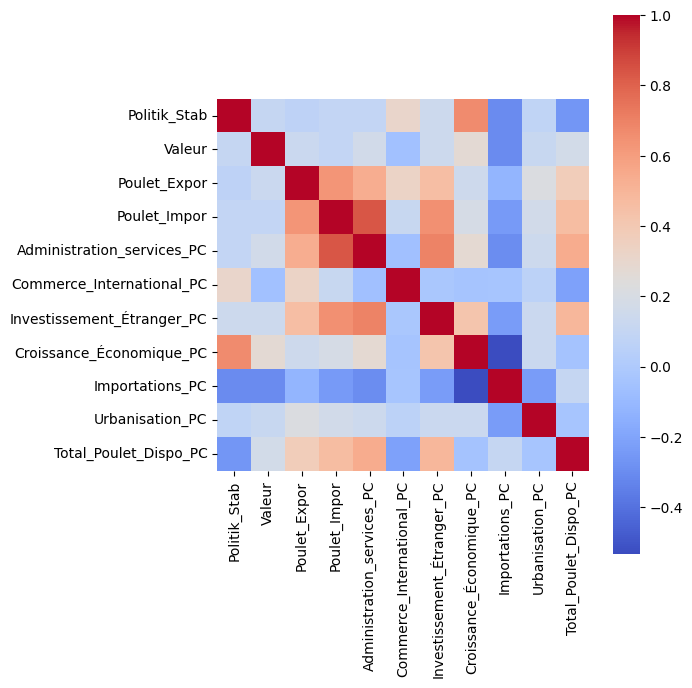

In [64]:
# Calcul de la matrice de corrélation
corr_matrix = data_Frame.corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(6, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

# CASSE  // casser corr par ACP

In [65]:
df_casse = data_Frame.copy() 
list_feat_casse = ["Poulet_Impor","Administration_services_PC"] 


In [66]:
import pandas as pd
from sklearn.decomposition import PCA

# Effectuer l'ACP
def perform_pca(data):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    return pca, pca_result  # Retourne l'objet PCA et les résultats de l'ACP

# Ajouter les features d'origine avec le suffixe "_CASSE"
def add_original_features_with_suffix(data, original_features):
    data_with_casse = data.copy()  # Copie du DataFrame
    for feature in original_features:
        data_with_casse[feature+'_CASSE'] = data_with_casse[feature]
    return data_with_casse


# Créer un dataframe pour l'ACP
df_casse_acp = df_casse[list_feat_casse].copy()

# Ajouter les features d'origine avec le suffixe "_CASSE"
df_casse_acp = add_original_features_with_suffix(df_casse_acp, list_feat_casse)

# Retirer les features sélectionnées
df_casse.drop(columns=list_feat_casse, inplace=True)

# Effectuer l'ACP sur les features sélectionnées
pca_model, pca_result = perform_pca(df_casse_acp)


df_casse['Poulet_Impor_CASSE'] = pca_result[:, 0]
df_casse['Administration_services_PC_CASSE'] = pca_result[:, 1]


In [67]:
df_casse.head(2)

Politik_Stab  Valeur  Poulet_Expor  Commerce_International_PC  \
Pays                                                                     
Albanie          0.38   80.33           0.0                 -21.045166   
Arménie         -0.62  102.38           0.0                 -24.194110   

         Investissement_Étranger_PC  Croissance_Économique_PC  \
Pays                                                            
Albanie                   -9.296919               -211.770565   
Arménie                   -7.677245               -217.778332   

         Importations_PC  Urbanisation_PC  Total_Poulet_Dispo_PC  \
Pays                                                               
Albanie         1.854461       -42.434088            -671.117181   
Arménie        17.562198       -43.871717            -672.305986   

         Poulet_Impor_CASSE  Administration_services_PC_CASSE  
Pays                                                           
Albanie        -4222.916047                         -9.597411  
Arménie        -4212.994167                         -5.095144

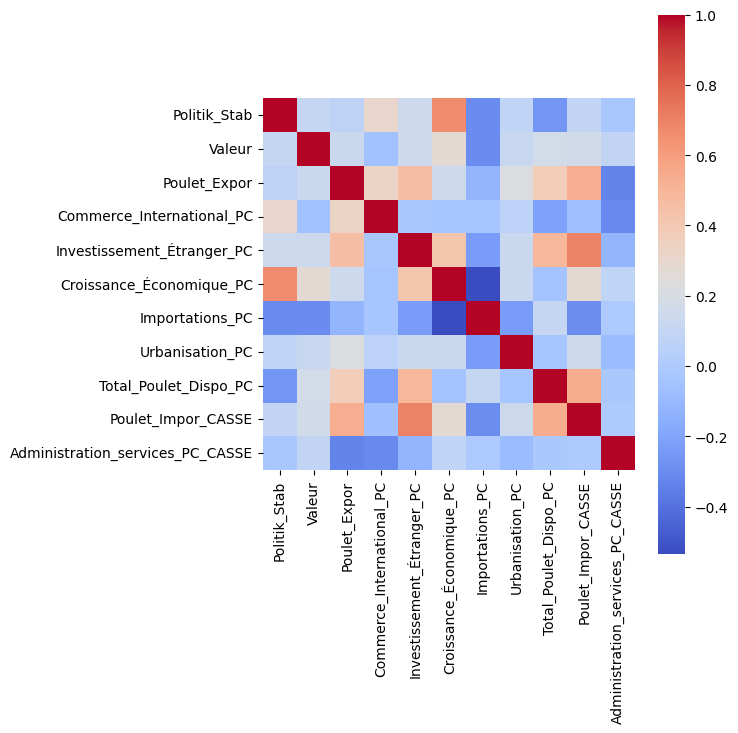

In [68]:
# Calcul de la matrice de corrélation
corr_matrix = df_casse.corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(6, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

# CASSE_______________

# Par exemple, l'analyse factorielle discriminante ou l'analyse des correspondances multiples pourraient être des alternatives à considérer.

In [69]:
from sklearn.decomposition import PCA


In [70]:
# OUTIL

def  BosPC(pcs):
    # Trouver la valeur absolue maximale parmi toutes les composantes principales
    max_val_abs = np.max(np.abs(pcs))
    # Calculer le coefficient pour normaliser la valeur maximale à 1
    coeff = .97 / max_val_abs
    # Multiplier toutes les valeurs des antes principales par ce coefficient
    adjusted_pcs = pcs * coeff
    return adjusted_pcs


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

def ACP_1(Selection_DF, n_components=None):
        
    # Je sépare Individues et Caractéristique
    features = Selection_DF.columns
    values = Selection_DF.values
    
    # Standardisation
    scaler = StandardScaler()
    X_Scaled = scaler.fit_transform(values)
    
    # Je crée un DataFrame pour la version standardisée
    Scale_data_Mod = pd.DataFrame(X_Scaled, columns=features)
    print("\nNOMBRE DE FEATURES ",len(Scale_data_Mod.columns),"\n")
    
    # Initialiser l'objet PCA avec un nombre spécifique de composantes
    pca = PCA(n_components=n_components)
    
    # Appliquer l'ACP sur les données mises à l'échelle
    X_acp = pca.fit_transform(X_Scaled)

    pcs = pca.components_
    
    return X_acp, pca, pcs, features, Scale_data_Mod


In [72]:

def Graph_Ebouli(pca):
    # Explained variance
    Variance_expl = pca.explained_variance_ratio_ * 100
    
    # Plot of cumulated variance
    plt.figure(figsize=(8, 7))
    plt.bar(np.arange(len(Variance_expl)) + 1, Variance_expl)
    
    CumSumVariance = Variance_expl.cumsum()
    plt.plot(np.arange(len(Variance_expl)) + 1, CumSumVariance, c="red", marker='o')
    plt.axhline(y=95, linestyle="-.",
                color="black", # Pointillé noir
                linewidth=1, label="Fameuse Limite des 95 %")
    
    limit = 95
    limit_idx = np.where(CumSumVariance < limit)[0]
    
    if len(limit_idx) == 0:
        print("La variance cumulée n'atteint pas {}%.".format(limit))
    else:
        limit_idx_ = limit_idx[-1] + 1
        
        if limit_idx_ == len(Variance_expl):
            limit_idx_ -= 1
        
        CumSumVariance_limit = CumSumVariance[limit_idx_ - 1]
        
        plt.axvline(x=limit_idx_, linestyle="--",
                    color="green", # Pointillé vert
                    linewidth=1)
        plt.axhline(y=CumSumVariance_limit, linestyle="--",
                    color="green", # Pointillé vert
                    linewidth=1)
    
        plt.xlabel("rang de l'axe d'inertie")
        plt.xticks(np.arange(len(Variance_expl)) + 1)
        plt.ylabel("pourcentage d'inertie")
        plt.title("Eboulis des valeurs propres\n\n{}% de la variance totale est expliquée"\
                  " par les {} premiers axes".format(int(CumSumVariance_limit), limit_idx_))
        plt.legend()
    plt.show()


In [73]:
def aff_cp_grad(pcs,features):   

    features=features
    F_list = range(1, len(pcs)+1)
    print(F_list)
    
    adjusted_pcs=BosPC(pcs)
    pcs_df = pd.DataFrame(adjusted_pcs)#adjusted_pcs
    
    
    pcs_df.columns = features
    pcs_df.index = [f"PC_{i}" for i in F_list]
    pcs_df = pcs_df.round(4).T.sort_values(by="PC_2",ascending=False)
    display(pcs_df.style.background_gradient())
    return pcs_df
    

### Feat dominante par paire de Composante 

In [74]:
import numpy as np

def visualize_pcs_contributions(pcs_df, pc1_index=0, pc2_index=1):
    # Construire les noms des colonnes en fonction des indices fournis
    # L'indexation commence à 0, donc on ajoute 1 pour correspondre à vos noms de colonnes
    PC_1 = f'PC_{pc1_index + 1}'
    PC_2 = f'PC_{pc2_index + 1}'

    # Sélectionner les colonnes PC_1 et PC_2 dans pcs_df
    pcs_contributions_df = pcs_df[[PC_1, PC_2]]

    # Ajouter les noms des variables originales comme index
    pcs_contributions_df.index = pcs_df.index

    # Calculer la norme euclidienne de chaque vecteur
    vector_lengths = np.linalg.norm(pcs_contributions_df.values, axis=1)

    # Ajouter la colonne des longueurs de vecteur au DataFrame
    pcs_contributions_df['Magnitude des contributions'] = vector_lengths

    # Créer une copie pour la coloration des gradients
    pcs_contributions_copy = pcs_contributions_df.copy()

    # Trier les données en fonction des longueurs de vecteur pour une visualisation plus claire
    sorted_df = pcs_contributions_copy.sort_values(by='Magnitude des contributions', ascending=False)

    # Renommer la colonne pour refléter la magnitude des contributions par rapport aux composantes principales
    sorted_df.rename(columns={'Magnitude des contributions': f'Magnitude des contributions à {PC_1}/{PC_2}'}, inplace=True)

    # Appliquer une coloration de gradient basée sur la magnitude des contributions par rapport aux composantes principales
    styled_df = sorted_df.style.background_gradient(cmap='coolwarm', axis=None)

    return styled_df


In [75]:
def create_contributions_pairs_df_v2(pcs_df):
    
    # Créer une liste de toutes les paires de composantes principales
    pc_pairs = [(i, j) for i in range(1, len(pcs_df.columns) + 1) for j in range(i, len(pcs_df.columns) + 1) if i != j]
    
    # Créer un DataFrame vide avec les features en index
    contributions_pairs_df = pd.DataFrame(index=pcs_df.index)
    
    # Calculer la magnitude des contributions pour chaque paire de composantes principales
    for pc1, pc2 in pc_pairs:
        # Extraire les noms des composantes principales
        pc1_name = f'PC_{pc1}'
        pc2_name = f'PC_{pc2}'
        
        # Calculer la magnitude des contributions pour cette paire de composantes principales
        contributions = np.sqrt(pcs_df[pc1_name]**2 + pcs_df[pc2_name]**2)
        
        # Ajouter les résultats au DataFrame
        contributions_pairs_df[f'{pc1_name}/{pc2_name}'] = contributions
        
    # Ajouter une ligne pour la somme de chaque colonne
    contributions_pairs_df.loc['SOMME'] = contributions_pairs_df.sum()

    
    # Ajouter une ligne pour la VARIANCE de chaque colonne
    # Initialize an empty DataFrame to store the results
    df_combinations = pd.DataFrame(columns=['Pair', 'Variance_Explained'])
    
    # Iterate over the combinations and calculate the variance explained for each pair
    for pair in pc_pairs:
            # Calculate the sum of explained variance for the pair
            variance_explained = pca.explained_variance_ratio_[pair[0] - 1] + pca.explained_variance_ratio_[pair[1] - 1]
            # Create a new DataFrame for the result
            new_row = pd.DataFrame({'Pair': f'PC{pair[0]}-PC{pair[1]}', 'Variance_Explained': variance_explained}, index=[0])
            df_combinations = pd.concat([df_combinations, new_row], ignore_index=True)
            
    df_combinations = df_combinations.T.loc["Variance_Explained"].to_frame().T.applymap(lambda x: str(round(x * 100, 2)) + '%')
    contributions_pairs_df.loc["Variance_Explained"] = df_combinations.loc["Variance_Explained"].to_list()
    
    # LISTE des colonnes dans l ordre avec les valeurs de la ligne SOMME
    columns_sorted_desc=contributions_pairs_df.loc['SOMME'].sort_values(ascending=False).index.to_list()
    
    # Mettez à jour l'ordre des colonnes dans le DataFrame
    contributions_pairs_df = contributions_pairs_df.reindex(columns_sorted_desc, axis=1)
    
    return contributions_pairs_df
    

In [76]:
# DF VALEURS FEAT

def features_order(contributions_pairs_df):

    # Garde der ligne
    last_row = contributions_pairs_df.iloc[-1:].squeeze()

    # Retire
    contributions_pairs_df = contributions_pairs_df.iloc[:-1,:]
    
    # Convertir les données de toutes les colonnes en float
    contributions_pairs_df = contributions_pairs_df.astype(float)

    # Tri des colonnes pour chaque paire de composantes principales en ordre décroissant
    sorted_contributions_df = contributions_pairs_df.T.sort_values(by="SOMME", ascending=False)
    
    sorted_contributions_df = sorted_contributions_df.drop(columns=['SOMME'])
    
    # Transposer sorted_contributions_df pour avoir les paires de composantes principales en index
    sorted_contributions_df = sorted_contributions_df.T
    
    # Création d'un DataFrame pour stocker les noms de features dans l'ordre des paires de composantes principales
    features_order_df = pd.DataFrame(index=sorted_contributions_df.index)
    
    # Remplacement des valeurs de chaque colonne par les noms de features correspondants
    for pc_pair in sorted_contributions_df.T.index:
        sorted_features = sorted_contributions_df.loc[:,pc_pair].nlargest(len(contributions_pairs_df))
        features_order_df[pc_pair] = sorted_features.index

    # Réinitialiser l'index du DataFrame final
    features_order_df.reset_index(inplace=True, drop=True)

    # Once you are done with the manipulations, you can re-append the saved last row
    features_order_df = pd.concat([features_order_df, last_row.to_frame().T])
    
    return features_order_df


In [77]:

def Rank_feat_pcs(DF,X=1):
    X = X
    df = DF.iloc[:-1].copy()
    
    # Initialize an empty list to store already encountered words
    seen_words = []
    
    # Iterate through each row in the dataframe
    for i, row in df.iterrows():
        # Initialize an empty list to store words in the current row
        line_words = []
    
        # If it's the first row, stop at column X, otherwise no limit for the following rows
        if i == 0:
            limit = X
        else:
            limit = None
    
        # Iterate through each cell in the row up to the defined limit
        for j, word in enumerate(row):
            # If a limit is set and the current word index is equal to the limit, break the loop
            if limit is not None and j == limit:
                break
            
            # If the word has already been encountered in this line, move to the next line
            if word in line_words:
                break
    
            # If the word hasn't been encountered yet in this line, add it to the row's word list
            if word not in seen_words:
                line_words.append(word)
    
        # Add the row's words to the list of already encountered words
        seen_words.extend(line_words)
    
        # Print the row number and the list of words in the row
        print(f"Ligne {i+1}: {line_words}")


In [78]:
def pcs_size(pcs, CP_preums, CP_deuze):
    # Sélectionner les composantes spécifiées
    pcs_df_Size = pcs.T[:, [CP_preums-1, CP_deuze-1]]

    # Calculer la norme euclidienne de chaque vecteur
    vector_lengths = np.linalg.norm(pcs_df_Size, axis=1)

    # Trouver l'indice du vecteur le plus long
    max_length_index = np.argmax(vector_lengths)

    # Diviser chaque composante de tous les vecteurs par la norme du vecteur le plus long
    normalized_pcs_array = pcs_df_Size / vector_lengths[max_length_index]

    return normalized_pcs_array


In [79]:
def Cercoloration(pca, pcs, preums, deuze, features, num_vectors):
    
    # Calculer la taille des composantes principales
    pcs_array = pcs_size(pcs, preums, deuze)

    A, B = (preums, deuze)
  
    # Calculer les normes euclidiennes
    norms = np.linalg.norm(pcs_array, axis=1)

    # Obtenir les indices des vecteurs en ordre décroissant de norme
    indices = np.argsort(norms)[::-1]

    # Sélectionner les num_vectors premiers indices
    selected_indices = indices[:num_vectors]

    # Sélectionner les vecteurs correspondants
    selected_pcs_array = pcs_array[selected_indices]

    
    # Liste des features
    variables_names = np.array(features)[selected_indices]

    # Liste de couleurs pour chaque feature
    colors = ['red', 'green', 'blue', 'orange', 'purple']

    # Facteur d'ajustement pour éloigner les textes du centre
    text_offset_factor = 1.1

    # Tracer le cercle de corrélation
    plt.figure(figsize=(6,6))
    plt.gca().add_artist(plt.Circle((0, 0), 1, color='blue', fill=False))

    for i, (x, y) in enumerate(selected_pcs_array):
        
        # Normaliser les coordonnées pour qu'elles touchent le cercle
        length = np.sqrt(x**2 + y**2)
        x_norm = x / length
        y_norm = y / length

        # Traçage de la flèche avec contour et la couleur correspondante
        plt.arrow(0, 0, x, y, color=colors[i % len(colors)], alpha=0.8, head_width=0.1, head_length=0.02, linewidth=2)

        # Traçage des traits noirs pointillés partant du centre et touchant le cercle
        plt.plot([0, x_norm], [0, y_norm], color='black', linestyle='--', alpha=0.5)

        # Placer le texte avec un décalage des coordonnées multiplié par le facteur d'ajustement
        plt.text(x_norm * text_offset_factor, y_norm * text_offset_factor, variables_names[i], fontsize=12)

    # Ajout des labels pour les axes x et y avec le pourcentage de variance expliquée
    explained_variance_percentage_PC1 = pca.explained_variance_ratio_[preums - 1] * 100
    explained_variance_percentage_PC2 = pca.explained_variance_ratio_[deuze - 1] * 100

    plt.xlabel('Composante principale {} ({}%)'.format(A, round(explained_variance_percentage_PC1, 2)))
    plt.ylabel('Composante principale {} ({}%)'.format(B, round(explained_variance_percentage_PC2, 2)))

    plt.title("Cercle des corrélations F_{} & F_{} ({}% variance expliquée)".format(A, B, round(explained_variance_percentage_PC1 + explained_variance_percentage_PC2)))
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.grid()
    plt.show()
    #return figure



In [80]:
# Calculate la distance entre features

def feat_distance(df):

    from scipy.spatial.distance import pdist, squareform
    
    df_casse=df
    
    distances = squareform(pdist(df_casse.T, 'euclidean'))
    
    # Créer un DataFrame à partir de la matrice des distances
    distance_df = pd.DataFrame(distances, index=df_casse.columns, columns=df_casse.columns)
    
    # Noms des variables
    columns = df_casse.columns
    
    # Créer un DataFrame à partir de la matrice des distances
    distance_df = pd.DataFrame(distances, index=columns, columns=columns)
    
    
    
    # Créer un DataFrame pour stocker les noms des variables triés par distance
    feat_dist_df = pd.DataFrame( columns=distance_df.columns)
    
    # Parcourir chaque colonne
    for col in distance_df.columns:
        # Trier les distances par ordre croissant et obtenir les noms des variables
        sorted_names = distance_df[col].sort_values(ascending=False).index.tolist()
        # Assigner les noms triés à la colonne correspondante dans le DataFrame
        feat_dist_df[col] = sorted_names
        
    return feat_dist_df


feat_dist_df=feat_distance(df_casse)

##### # Lancement Variables

In [81]:
# Lancement Variables / dessous ?

X_acp,pca,pcs,features,Scale_data_Mod = ACP_1(df_casse)


NOMBRE DE FEATURES  11 



#  Choix Features

In [82]:
df_casse=data_Frame.copy()

feat_dist_df=feat_distance(df_casse)
feat_dist_df

Politik_Stab                      Valeur  \
0   Administration_services_PC  Administration_services_PC   
1        Total_Poulet_Dispo_PC       Total_Poulet_Dispo_PC   
2                 Poulet_Expor                Poulet_Expor   
3     Croissance_Économique_PC    Croissance_Économique_PC   
4              Urbanisation_PC             Urbanisation_PC   
5                 Poulet_Impor                Poulet_Impor   
6                       Valeur   Commerce_International_PC   
7    Commerce_International_PC  Investissement_Étranger_PC   
8   Investissement_Étranger_PC             Importations_PC   
9              Importations_PC                Politik_Stab   
10                Politik_Stab                      Valeur   

                  Poulet_Expor                Poulet_Impor  \
0   Administration_services_PC  Administration_services_PC   
1        Total_Poulet_Dispo_PC       Total_Poulet_Dispo_PC   
2     Croissance_Économique_PC    Croissance_Économique_PC   
3              Urbanisation_PC             Urbanisation_PC   
4              Importations_PC                Poulet_Expor   
5                 Politik_Stab             Importations_PC   
6   Investissement_Étranger_PC                Politik_Stab   
7    Commerce_International_PC   Commerce_International_PC   
8                       Valeur  Investissement_Étranger_PC   
9                 Poulet_Impor                      Valeur   
10                Poulet_Expor                Poulet_Impor   

    Administration_services_PC   Commerce_International_PC  \
0    Commerce_International_PC  Administration_services_PC   
1              Importations_PC       Total_Poulet_Dispo_PC   
2                 Politik_Stab                Poulet_Expor   
3                       Valeur    Croissance_Économique_PC   
4   Investissement_Étranger_PC             Urbanisation_PC   
5              Urbanisation_PC                Poulet_Impor   
6     Croissance_Économique_PC                      Valeur   
7                 Poulet_Expor  Investissement_Étranger_PC   
8                 Poulet_Impor             Importations_PC   
9        Total_Poulet_Dispo_PC                Politik_Stab   
10  Administration_services_PC   Commerce_International_PC   

    Investissement_Étranger_PC    Croissance_Économique_PC  \
0   Administration_services_PC  Administration_services_PC   
1        Total_Poulet_Dispo_PC       Total_Poulet_Dispo_PC   
2                 Poulet_Expor                Poulet_Expor   
3     Croissance_Économique_PC             Urbanisation_PC   
4              Urbanisation_PC                Poulet_Impor   
5                 Poulet_Impor                      Valeur   
6                       Valeur   Commerce_International_PC   
7    Commerce_International_PC             Importations_PC   
8              Importations_PC                Politik_Stab   
9                 Politik_Stab  Investissement_Étranger_PC   
10  Investissement_Étranger_PC    Croissance_Économique_PC   

               Importations_PC             Urbanisation_PC  \
0   Administration_services_PC  Administration_services_PC   
1        Total_Poulet_Dispo_PC       Total_Poulet_Dispo_PC   
2                 Poulet_Expor                Poulet_Expor   
3     Croissance_Économique_PC    Croissance_Économique_PC   
4              Urbanisation_PC                Poulet_Impor   
5                 Poulet_Impor                      Valeur   
6                       Valeur             Importations_PC   
7    Commerce_International_PC   Commerce_International_PC   
8   Investissement_Étranger_PC                Politik_Stab   
9                 Politik_Stab  Investissement_Étranger_PC   
10             Importations_PC             Urbanisation_PC   

         Total_Poulet_Dispo_PC  
0   Administration_services_PC  
1     Croissance_Économique_PC  
2              Urbanisation_PC  
3    Commerce_International_PC  
4                 Politik_Stab  
5              Importations_PC  
6                       Valeur  
7   Investissement_Étranger_P

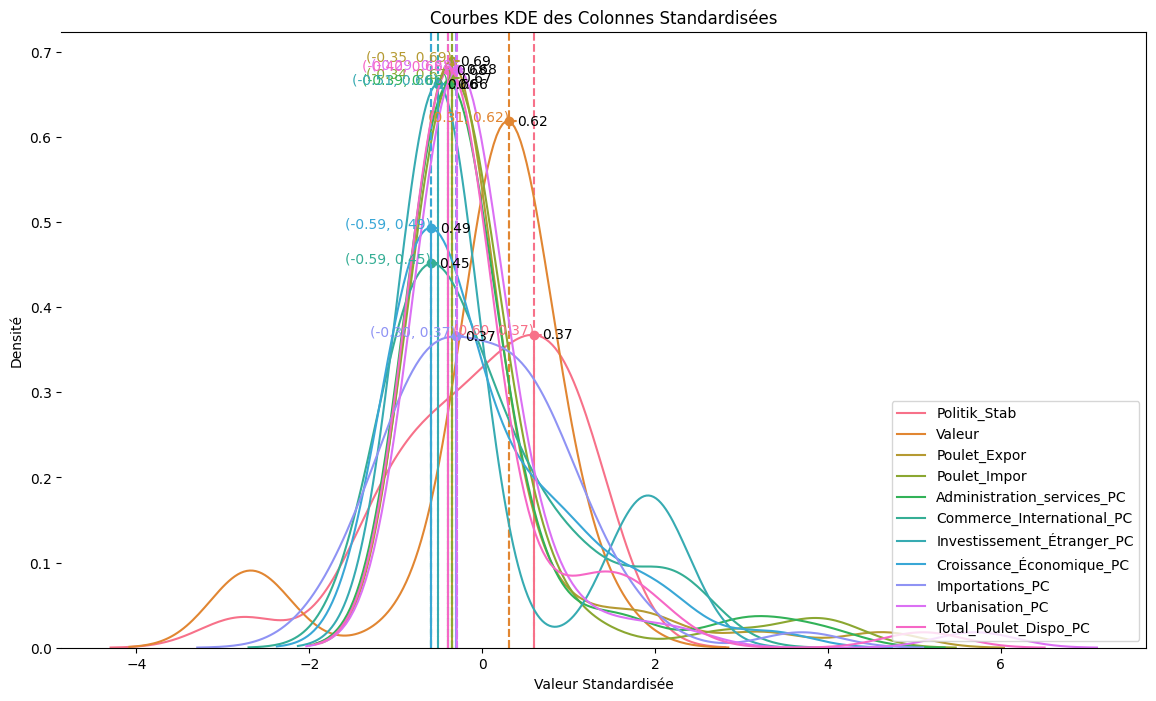

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_casse), columns=df_casse.columns)

# Afficher les courbes KDE pour toutes les colonnes
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(df_standardized.columns))  # Palette de couleurs

# Stocker les points les plus hauts pour chaque feature
max_points = []

for idx, column in enumerate(df_standardized.columns):
    kde = sns.kdeplot(df_standardized[column], label=column, color=colors[idx])
    
    # Calculer le point le plus haut de la courbe KDE
    x, y = kde.get_lines()[-1].get_data()
    max_idx = y.argmax()
    max_x = x[max_idx]
    max_y = y[max_idx]
    
    # Ajouter des lignes verticales et horizontales
    plt.axvline(x=max_x, color=colors[idx], linestyle='--')
    plt.plot([max_x, max_x], [max_y, 0], color=colors[idx], linestyle='--')
    plt.plot(max_x, max_y, 'o', color=colors[idx])
    plt.text(max_x, max_y, f'({max_x:.2f}, {max_y:.2f})', color=colors[idx], ha='right')
    
    # Stocker les informations du point le plus haut
    max_points.append((column, max_x, max_y, colors[idx]))

# Trier les points les plus hauts par ordre décroissant de y (importance)
max_points.sort(key=lambda x: x[2], reverse=True)

# Ajouter les mesures d'ordonnée sur le côté droit et tracer les traits perpendiculaires des points les plus hauts vers la droite
for i, (feature, max_x, max_y, color) in enumerate(max_points):
    plt.text(max_x + 0.1, max_y, f'{max_y:.2f}', color='black', fontsize=10, va='center', ha='left')
    plt.plot([max_x, max_x + 0.1], [max_y, max_y], color=color, linestyle='--')

# Déplacer la légende en bas à droite
plt.legend(loc='lower right')

# Retirer la partie gauche du cadre de la fenêtre de graphique
plt.gca().spines['left'].set_visible(False)

plt.title('Courbes KDE des Colonnes Standardisées')
plt.xlabel('Valeur Standardisée')
plt.ylabel('Densité')
plt.show()

##  importance des features les unes par rapport aux autres .

Essai avec la colonne cible : Politik_Stab
Min: -1.79, Max: 1.35
Scores de validation croisée pour Politik_Stab: 0.7535714285714287
Croissance_Économique_PC       0.310
Valeur                         0.070
Urbanisation_PC                0.050
Administration_services_PC     0.050
Commerce_International_PC      0.040
Importations_PC                0.030
Total_Poulet_Dispo_PC          0.020
Essai avec la colonne cible : Valeur
Min: 0.0, Max: 136.53
Scores de validation croisée pour Valeur: 0.7857142857142858
Croissance_Économique_PC       0.180
Administration_services_PC     0.090
Poulet_Expor                   0.090
Essai avec la colonne cible : Poulet_Expor
Min: 0.0, Max: 1418.0
Scores de validation croisée pour Poulet_Expor: 0.8678571428571429
Aucune importance significative trouvée pour Poulet_Expor
Essai avec la colonne cible : Poulet_Impor
Min: 2.0, Max: 842.0
Scores de validation croisée pour Poulet_Impor: 0.9178571428571429
Aucune importance significative trouvée pour Poulet_Impor

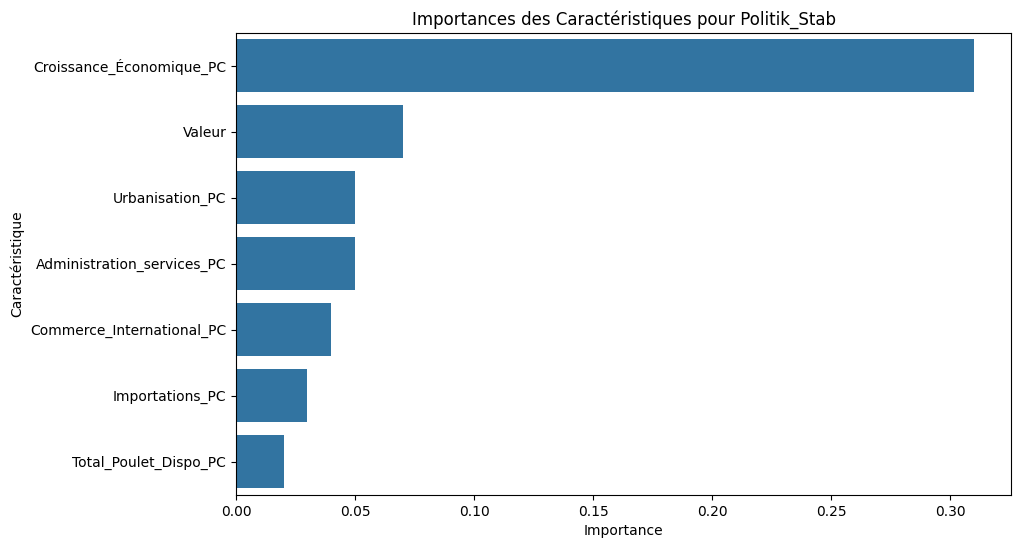

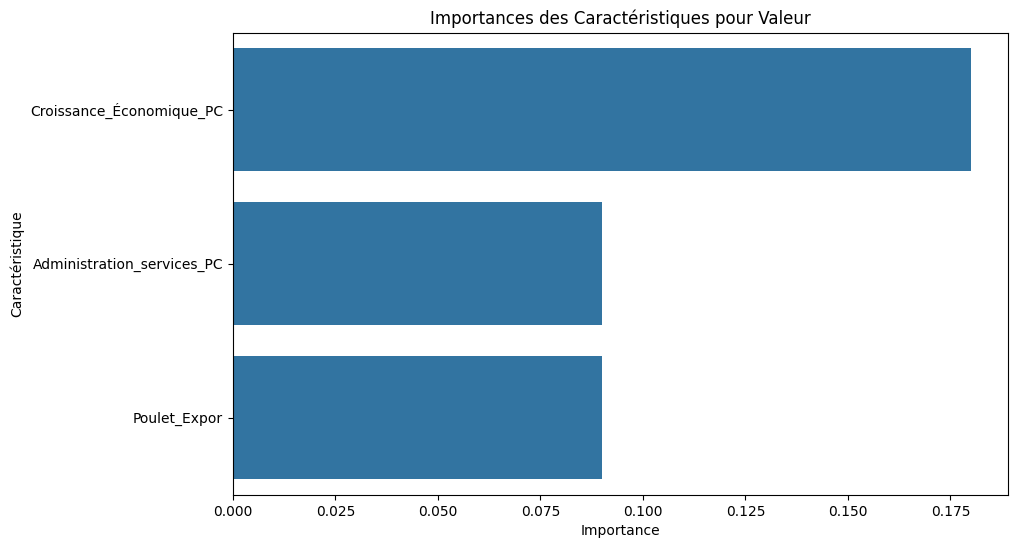

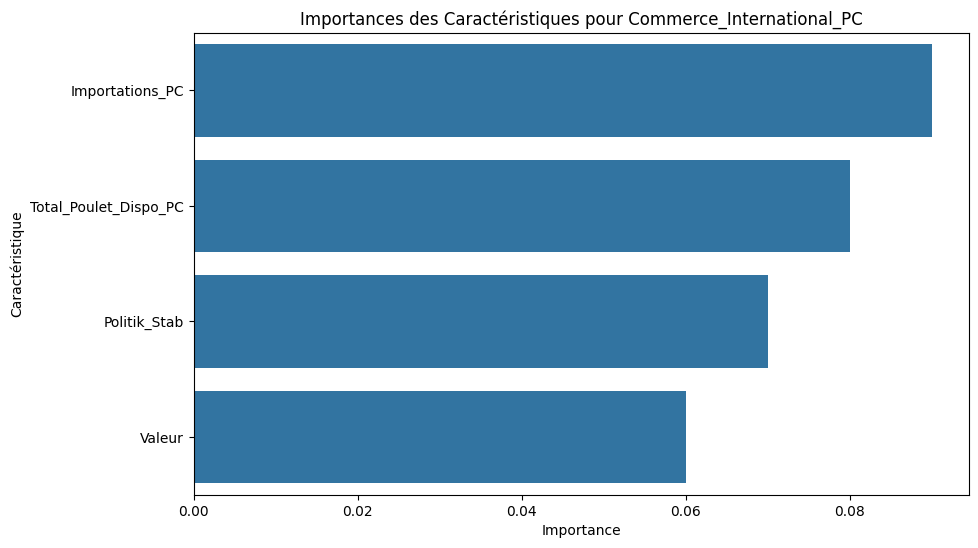

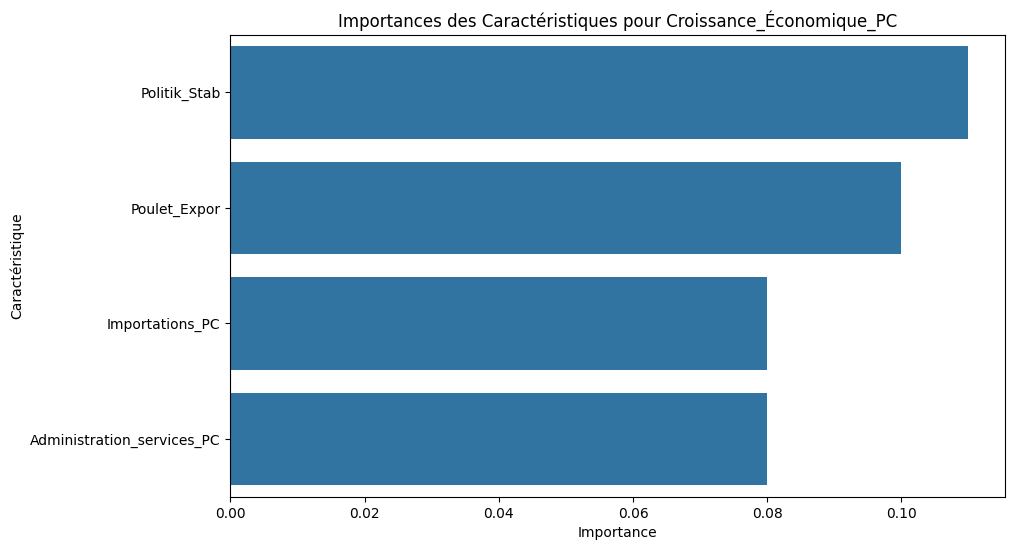

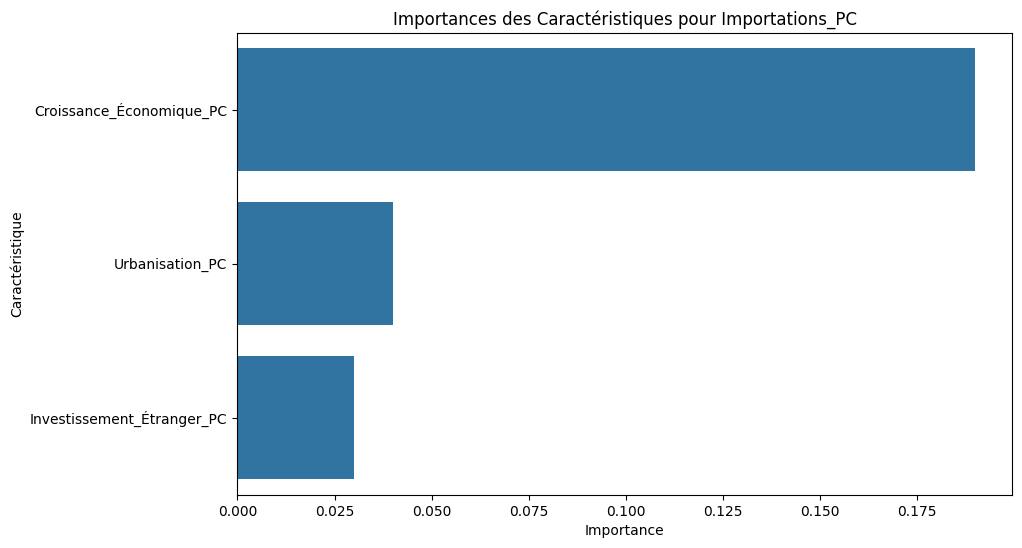

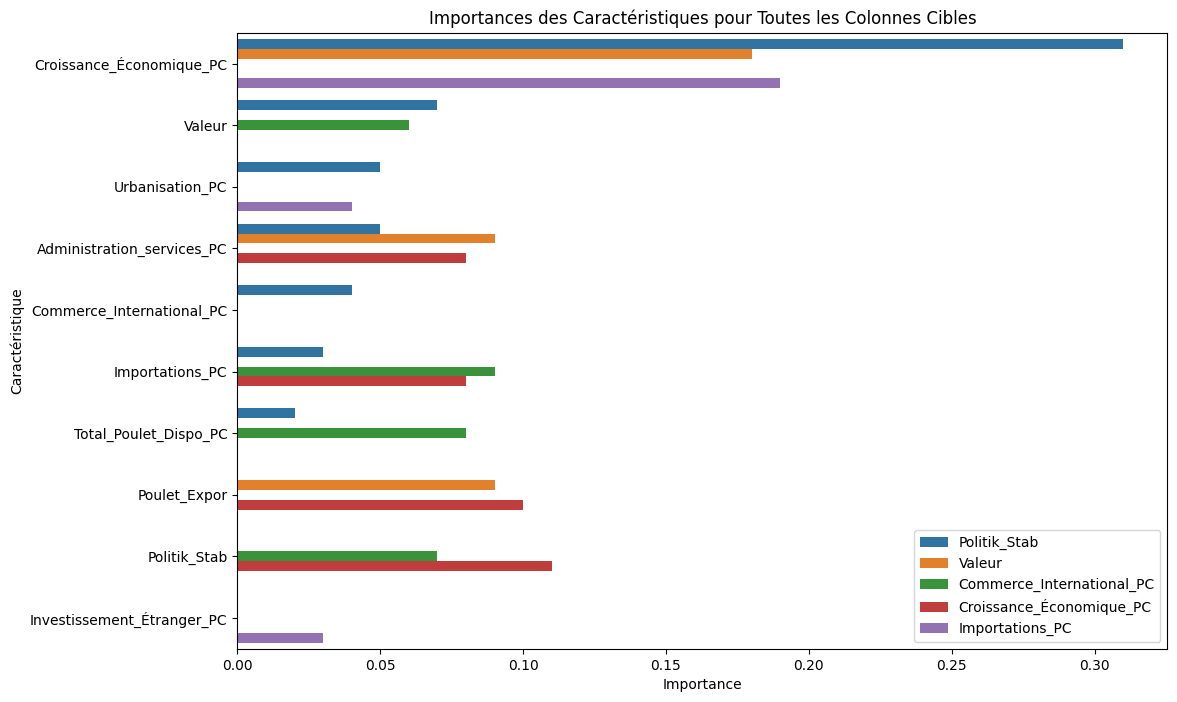

Caractéristiques non présentes dans le bilan final :
Poulet_Impor


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# Itérer sur chaque colonne pour la traiter comme cible
results = []
errors = []
importance_threshold = 0.01  # Seuil pour afficher les importances significatives

for target_column_name in df_casse.columns:
    try:
        print(f"Essai avec la colonne cible : {target_column_name}")

        # Vérifier la variabilité de la colonne cible (afficher min et max)
        print(f"Min: {df_casse[target_column_name].min()}, Max: {df_casse[target_column_name].max()}")

        # Convertir la colonne cible en catégories discrètes
        y = pd.cut(df_casse[target_column_name], bins=3, labels=False)

        # Séparer les caractéristiques et la cible
        X = df_casse.drop(target_column_name, axis=1)

        # Encoder les colonnes non numériques de X si nécessaire
        X = pd.get_dummies(X, drop_first=True)

        # Standardiser les caractéristiques
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Séparation des données en ensembles d'entraînement et de validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        # Entraînement du modèle (exemple avec RandomForestClassifier)
        model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

        # Validation croisée pour évaluer le modèle
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Scores de validation croisée pour {target_column_name}: {scores.mean()}")

        # Calcul de l'importance des caractéristiques
        result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=0)

        # Stocker les résultats
        feature_importances = {df_casse.drop(target_column_name, axis=1).columns[i]: result.importances_mean[i] for i in result.importances_mean.argsort()[::-1] if result.importances_mean[i] > importance_threshold}
        if feature_importances:
            results.append((target_column_name, feature_importances))
        else:
            print(f"Aucune importance significative trouvée pour {target_column_name}")

        # Affichage des importances des caractéristiques
        for feature, importance in feature_importances.items():
            print(f"{feature:<30} {importance:.3f}")

    except Exception as e:
        errors.append((target_column_name, str(e)))
        print(f"Erreur avec la colonne cible {target_column_name}: {e}")

# Affichage des résultats finaux
print("\nRésultats finaux :")
for target, importances in results:
    print(f"\nColonne cible : {target}")
    for feature, importance in importances.items():
        print(f"{feature:<30} {importance:.3f}")

print("\nErreurs :")
for target, error in errors:
    print(f"Colonne cible : {target} - Erreur : {error}")

# Créer le DataFrame summary_df avant de l'utiliser
summary = []

for target, importances in results:
    for feature, importance in importances.items():
        summary.append([target, feature, importance])

summary_df = pd.DataFrame(summary, columns=['Colonne Cible', 'Caractéristique', 'Importance'])
print(summary_df)

# Représentation graphique des importances des caractéristiques pour chaque colonne cible
for target, importances in results:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(importances.values()), y=list(importances.keys()))
    plt.title(f'Importances des Caractéristiques pour {target}')
    plt.xlabel('Importance')
    plt.ylabel('Caractéristique')
    plt.show()

# Représentation graphique des importances des caractéristiques pour toutes les colonnes cibles
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Caractéristique', hue='Colonne Cible', data=summary_df)
plt.title('Importances des Caractéristiques pour Toutes les Colonnes Cibles')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.legend(loc='best')
plt.show()

# Liste des caractéristiques initiales
initial_features = set(df_casse.columns)

# Liste des caractéristiques présentes dans les résultats finaux
final_features = set()
for target, importances in results:
    final_features.update(importances.keys())

# Caractéristiques non présentes dans le bilan final
missing_features = initial_features - final_features

# Affichage des caractéristiques manquantes
print("Caractéristiques non présentes dans le bilan final :")
for feature in missing_features:
    print(feature)

In [85]:
Choix_features=['Politik_Stab', 'Administration_services_PC','Commerce_International_PC','Valeur']

Choix_features = ["Total_Poulet_Dispo_PC","Administration_services_PC","Croissance_Économique_PC","Urbanisation_PC",'Valeur'] # DISTANCE

Choix_features = ["Total_Poulet_Dispo_PC","Commerce_International_PC","Politik_Stab","Importations_PC"] # DISTANCE

Choix_features = ['Valeur', 'Poulet_Expor', 'Poulet_Impor','Total_Poulet_Dispo_PC','Politik_Stab'] # DISTANCE  #   

Choix_features = ['Valeur', 'Poulet_Expor', 'Poulet_Impor','Total_Poulet_Dispo_PC','Politik_Stab']

In [86]:
# data_Frame Sélect

df_casse=data_Frame.copy()#[Choix_features].copy()#[Choix_features].copy()


### COVARIANCE HEATMAP ET LISTE_sort

Matrice de covariance :
                            Politik_Stab        Valeur   Poulet_Expor  \
Politik_Stab                    0.543714      2.609320      14.430171   
Valeur                          2.609320   1120.790187    1212.109783   
Poulet_Expor                   14.430171   1212.109783   79271.284921   
Poulet_Impor                   12.077863    552.408696   32210.932932   
Administration_services_PC    400.933920  32204.184611  875139.038856   
Commerce_International_PC       8.304722    -73.292397    3354.736022   
Investissement_Étranger_PC      1.898254     88.375902    2400.560462   
Croissance_Économique_PC      126.731501   2344.067584   10734.270165   
Importations_PC                -1.067863    -48.882368    -162.964877   
Urbanisation_PC                13.704206    925.695219   14319.494065   
Total_Poulet_Dispo_PC        -266.419627   8063.681043  148224.017735   

                             Poulet_Impor  Administration_services_PC  \
Politik_Stab              

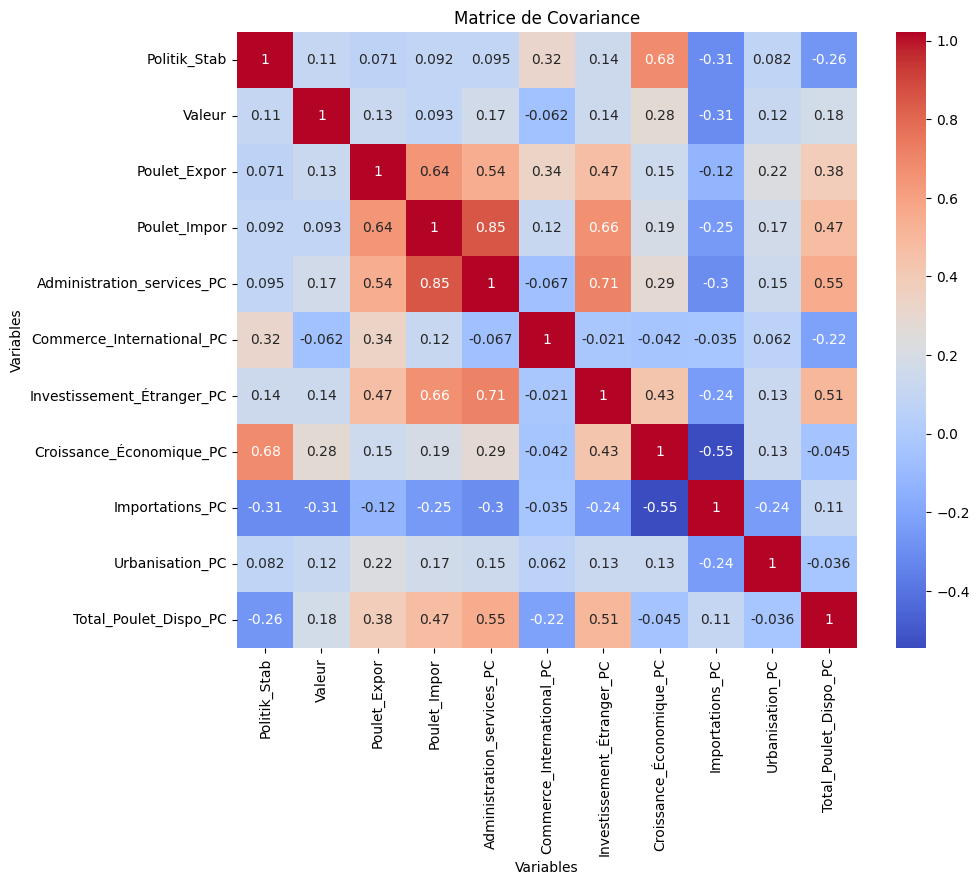

Poulet_Impor - Administration_services_PC : 0.8524818123411598
Administration_services_PC - Investissement_Étranger_PC : 0.7109501599971727
Politik_Stab - Croissance_Économique_PC : 0.6799069718725559
Poulet_Impor - Investissement_Étranger_PC : 0.6642983698874828
Poulet_Expor - Poulet_Impor : 0.6429400007951934
Administration_services_PC - Total_Poulet_Dispo_PC : 0.5525084284541654
Croissance_Économique_PC - Importations_PC : -0.5454884518666282
Poulet_Expor - Administration_services_PC : 0.5446491898120026
Investissement_Étranger_PC - Total_Poulet_Dispo_PC : 0.5052063371460325
Poulet_Impor - Total_Poulet_Dispo_PC : 0.4710015961216999
Poulet_Expor - Investissement_Étranger_PC : 0.4678098727576805
Investissement_Étranger_PC - Croissance_Économique_PC : 0.4322135810501414
Poulet_Expor - Total_Poulet_Dispo_PC : 0.3845372767969639
Poulet_Expor - Commerce_International_PC : 0.3353819931808938
Politik_Stab - Commerce_International_PC : 0.31701454021872416
Valeur - Importations_PC : -0.310842

In [87]:

# Supposons que df_casse est votre DataFrame
# df_casse = pd.read_csv('votre_fichier.csv')  # Exemple de chargement de données

# Calcul de la matrice de covariance à partir des données brutes
cov_matrix = df_casse.cov()

# Affichage de la matrice de covariance
print("Matrice de covariance :")
print(cov_matrix)

# Mise à l'échelle des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_casse)

# Calcul de la matrice de covariance à partir des données mises à l'échelle
cov_matrix_scaled = np.cov(scaled_data, rowvar=False)

# Affichage de la matrice de covariance mise à l'échelle
print("Matrice de covariance mise à l'échelle :")
print(cov_matrix_scaled)

# Définir les labels comme les noms des colonnes du DataFrame
labels = df_casse.columns

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix_scaled, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Matrice de Covariance')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

# Convertir la matrice de covariance en DataFrame pour une meilleure manipulation
df_covariance = pd.DataFrame(cov_matrix_scaled, index=labels, columns=labels)

# Créer une liste pour stocker les paires de variables avec leur covariance
covariance_list = []

# Parcourir les valeurs de la matrice de covariance et les ajouter à la liste
for i in range(len(labels)):
    for j in range(i+1, len(labels)):
        covariance_list.append((labels[i], labels[j], df_covariance.iloc[i, j]))

# Trier la liste par ordre de covariance
sorted_covariance_list = sorted(covariance_list, key=lambda x: abs(x[2]), reverse=True)

# Afficher la liste ordonnée
for pair in sorted_covariance_list:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

## POSTE DE CONTROLE

In [88]:
import pandas as pd

# Supposons que vous ayez une DataFrame avec des noms de variables
labels = ['Valeur', 'Poulet_Expor', 'Poulet_Impor','Total_Poulet_Dispo_PC','Politik_Stab']

# Création d'un DataFrame à partir de cov_matrix avec les noms de variables
df_cov_matrix = pd.DataFrame(cov_matrix, columns=labels, index=labels)

# Affichage de la matrice de covariance
df_cov_matrix


Valeur   Poulet_Expor   Poulet_Impor  \
Valeur                 1120.790187    1212.109783     552.408696   
Poulet_Expor           1212.109783   79271.284921   32210.932932   
Poulet_Impor            552.408696   32210.932932   33054.444958   
Total_Poulet_Dispo_PC  8063.681043  148224.017735  117235.596923   
Politik_Stab              2.609320      14.430171      12.077863   

                       Total_Poulet_Dispo_PC  Politik_Stab  
Valeur                          8.063681e+03      2.609320  
Poulet_Expor                    1.482240e+05     14.430171  
Poulet_Impor                    1.172356e+05     12.077863  
Total_Poulet_Dispo_PC           1.956701e+06   -266.419627  
Politik_Stab                   -2.664196e+02      0.543714

In [89]:
# 1° lancement  au dessus 
X_acp,pca,pcs,features,Scale_data_Mod = ACP_1(df_casse)


NOMBRE DE FEATURES  11 



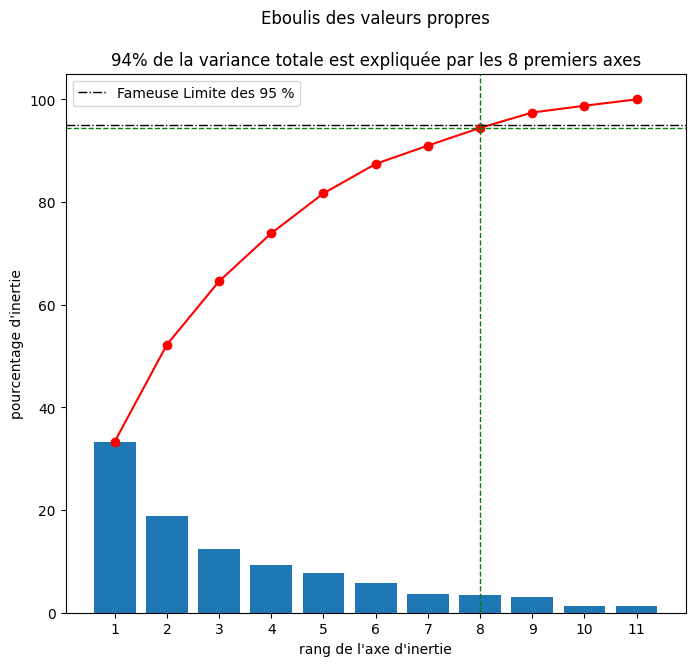


range(1, 12)


Empty DataFrame
Columns: [__________Variance_Explained, 52.22%, 11.34%, 22.44%, 9.31%, 45.69%, 15.92%, 12.9%, 41.11%, 39.08%, 34.67%, 36.9%, 42.68%, 7.01%, 4.9%, 6.55%, 26.66%, 22.33%, 18.1%, 36.32%, 9.11%, 9.19%, 31.24%, 36.79%, 7.08%, 28.22%, 13.52%, 20.21%, 13.69%, 15.34%, 4.32%, 24.62%, 21.7%, 10.68%, 21.87%, 20.11%, 8.73%, 10.76%, 12.79%, 12.33%, 15.08%, 4.79%, 10.57%, 4.78%, 13.59%, 6.97%, 34.57%, 4.22%, 6.44%, 20.13%, 2.57%, 11.23%, 4.68%, 15.81%, 9.01%, 17.12%]
Index: []

[0 rows x 56 columns]

PC_1/PC_2                   PC_5/PC_7  \
0                                 Politik_Stab                      Valeur   
1                     Croissance_Économique_PC                Poulet_Impor   
2                        Total_Poulet_Dispo_PC             Urbanisation_PC   
3                   Administration_services_PC  Administration_services_PC   
4                                 Poulet_Impor                Poulet_Expor   
5                              Importations_PC  Investissement_Étranger_PC   
6                   Investissement_Étranger_PC   Commerce_International_PC   
7                                 Poulet_Expor                Politik_Stab   
8                                       Valeur       Total_Poulet_Dispo_PC   
9                              Urbanisation_PC    Croissance_Économique_PC   
10                   Commerce_International_PC             Importations_PC   
Variance_Explained                      52.22%                      11.34%   

                                     PC_2/PC_7                   PC_6/PC_7  \
0                                 Politik_Stab             Importations_PC   
1                     Croissance_Économique_PC                Politik_Stab   
2                        Total_Poulet_Dispo_PC                Poulet_Impor   
3                                 Poulet_Impor  Administration_services_PC   
4                              Importations_PC             Urbanisation_PC   
5                   Administration_services_PC    Croissance_Économique_PC   
6                                 Poulet_Expor                Poulet_Expor   
7                   Investissement_Étranger_PC       Total_Poulet_Dispo_PC   
8                                       Valeur  Investissement_Étranger_PC   
9                    Commerce_International_PC                      Valeur   
10                             Urbanisation_PC   Commerce_International_PC   
Variance_Explained                      22.44%                       9.31%   

                                     PC_1/PC_3                   PC_3/PC_7  \
0                    Commerce_International_PC   Commerce_International_PC   
1                                 Poulet_Expor                Poulet_Expor   
2                                 Poulet_Impor                Poulet_Impor   
3                   Administration_services_PC                      Valeur   
4                   Investissement_Étranger_PC  Administration_services_PC   
5                                       Valeur    Croissance_Économique_PC   
6                     Croissance_Économique_PC                Politik_Stab   
7                        Total_Poulet_Dispo_PC  Investissement_Étranger_PC   
8                              Importations_PC             Importations_PC   
9                                 Politik_Stab       Total_Poulet_Dispo_PC   
10                             Urbanisation_PC             Urbanisation_PC   
Variance_Explained                      45.69%                      15.92%   

                                     PC_4/PC_7                   PC_1/PC_5  \
0                              Urbanisation_PC                      Valeur   
1                                 Politik_Stab  Administration_services_PC   
2                                 Poulet_Impor             Urbanisation_PC   
3                                       Valeur                Poulet_Impor   
4                   Administration_services_PC  Investissement_Étranger_PC   
5                                 Poulet_Expor                Poulet_Expor   
6                   Investissement_Étranger_PC   Commerce_International_PC   
7                     Croissance_Économique_PC       Total_Poulet_Dispo_PC   
8                              Importations_PC    Croissance_Économique_PC   
9                        Total_Poulet_Dispo_PC             Importations_PC   
10                   Commerce_International_PC                Politik_Stab   
Variance_Explained                       12.9%          

In [90]:

Graph_Ebouli(pca)
print()
pcs_df = aff_cp_grad(pcs,features)   
visualize_pcs_contributions(pcs_df, pc1_index=0, pc2_index=1)
contributions_pairs_df=create_contributions_pairs_df_v2(pcs_df)
print()

#  coloration de gradient basée sur la magnitude des contributions par rapport aux composantes principales
styled_contributions_pairs_df = contributions_pairs_df.iloc[:-2,:].astype(float).style.background_gradient(cmap='Grays', axis=None)

display(styled_contributions_pairs_df)


last_row = contributions_pairs_df.iloc[-1:].squeeze() 
last_row = last_row.to_frame().T
last_row=last_row
last_row.loc["__________Variance_Explained"]=last_row.loc["Variance_Explained"]
last_row = last_row.drop("Variance_Explained", axis=0)
# Reset the index
last_row.reset_index(inplace=True)
# Swap column headers with the first row
last_row.columns = last_row.iloc[0]
last_row = last_row.drop(0,axis=0)
display(last_row)

print()
display(features_order(contributions_pairs_df))


In [91]:
# chercher ceci apres voir Conflit ?

pcs_df = aff_cp_grad(pcs,features)  

create_contributions_pairs_df_v2(pcs_df)

#
features_order_df=features_order(contributions_pairs_df)#(contributions_pairs_df.iloc[:-1,:])
#features_order_df



# REmise dans l ordre de features_order_df
List_Col_PC=[]
pc_pairs = [(i, j) for i in range(1, len(pcs_df.columns) + 1) for j in range(i, len(pcs_df.columns) + 1) if i != j]
    # Calculer la magnitude des contributions pour chaque paire de composantes principales
for pc1, pc2 in pc_pairs:
    # Ajouter les résultats au DataFrame
    List_Col_PC.append(f'{"PC_"+str(pc1)}/{"PC_"+str(pc2)}')


# L ordre n a pas lair croissant Pour Variance_Explained !!!!

#features_order_df

features_order_df_Sort=features_order_df.copy()
features_order_df_Sort=features_order_df_Sort[List_Col_PC]
features_order_df_Sort#.head(1)

#features_order_df

Rank_feat_pcs(features_order_df_Sort,6)
Rank_feat_pcs(features_order_df,4)

range(1, 12)


Ligne 1: ['Politik_Stab', 'Commerce_International_PC', 'Urbanisation_PC', 'Valeur', 'Importations_PC', 'Poulet_Impor']
Ligne 2: ['Croissance_Économique_PC', 'Poulet_Expor', 'Investissement_Étranger_PC', 'Administration_services_PC']
Ligne 3: ['Total_Poulet_Dispo_PC']
Ligne 4: []
Ligne 5: []
Ligne 6: []
Ligne 7: []
Ligne 8: []
Ligne 9: []
Ligne 10: []
Ligne 11: []
Ligne 1: ['Politik_Stab', 'Valeur']
Ligne 2: ['Croissance_Économique_PC', 'Poulet_Impor']
Ligne 3: ['Total_Poulet_Dispo_PC', 'Urbanisation_PC']
Ligne 4: ['Administration_services_PC']
Ligne 5: ['Poulet_Expor', 'Importations_PC', 'Investissement_Étranger_PC']
Ligne 6: ['Commerce_International_PC']
Ligne 7: []
Ligne 8: []
Ligne 9: []
Ligne 10: []
Ligne 11: []


In [92]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Créez les widgets
chiffres_droite = widgets.IntSlider(
    value=1,
    min=1,
    max=9,
    step=1,
    description="Choix Paires Composantes:",
    style={'description_width': 'initial'},  # Ajuste la largeur de la description du curseur
    layout={'width': '400px'}  # Définit la largeur du curseur
)

chiffres_gauche = widgets.Dropdown(
    options=list(range(0, 10)),  # Commence à 1
    value=1,
    description="Nombre de gauche:",
    layout={'width': '200px'},  # Réduit la largeur pour le centrage
)

bouton_calculer = widgets.Button(description="Calculer")
resultat_text = widgets.Text(value="", description="Résultat:", layout={'width': '370px'})  # Définit la largeur de la boîte de texte

# Création du curseur pour Top_curseur
top_curseur = widgets.IntSlider(
    value=5,  # Valeur initiale
    min=1,  # Minimum
    max=20,  # Maximum
    step=1,  # Pas
    description="Top Features:",
    style={'description_width': 'initial'},
    layout={'width': '400px'}
)

output_df = widgets.Output()

# Fonction pour calculer et afficher le résultat
def afficher_resultat(_=None):
    with output_df:
        output_df.clear_output()  # Efface le contenu actuel de l'output
        if chiffres_gauche.value != chiffres_droite.value:
            cp1 = f"CP_{chiffres_gauche.value}"
            cp2 = f"CP_{chiffres_droite.value}"
            resultat_text.value = f"Top Contribution Composante {cp1} {cp2}"
            #resultat_df = visualize_pcs_contributions(pcs_df, chiffres_gauche.value, chiffres_droite.value)
            #display(resultat_df)
            
            # Appel à Cer f"CP_{chiffres_gauche.value}"
            cp2 = f"CP_{chiffres_droite.value}"
            resultat_text.value = f"Top Contribution Composante {cp1} {cp2}"
            resultat_df = visualize_pcs_contributions(pcs_df, chiffres_gauche.value, chiffres_droite.value)
            display(resultat_df)
            # Appel à Cercoloration avec le nouveau paramètre Top_curseur
            # Assurez-vous que Cercoloration retourne un objet affichable
            resultat_cercoloration = Cercoloration(pca, pcs, chiffres_gauche.value+1, chiffres_droite.value+1, features, top_curseur.value)
            # Affichez le résultat de Cercoloration
            display(resultat_cercoloration)
        
        else:
            print("Les nombres de gauche et de droite ne peuvent pas être les mêmes.")

chiffres_droite.observe(afficher_resultat, names='value')
chiffres_gauche.observe(afficher_resultat, names='value')  # Observer également les changements de valeur pour le dropdown

# Interrupteur pour afficher le dataframe
toggle_afficher_df = widgets.ToggleButton(
    value=False,
    description='Afficher le DataFrame',
    button_style='',  # 'success', 'info', 'warning', 'danger' ou ''
    tooltip='Cliquez pour afficher/masquer le DataFrame',
    icon='eye'  # Icones: https://fontawesome.com/v4.7/icons/
)

def toggle_dataframe(change):
    with output_df:
        clear_output()
        if change['new']:  # Si le bouton est activé
            display(pcs_df)
        # Pas besoin d'un else, clear_output efface déjà le contenu si le bouton est désactivé

toggle_afficher_df.observe(toggle_dataframe, names='value')

# Affichez les widgets 
#
hbox = widgets.HBox([widgets.Label(" "*100), chiffres_gauche, widgets.Label(" "*50), chiffres_droite])  # Ajoute un espace entre les widgets

display(hbox)
#display(widgets.HBox([top_curseur]))
display(bouton_calculer)
display(resultat_text)
display(toggle_afficher_df)
display(output_df)
display(hbox)
display(widgets.HBox([top_curseur]))
# Affiche le curseur Top_curseur

bouton_calculer.on_click(afficher_resultat)


Button(description='Calculer', style=ButtonStyle())

Text(value='', description='Résultat:', layout=Layout(width='370px'))

ToggleButton(value=False, description='Afficher le DataFrame', icon='eye', tooltip='Cliquez pour afficher/masq…

Output()

In [93]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Créer une liste de toutes les paires de composantes principales
pc_pairs = [(i, j) for i in range(1, len(pcs_df.columns) + 1) for j in range(i+1, len(pcs_df.columns) + 1)]

# Fonction d'affichage de la paire correspondant à la position du curseur et appel de Cercoloration
def display_and_execute(pca, pcs, cursor_value, num_vectors, all_vectors):
    if all_vectors:
        num_vectors = len(pcs_df.columns)
    preums, deuze = pc_pairs[cursor_value]
    #features = # Remplissez avec les données appropriées
    Cercoloration(pca, pcs, preums, deuze, features, num_vectors)

# Options pour le nombre de vecteurs
num_vectors_options = [2, 3, 4, 5]

# Utiliser interact pour créer un curseur et appeler la fonction display_and_execute
interact(display_and_execute,
         pca=widgets.fixed(pca),  # Remplacez pca par votre objet pca
         pcs=widgets.fixed(pcs),  # Remplacez pcs par votre objet pcs
         cursor_value=widgets.IntSlider(min=0, max=len(pc_pairs)-1, step=1, continuous_update=False),
         num_vectors=widgets.SelectionSlider(options=num_vectors_options, continuous_update=False),
         all_vectors=widgets.Checkbox(description='Tous les vecteurs'))

# Afficher le curseur
display()


interactive(children=(IntSlider(value=0, continuous_update=False, description='cursor_value', max=54), Selecti…

## Mettre cote a cote les 2 graphes 

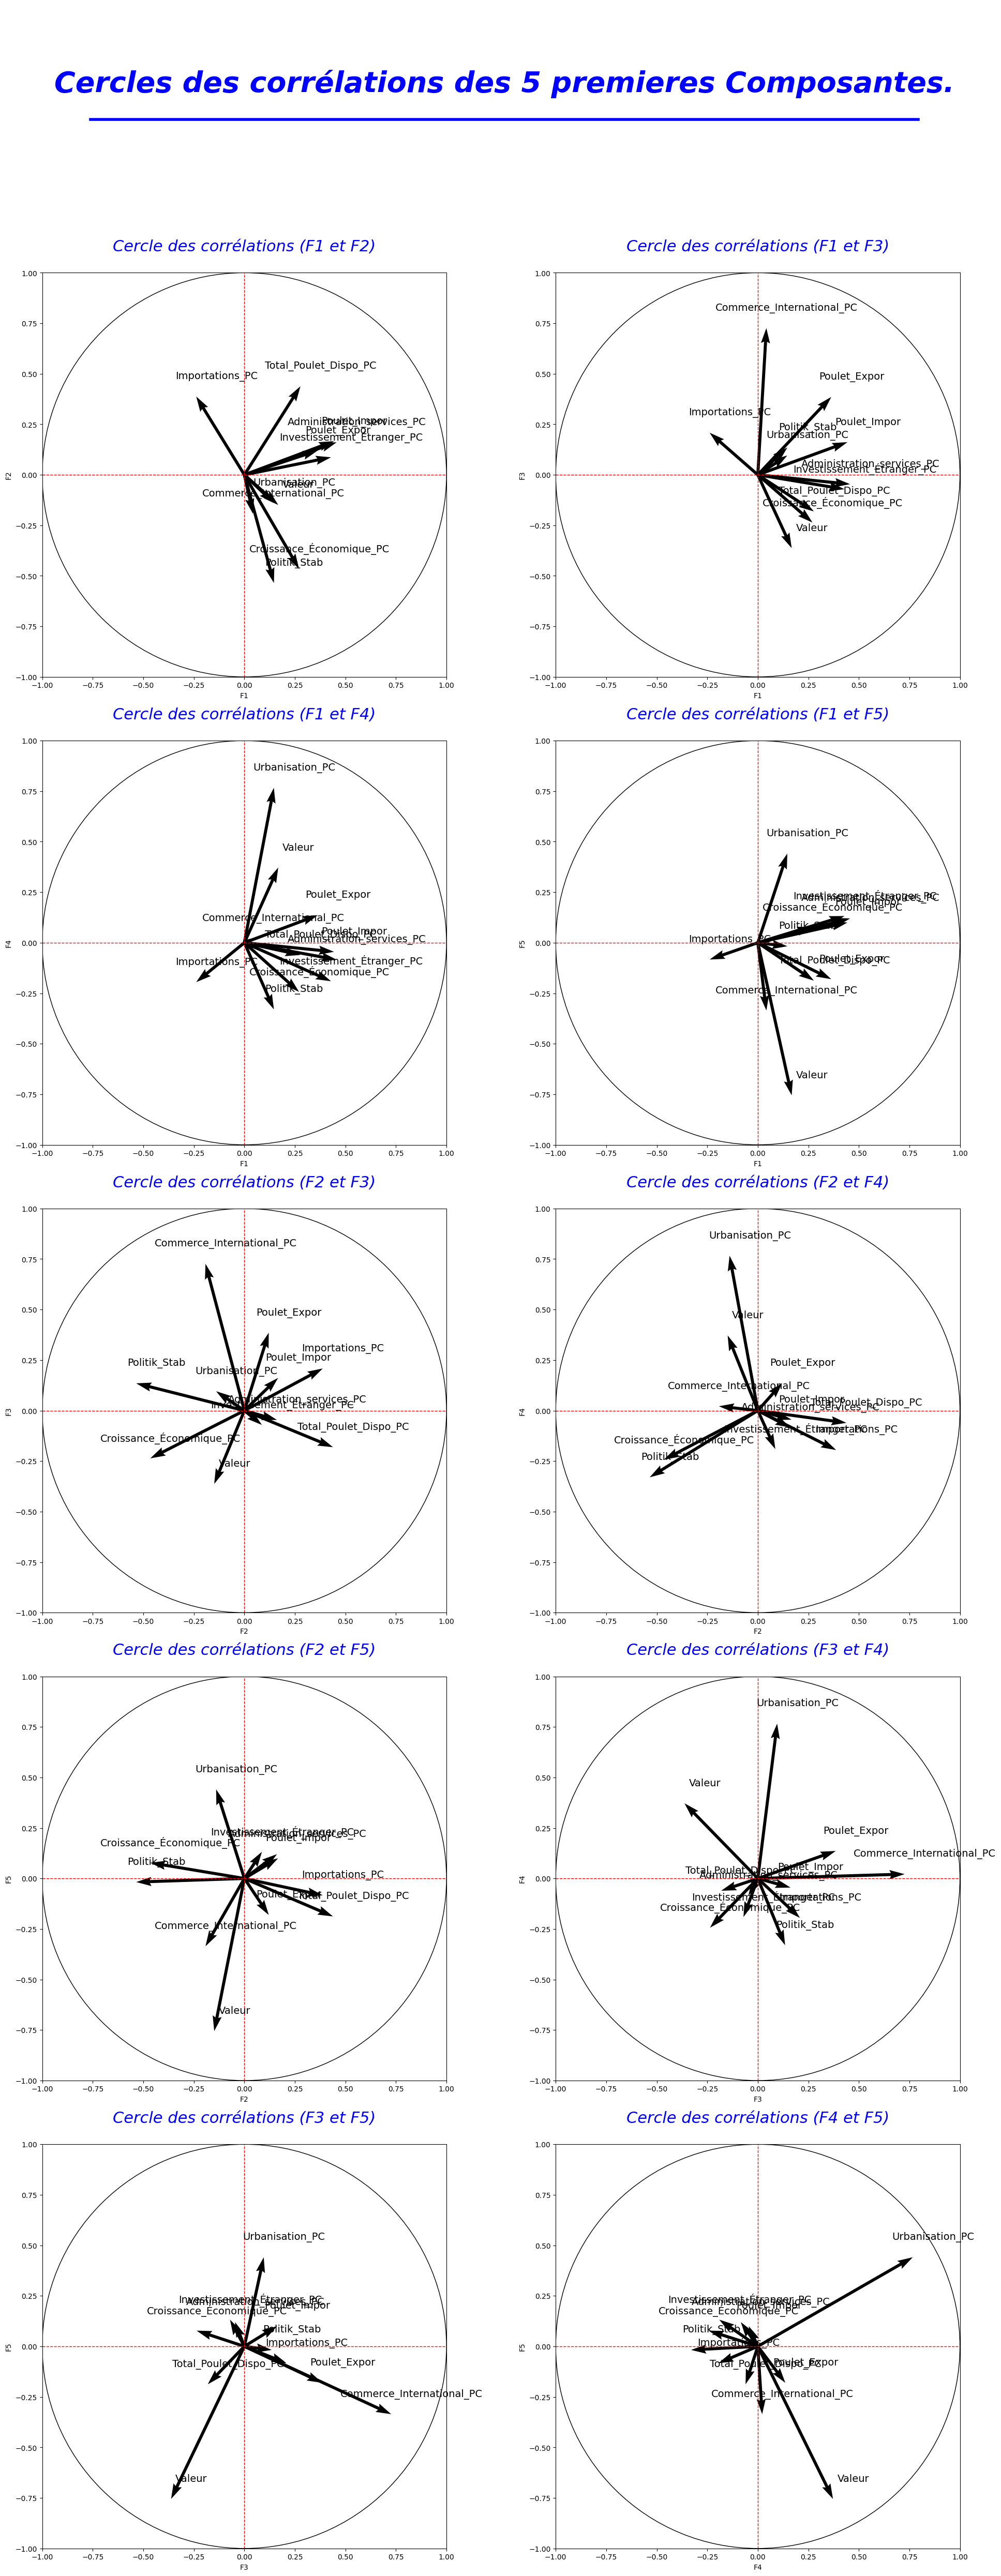

In [94]:
import matplotlib.pyplot as plt
import numpy as np

n_comp = 5
n_col = 2
axis_ranks = [(i, j) for i in range(n_comp) for j in range(i + 1, n_comp)]


labels = features

n_row = int(np.ceil(len(axis_ranks) / n_col)) + 1

plt.figure(figsize=(20, 9 * n_row))

# Calcul de l'index du premier sous-graphique
first_subplot_index = n_col + 1

for i in range(1, n_row * n_col + 1):
    if i <= len(axis_ranks):
        ax = plt.subplot(n_row, n_col, i)
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        d1, d2 = axis_ranks[i - 1]
        ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                  pcs[d1, :], pcs[d2, :],
                  angles='xy', scale_units='xy', scale=1)
        
        for k, (x, y) in enumerate(pcs[[d1, d2]].T):
        
            # Décalage des annotations
            offset_x = 0.1  # ajustez cette valeur selon votre besoin
            offset_y = 0.1  # ajustez cette valeur selon votre besoin
            
            ax.annotate(labels[k], (x + offset_x, y + offset_y),
                        ha='center', va='center',
                        fontsize='14')

        ax.plot([-1, 1], [0, 0], linewidth=1, color='red', ls='--')
        ax.plot([0, 0], [-1, 1], linewidth=1, color='red', ls='--')
        cercle = plt.Circle((0, 0), 1, fill=False)
        ax.add_artist(cercle)
        ax.set_xlabel('F{}'.format(d1 + 1))
        ax.set_ylabel('F{}'.format(d2 + 1))
        ax.set_title("Cercle des corrélations (F{} et F{})\n".format(d1 + 1, d2 + 1),color='blue', fontstyle='italic', fontsize=22)


# Ajout du titre avec soulignement
title_text = "\n\nCercles des corrélations des {} premieres Composantes.".format(n_comp)
title = plt.gcf().text(0.5, 1.05, title_text, ha='center', va='baseline', fontsize=40,
               color='blue', fontweight='bold', fontstyle='italic')

# Soulignement du titre
line = plt.Line2D([0.1, 0.9], [1.04, 1.04], color='blue', linewidth=4, transform=plt.gcf().transFigure)
plt.gcf().add_artist(line)


# Ajout d'un espacement supplémentaire en haut pour le titre
plt.subplots_adjust(top=0.9)

plt.tight_layout()
plt.show()


## INTERESSANT COMBO a voir

- distribution des composantes , peux etre a voir par clusters et afficher les features dominantes
- plus voir distribution par cluster et voir si on peux les rassembler


En examinant les distributions des valeurs  pour les 4 premières composantes par clusters

les clusters ont des distributions de valeurs différentes pour les 4 premières composantes ?
Caractéristiques distinctes entre les clusters ?

Similarités intra-cluster ?caractéristiques communes ?

Variabilité inter-cluster ?  
 niveaux de diversité ou d'hétérogénéité différents entre les clusters.

Identification de tendances ou de motifs

distributions fortement asymétriques ?
distributions plus uniformes ?

### # DataFrame à partir de ACP  principales + MIN_Max   ?? A test

In [95]:
from sklearn.preprocessing import MinMaxScaler

acp_df_casse = pd.DataFrame(data=X_acp, index=df_casse.index)
acp_df_casse.columns = acp_df_casse.columns.map(lambda x: f'{x+1}')

#  instance  MinMaxScaler  
scaler = MinMaxScaler(feature_range=(-1, 1))

# Adapter et transformer les données
acp_df_casse_Mx = scaler.fit_transform(acp_df_casse)

# Créer un nouveau DataFrame avec les données normalisées
#
acp_df_casse_Mx = pd.DataFrame(acp_df_casse_Mx, index=acp_df_casse.index, columns=acp_df_casse.columns)

acp_df_casse_Mx.head(1),acp_df_casse_Mx.shape

(               1        2         3         4         5         6         7  \
 Pays                                                                          
 Albanie -0.79215 -0.12999 -0.395174 -0.506642 -0.087794 -0.251646  0.259075   
 
                 8         9        10        11  
 Pays                                             
 Albanie -0.100191  0.003495  0.685029 -0.527181  ,
 (47, 11))

## Courbe de WCSS et Score de silhouette 


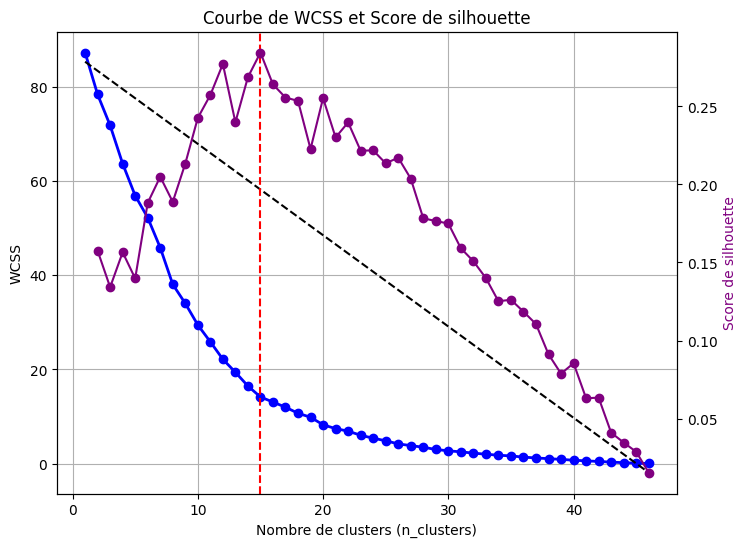

In [96]:
from sklearn.metrics import silhouette_score


# Fonction pour calculer la somme des carrés des distances (WCSS)
def calculate_wcss(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Fonction pour calculer les scores de silhouette
def calculate_silhouette_scores(data, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
    return silhouette_scores

# Fonction pour trouver le nombre optimal de clusters en utilisant la méthode du coude
def find_optimal_clusters(wcss):
    diffs = [wcss[i] - wcss[i-1] for i in range(1, len(wcss))]
    n_clusters_elbow = diffs.index(max(diffs)) + 2  # à partir de 2 clusters
    return n_clusters_elbow

data = acp_df_casse_Mx  # ENTREE DATA <<<<
max_clusters = len(data) - 1  # Nombre maximal de clusters

# Calcul de WCSS et des scores de silhouette
wcss = calculate_wcss(data, max_clusters)
silhouette_scores = calculate_silhouette_scores(data, max_clusters)

# Calcul du nombre optimal de clusters
n_clusters_elbow = find_optimal_clusters(wcss)

# Calcul de la pente de la ligne droite reliant le premier et le dernier point de la courbe WCSS
slope = (wcss[-1] - wcss[0]) / (max_clusters - 1)

# Calcul de l'ordonnée à l'origine de la droite
intercept = wcss[0]

# Calcul des coordonnées pour la droite
x_line = [1, max_clusters]
y_line = [slope * x + intercept for x in x_line]

# Calcul de l'intersection de la droite avec la courbe silhouette
intersection_index = silhouette_scores.index(max(silhouette_scores)) + 2  # Décalage dû à la plage de clusters utilisée
intersection_point = (intersection_index, silhouette_scores[intersection_index - 2])

# Affichage des graphiques
fig, ax1 = plt.subplots(figsize=(8, 6))

# Graphique de la somme des carrés des distances (WCSS)
ax1.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', linewidth=2, color='blue')
ax1.plot(x_line, y_line, linestyle='--', color='black')  # Ligne droite noire
ax1.set_title('Courbe de WCSS et Score de silhouette')
ax1.set_xlabel('Nombre de clusters (n_clusters)')
ax1.set_ylabel('WCSS')
ax1.grid(True)

# Ajout de la ligne verticale pointillée rouge à l'intersection avec la courbe silhouette
ax1.axvline(x=intersection_point[0], linestyle='--', color='red')

# Création du deuxième axe pour le score de silhouette
ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='purple')
ax2.set_ylabel('Score de silhouette', color='purple')

plt.show()


In [97]:
#   OK

import numpy as np
from sklearn.cluster import KMeans

# COL cluster.

def assign_clusters(data, n_clusters=9, random_state=42):
    # Créer un objet KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    # Adapter les données
    kmeans.fit(data)
    
    # Prédire les étiquettes des clusters
    cluster_assignments = kmeans.predict(data)
    
    # Ajouter les affectations de cluster au DataFrame
    clustered_data = data.copy()
    clustered_data['Cluster'] = cluster_assignments
    
    # Obtenir les centroides
    centroids = kmeans.cluster_centers_
    
    return clustered_data, centroids


In [98]:
acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=4, random_state=42)


In [99]:
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Fonction pour le tracé interactif en fonction des curseurs
def plot_interactive_clusters(cluster_num_interact, n_clusters):
    acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=n_clusters, random_state=42)
    
    # Générer des couleurs distinctes en fonction du nombre de clusters
    colors = [colorsys.hsv_to_rgb(h / n_clusters, 0.8, 0.8) for h in range(n_clusters)]
    
    plt.figure(figsize=(18, 9))
    cluster_handles = []
    cluster_countries_dict = {}
    
    for cluster_num in range(n_clusters):
        cluster_data = acp_df_casse_Mx_K[acp_df_casse_Mx_K['Cluster'] == cluster_num]
        X = cluster_data.iloc[:,:-1].mean(axis=1)
        
        sorted_indices = np.argsort(X)
        X_sorted = X[sorted_indices]
        cluster_data_sorted = cluster_data.iloc[sorted_indices]
        
        bar = plt.bar(cluster_data_sorted.index, X_sorted, color=colors[cluster_num], alpha=0.7, label=f'Cluster {cluster_num}')
        plt.scatter(cluster_data_sorted.index, X_sorted, color=colors[cluster_num], marker='o')
        cluster_handles.append(bar[0])
        cluster_countries_dict[f'Cluster {cluster_num+1}'] = cluster_data_sorted.index.tolist()
    
    plt.xlabel('Pays')
    plt.ylabel('Valeur de la caractéristique 1')
    plt.title(f'Clustering des données avec KMeans : {n_clusters}\n', fontsize=19)
    
    cluster_data = acp_df_casse_Mx_K[acp_df_casse_Mx_K['Cluster'] == cluster_num_interact]
    labels = cluster_data.index
    plt.xticks(labels, labels, rotation=85, color=colors[cluster_num_interact], fontsize=14)
    
    plt.grid(True, linestyle=':', linewidth=0.5, color='gray')
    plt.axhspan(plt.ylim()[0], plt.ylim()[1], facecolor='lightgray', alpha=0.5)
    
    legend_labels = [f'\n{cluster}:\n\n{chr(10).join(cluster_countries_dict[cluster])}' for cluster in cluster_countries_dict]
    plt.legend(handles=cluster_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    
    plt.show()    

# Curseur pour cluster_num_interact
cluster_num_slider = widgets.IntSlider(value=4, min=0, max=20, description='Cluster Num:')
# Curseur pour n_clusters
n_clusters_slider = widgets.IntSlider(value=7, min=2, max=20, description='Nombre de Clusters:')

# Appel de la fonction avec les curseurs interactifs
widgets.interactive(plot_interactive_clusters, cluster_num_interact=cluster_num_slider, n_clusters=n_clusters_slider)




interactive(children=(IntSlider(value=4, description='Cluster Num:', max=20), IntSlider(value=7, description='…

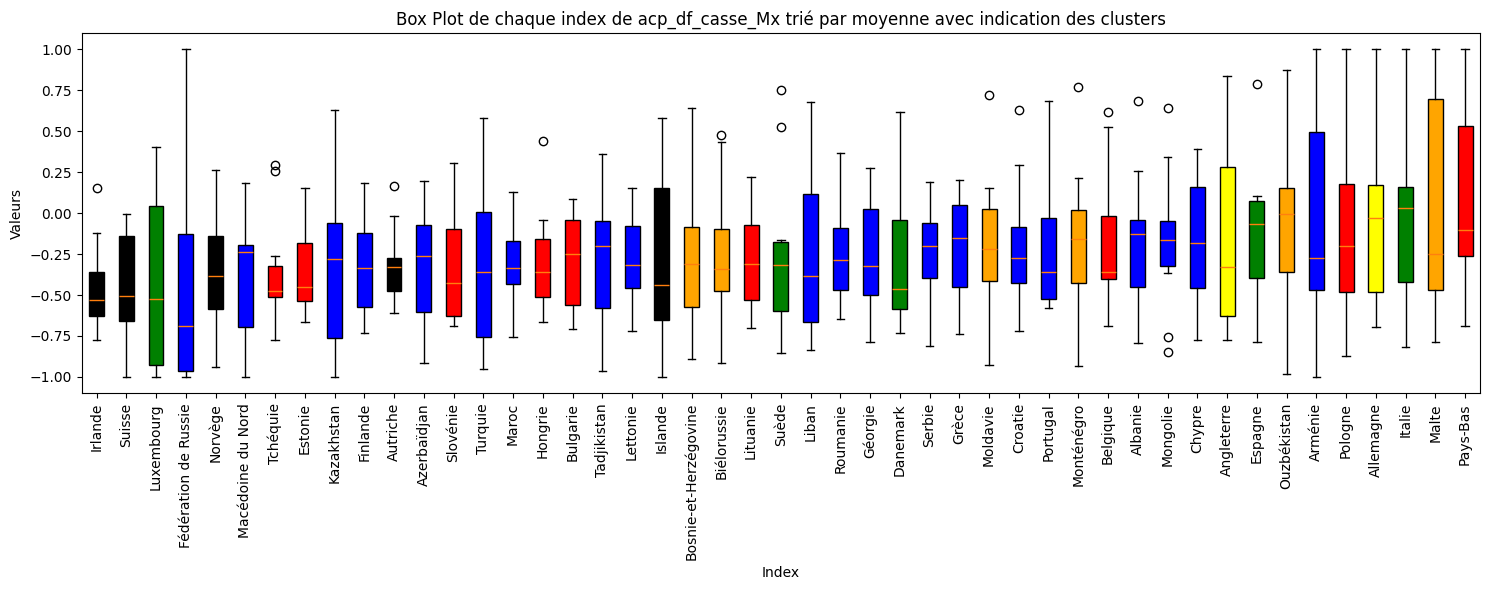

In [100]:
# Median ou moyenne 


n_clusters = 6
acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=n_clusters, random_state=42)

# Calculer la moyenne de chaque ligne (pour chaque index)
moyennes_par_index = acp_df_casse_Mx.mean(axis=1)

# Trier le DataFrame selon ces moyennes
acp_df_casse_Mx_trie = acp_df_casse_Mx.loc[moyennes_par_index.sort_values().index]

# Transposer le DataFrame trié pour préparer les données pour le boxplot
donnees_triees_transposees = acp_df_casse_Mx_trie.T

# Ajuster la taille de la figure
plt.figure(figsize=(15, 6))

# Créer un box plot pour chaque ligne (index) du DataFrame trié
# Les labels sont les index du DataFrame trié
boxplots = plt.boxplot(donnees_triees_transposees, labels=donnees_triees_transposees.columns, patch_artist=True)

# Définir un dictionnaire de couleurs pour les clusters
cluster_colors = {
    0: 'red', 1: 'blue', 2: 'green', 3: 'black', 4: 'orange', 5: 'yellow', 6: 'purple',
    7: 'cyan', 8: 'magenta', 9: 'lime', 10: 'brown', 11: 'olive', 12: 'navy',
    13: 'teal', 14: 'maroon', 15: 'grey', 16: 'black'  # Ajoutez davantage de couleurs si nécessaire
}

# Obtenir les clusters pour chaque index dans l'ordre trié
clusters_tries = acp_df_casse_Mx_K.loc[acp_df_casse_Mx_trie.index, 'Cluster']

# Colorier chaque boxplot selon le cluster de l'index correspondant
for patch, cluster in zip(boxplots['boxes'], clusters_tries):
    patch.set_facecolor(cluster_colors[cluster])

plt.title('Box Plot de chaque index de acp_df_casse_Mx trié par moyenne avec indication des clusters')
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()


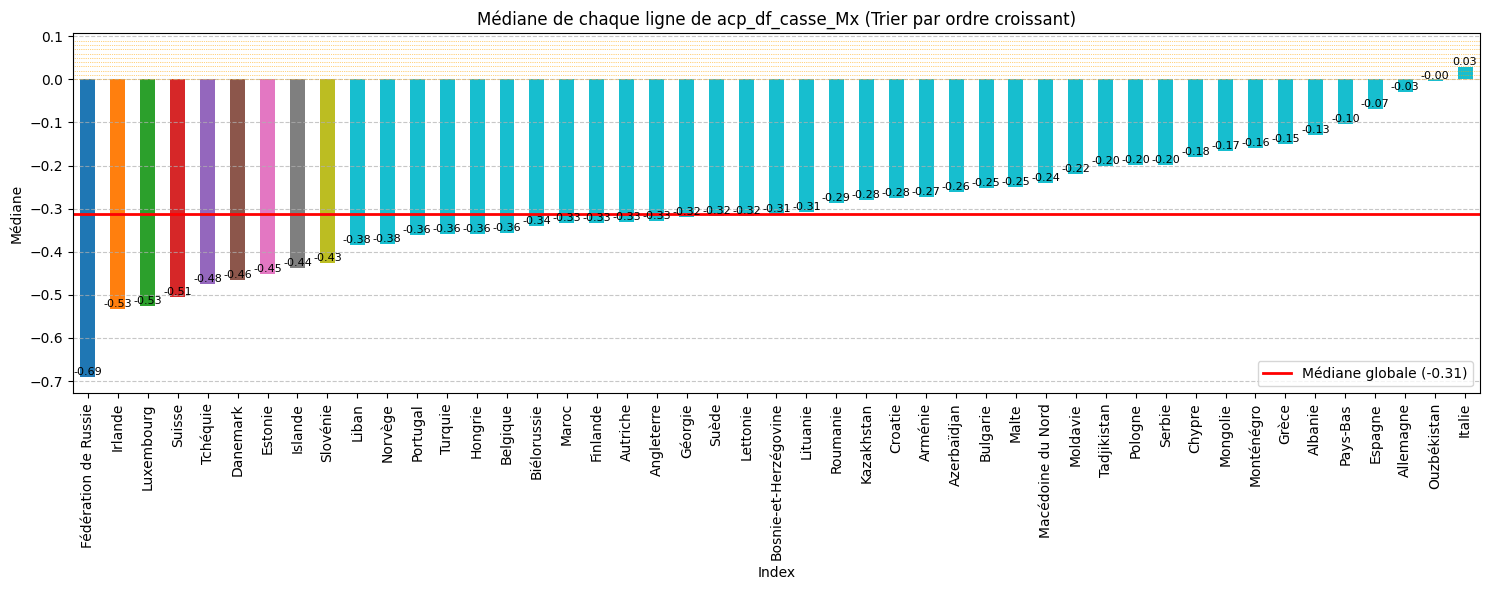

In [101]:
# Calculer la médiane de chaque ligne du DataFrame acp_df_casse_Mx
acp_df_casse_Mx_BAR = acp_df_casse_Mx.median(axis=1)

# Trier par ordre croissant
acp_df_casse_Mx_BAR_sorted = acp_df_casse_Mx_BAR.sort_values()

# Ajuster la taille de la figure
plt.figure(figsize=(15, 6))

# Couleurs attrayantes
colors = plt.cm.tab10(range(len(acp_df_casse_Mx_BAR_sorted)))

# Créer un graphique à barres à partir de acp_df_casse_Mx_BAR
bar_plot = acp_df_casse_Mx_BAR_sorted.plot(kind='bar', color=colors, rot=90)

# Ajout de la ligne de référence pour la médiane globale en rouge (ligne continue)
global_median = acp_df_casse_Mx_BAR_sorted.median()
plt.axhline(y=global_median, color='r', linestyle='-', linewidth=2, label=f'Médiane globale ({global_median:.2f})')

# Ajout des lignes pointillées pour chaque 0.1 en dessous de 0
for i in np.arange(0, 0.1, 0.01):
    plt.axhline(y=i, color='orange', linestyle=':', linewidth=0.5)

# Ajout des étiquettes de données
for i, v in enumerate(acp_df_casse_Mx_BAR_sorted):
    bar_plot.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Médiane de chaque ligne de acp_df_casse_Mx (Trier par ordre croissant)')
plt.xlabel('Index')
plt.ylabel('Médiane')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustement automatique des marges pour éviter la superposition des étiquettes
plt.show()


# 2 ° Part 

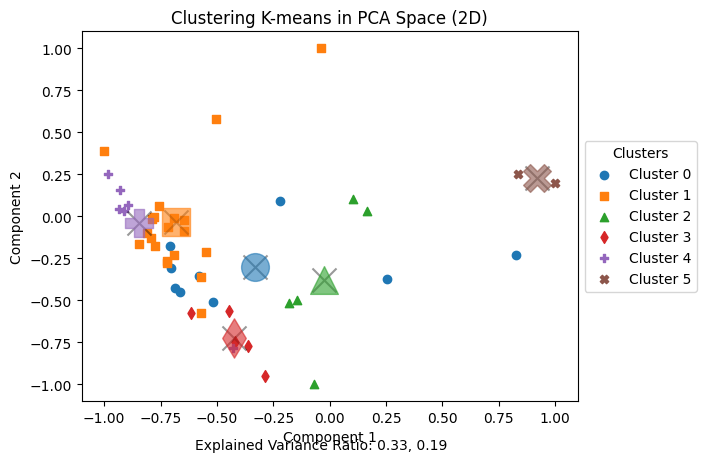

In [102]:
n_clusters = 6
acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=n_clusters, random_state=42)

# Nombre de clusters
n_clusters = len(centroids)

# Choix des formes et couleurs pour chaque cluster
markers = ['o', 's', '^', 'd', 'P', 'X']  # Liste de marqueurs
colors = plt.cm.tab10.colors[:n_clusters]

# Affichage des points pour chaque cluster
for cluster_idx in range(n_clusters):
    cluster_mask = acp_df_casse_Mx_K['Cluster'] == cluster_idx
    plt.scatter(acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 0], 
                acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 1], 
                c=[colors[cluster_idx]], marker=markers[cluster_idx], label=f'Cluster {cluster_idx}')

# Affichage des centroïdes avec les mêmes formes et couleurs que les points
for cluster_idx in range(n_clusters):
    centroid = centroids[cluster_idx]
    plt.scatter(centroid[0], centroid[1], marker='x', s=300,alpha=0.4, c='black')
    plt.scatter(centroid[0], centroid[1], marker=markers[cluster_idx], s=400, alpha=0.6, c=[colors[cluster_idx]])

# Ajout de titres, légendes et informations supplémentaires
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering K-means in PCA Space (2D)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Affichage de la variance expliquée par les composantes principales
explained_variance_ratio = pca.explained_variance_ratio_
plt.figtext(0.5, 0.01, f'Explained Variance Ratio: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}', ha='center', fontsize=10)

plt.show()


### les clusters singleton

### Malte ?

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
from sklearn.cluster import KMeans
from ipywidgets import FloatSlider, interactive

# Supposons que acp_df_casse_Mx et assign_clusters sont définis ailleurs dans votre code
# acp_df_casse_Mx = pd.read_csv('votre_fichier.csv')  # Exemple de chargement de données
# def assign_clusters(data, n_clusters, random_state=42):
#     # Votre fonction pour assigner les clusters
#     pass

# Points pour la droite existante
Points = [(0, 0), (1, 1)]  # Exemple de points, à remplacer par vos points réels

def update_plot(x_chosen):
    # Nettoyer le graphique précédent
    plt.clf()
    # Coordonnées des points
    Points_0 = (Points[0][0], Points[0][1])
    Points_1 = (Points[1][0], Points[1][1])
    # Calcul du coefficient directeur (m)
    m = (Points_1[1] - Points_0[1]) / (Points_1[0] - Points_0[0])
    # Calcul de l'ordonnée à l'origine (c) en utilisant l'un des points
    c = Points_0[1] - m * Points_0[0]
    # Limite
    L = 2
    Lim = (-L, L)
    # Génération des valeurs de x dans les limites
    x_values = np.linspace(Lim[0], Lim[1], 100)
    # Calcul des valeurs de y correspondantes
    y_values = m * x_values + c

    # Affichage de la droite existante
    plt.plot(x_values, y_values, label="Droite existante")
    # Points
    plt.scatter([Points_0[0], Points_1[0]], [Points_0[1], Points_1[1]], color='red', label='Centroids')
    # Ligne reliant les centroids
    plt.plot([Points_0[0], Points_1[0]], [Points_0[1], Points_1[1]], color='red', linestyle='--',
             label='Ligne reliant les centroids')
    # Calcul de y_chosen
    y_chosen = m * x_chosen + c
    # Affichage du point noir choisi
    plt.scatter(x_chosen, y_chosen, color='black', label='Point choisi')

    # Calcul de la pente de la droite perpendiculaire
    m_perpendicular = -1 / m
    # Calcul de l'ordonnée à l'origine (c_perpendicular) en utilisant le point choisi
    c_perpendicular = y_chosen - m_perpendicular * x_chosen

    # Calcul du point d'intersection entre les deux droites
    x_intersection = (c_perpendicular - c) / (m - m_perpendicular)
    y_intersection = m * x_intersection + c

    # Affichage du point d'intersection
    plt.scatter(x_intersection, y_intersection, color='green', label='Intersection')

    # Affichage de la droite perpendiculaire
    x_perpendicular = np.linspace(Lim[0], Lim[1], 100)
    y_perpendicular = m_perpendicular * x_perpendicular + c_perpendicular
    plt.plot(x_perpendicular, y_perpendicular, color='blue', label='Droite perpendiculaire')
# ____________________________________________
    n_clusters = 8  # Changer le nombre de clusters selon vos besoins
    acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=n_clusters, random_state=42)

    # Choix des formes et couleurs pour chaque cluster
    markers = ['o', 's', '^', 'd']  # Liste de marqueurs
    colors = [colorsys.hsv_to_rgb(h / n_clusters, 0.8, 0.8) for h in
              range(n_clusters)]  # Générer des couleurs distinctes en fonction du nombre de clusters

    Liste_Retire = list(acp_df_casse_Mx_K.index)  # Créer une liste contenant tous les individus

    # Affichage des points pour chaque cluster
    for cluster_idx, color in enumerate(colors):
        cluster_mask = acp_df_casse_Mx_K['Cluster'] == cluster_idx
        marker = markers[cluster_idx % len(markers)]  # Réinitialiser l'index des marqueurs
        plt.scatter(acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 0],
                    acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 1],
                    c=[color], marker=marker, label=f'Cluster {cluster_idx}')

        b = c_perpendicular
        m = m_perpendicular

        # Afficher les noms d'index des points
        for i, (xi, yi) in enumerate(zip(acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 0],
                                          acp_df_casse_Mx_K.loc[cluster_mask, acp_df_casse_Mx_K.columns != 'Cluster'].iloc[:, 1])):
            if yi > m_perpendicular * xi + c_perpendicular:
                side = acp_df_casse_Mx_K.loc[cluster_mask].index[i]
                Liste_Retire.remove(side)
            else:
                side = ''
            
            plt.text(xi, yi, f'{side}', fontsize=8, ha='center', va='bottom')

        # Affichage des centroïdes avec les mêmes formes et couleurs que les points
        centroid = centroids[cluster_idx]
        plt.scatter(centroid[0], centroid[1], marker='x', s=300, alpha=0.4, c='black')
        plt.scatter(centroid[0], centroid[1], marker=marker, s=400, alpha=0.6, c=color)
# ____________________________________________
    
    plt.xlim(Lim)
    plt.ylim(Lim)
    plt.gca().set_aspect('equal', adjustable='box')  # Pour assurer une échelle égale sur les deux axes
    plt.grid(True)

    # Déplacer la légende hors du graphe
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Ajuster la taille de la figure
    plt.gcf().set_size_inches(11, 7)

    plt.show()

    # À ce stade, la liste Liste_Retire contient les individus qui n'ont pas été affichés
    #print("Individus non affichés:", Liste_Retire)  

    return Liste_Retire

# Création du widget de réglage
slider = FloatSlider(value=0, min=-2, max=2, step=0.1, description='x_chosen')

# Création du graphique interactif
interactive_plot = interactive(update_plot, x_chosen=slider)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x_chosen', max=2.0, min=-2.0), Output()), _dom_class…

In [104]:
# Récupérer la liste Liste_Retire   >>>   .result

Liste_Garde = interactive_plot.result
print("Individus non affichés: \n", Liste_Garde)

Individus non affichés: 
 ['Albanie', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Biélorussie', 'Belgique', 'Bosnie-et-Herzégovine', 'Bulgarie', 'Croatie', 'Chypre', 'Tchéquie', 'Danemark', 'Estonie', 'Finlande', 'Géorgie', 'Grèce', 'Hongrie', 'Islande', 'Irlande', 'Kazakhstan', 'Lettonie', 'Liban', 'Lituanie', 'Luxembourg', 'Malte', 'Moldavie', 'Mongolie', 'Monténégro', 'Maroc', 'Macédoine du Nord', 'Norvège', 'Pologne', 'Portugal', 'Roumanie', 'Serbie', 'Slovénie', 'Suède', 'Suisse', 'Tadjikistan', 'Ouzbékistan']


In [105]:
Liste_Garde=['Albanie', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Biélorussie', 'Bosnie-et-Herzégovine', 'Bulgarie', 'Croatie',
             'Chypre', 'Tchéquie', 'Estonie', 'Finlande', 'Géorgie', 'Grèce', 'Hongrie', 'Islande', 'Irlande', 'Kazakhstan', 
             'Lettonie', 'Liban', 'Lituanie', 'Moldavie', 'Mongolie', 'Monténégro', 'Maroc', 'Macédoine du Nord', 
             'Norvège', 'Portugal', 'Roumanie', 'Serbie', 'Slovénie', 'Suisse', 'Tadjikistan', 'Turquie', 'Ouzbékistan','Luxembourg']


# affiche sur le cercle 

In [106]:
Liste_Garde  #acp_df_casse_Mx_K, centroids = assign_clusters(acp_df_casse_Mx, n_clusters=n_clusters, random_state=42)

['Albanie',
 'Arménie',
 'Autriche',
 'Azerbaïdjan',
 'Biélorussie',
 'Bosnie-et-Herzégovine',
 'Bulgarie',
 'Croatie',
 'Chypre',
 'Tchéquie',
 'Estonie',
 'Finlande',
 'Géorgie',
 'Grèce',
 'Hongrie',
 'Islande',
 'Irlande',
 'Kazakhstan',
 'Lettonie',
 'Liban',
 'Lituanie',
 'Moldavie',
 'Mongolie',
 'Monténégro',
 'Maroc',
 'Macédoine du Nord',
 'Norvège',
 'Portugal',
 'Roumanie',
 'Serbie',
 'Slovénie',
 'Suisse',
 'Tadjikistan',
 'Turquie',
 'Ouzbékistan',
 'Luxembourg']

In [107]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming acp_df_casse is your DataFrame and Liste_Garde is your list of individuals
# Select individuals from the DataFrame
acp_df_casse_selected = acp_df_casse[acp_df_casse.index.isin(Liste_Garde)]

# Standardize the data
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(acp_df_casse_selected.values)

# Create a DataFrame for the standardized data
Scale_data_Mod = pd.DataFrame(X_Scaled, columns=acp_df_casse_selected.columns, index=acp_df_casse_selected.index)

# Apply PCA
pca = PCA()
X_acp = pca.fit_transform(X_Scaled)

# Create a DataFrame for the PCA results
New_pca_df = pd.DataFrame(X_acp, columns=[f'PC{i+1}' for i in range(X_acp.shape[1])], index=acp_df_casse_selected.index)

New_pca_df.head(1)


PC1       PC2       PC3       PC4      PC5      PC6       PC7  \
Pays                                                                          
Albanie -1.244309 -0.156846  0.888226 -1.118348  0.65114 -0.21979 -0.633443   

              PC8       PC9      PC10      PC11  
Pays                                             
Albanie -0.307605  0.360667  0.000097 -0.079285

In [108]:
#  les composantes principales
pcs = pca.components_
# Calcul  correlation matrix
correlation_matrix = New_pca_df.T.corr()

In [109]:
from sklearn.cluster import KMeans

# Assuming you want to use KMeans for clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(New_pca_df)

# Add the cluster labels to the DataFrame
New_pca_df['Cluster'] = kmeans.labels_

# Now you can analyze the clusters further


In [110]:
New_pca_df.head(3)

PC1       PC2       PC3       PC4       PC5       PC6  \
Pays                                                                   
Albanie  -1.244309 -0.156846  0.888226 -1.118348  0.651140 -0.219790   
Arménie  -3.021955  3.441705 -2.660288 -1.254438 -2.116885  0.774924   
Autriche  1.506285 -0.457553 -0.064442 -0.987416  0.219135 -0.379489   

               PC7       PC8       PC9      PC10      PC11  Cluster  
Pays                                                                 
Albanie  -0.633443 -0.307605  0.360667  0.000097 -0.079285        0  
Arménie   0.681027 -0.062201 -0.307968 -0.224433  0.035428        0  
Autriche  0.651819  0.052126  0.254516 -0.155980 -0.168254        0

In [111]:
#Scale_data_Mod.reset_index()

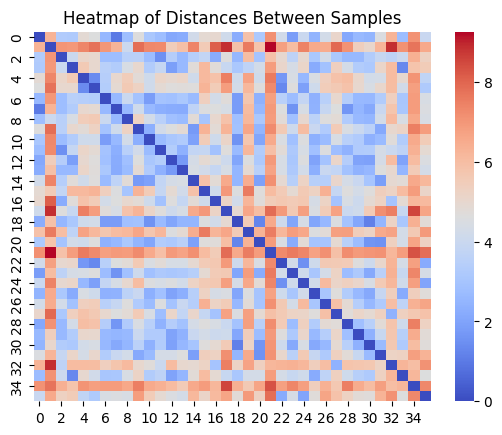

In [112]:
Scale_data_Mod.head(2)
# Calculate pairwise distance between samples
from scipy.spatial.distance import pdist, squareform
distances = squareform(pdist(New_pca_df, 'euclidean'))

# Plot heatmap of distances
sns.heatmap(distances, cmap='coolwarm')
plt.title('Heatmap of Distances Between Samples')
plt.show()


In [113]:


scaler = MinMaxScaler(feature_range=(-1, 1))

# Transform les données avec MinMaxScaler
New_pca_df_scaled = pd.DataFrame(scaler.fit_transform(New_pca_df), columns=New_pca_df.columns, index=New_pca_df.index)

print(New_pca_df_scaled.head())

                  PC1       PC2       PC3       PC4       PC5       PC6  \
Pays                                                                      
Albanie     -0.487788 -0.161153  0.043742 -0.532640  0.199641 -0.392848   
Arménie     -1.000000  1.000000 -1.000000 -0.583516 -0.823120 -0.086339   
Autriche     0.304771 -0.258183 -0.236471 -0.483693  0.040019 -0.442057   
Azerbaïdjan -0.166064  0.185697  0.483264  0.155149 -0.214314 -0.258936   
Biélorussie -0.537805 -0.594526 -0.630909  0.653103  0.349531 -0.222775   

                  PC7       PC8       PC9      PC10      PC11  Cluster  
Pays                                                                    
Albanie     -0.606767 -0.228322  0.254584 -0.003487 -0.313322     -1.0  
Arménie      0.450842 -0.064537 -0.470459 -0.416119 -0.127201     -1.0  
Autriche     0.427341  0.011765  0.139478 -0.290319 -0.457676     -1.0  
Azerbaïdjan -0.381833 -0.129037 -0.762576  0.145086 -0.237809     -1.0  
Biélorussie  0.376418  0.107168 -0.3

In [114]:
New_pca_df_scaled.iloc[:,:-1].min()


PC1    -1.0
PC2    -1.0
PC3    -1.0
PC4    -1.0
PC5    -1.0
PC6    -1.0
PC7    -1.0
PC8    -1.0
PC9    -1.0
PC10   -1.0
PC11   -1.0
dtype: float64

In [115]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(New_pca_df)

# Add cluster labels to the DataFrame
New_pca_df_scaled['Cluster'] = kmeans.labels_



In [116]:
import numpy as np
import matplotlib.pyplot as plt

def Cercoloration(pca, pcs, preums, deuze, features, num_vectors, acp_df_N_K):
    # Calculer la taille des composantes principales
    pcs_array = pcs_size(pcs, preums, deuze)
    
    A, B = (preums, deuze)
  
    # Calculer les normes euclidiennes
    norms = np.linalg.norm(pcs_array, axis=1)

    # Obtenir les indices des vecteurs en ordre décroissant de norme
    indices = np.argsort(norms)[::-1]

    # Sélectionner les num_vectors premiers indices
    selected_indices = indices[:num_vectors]

    # Sélectionner les vecteurs correspondants
    selected_pcs_array = pcs_array[selected_indices]

    # Liste des features
    variables_names = np.array(features)[selected_indices]

    # Liste de couleurs pour chaque feature
    colors = ['red', 'green', 'blue', 'orange', 'purple']

    # Facteur d'ajustement pour éloigner les textes du centre
    text_offset_factor = 1.2

    # Tracer le cercle de corrélation
    plt.figure(figsize=(9, 9))

    # Définir la base du cercle de corrélation
    base_circle = 1

    # Ajouter le cercle de corrélation
    plt.gca().add_artist(plt.Circle((0, 0), base_circle, color='blue', fill=False))

    for i, (x, y) in enumerate(selected_pcs_array):
        
        # Normaliser les coordonnées pour qu'elles touchent le cercle
        length = np.sqrt(x**2 + y**2)
        x_norm = x  / length * base_circle
        y_norm = y  / length * base_circle

        # Traçage de la flèche avec contour et la couleur correspondante
        plt.arrow(0, 0, x, y, color=colors[i % len(colors)], alpha=0.8, head_width=0.1, head_length=0.02, linewidth=2)

        # Traçage des traits noirs pointillés partant du centre et touchant le cercle
        plt.plot([0, x_norm], [0, y_norm], color='black', linestyle='--', alpha=0.5)

        # Placer le texte avec un décalage des coordonnées multiplié par le facteur d'ajustement
        plt.text(x_norm * text_offset_factor, y_norm * text_offset_factor, variables_names[i], fontsize=12)
      
    # Ajout des clusters sur le même graphique
    cluster_colors = ['red', 'green', 'blue', 'orange']
    for cluster_label, color in zip(sorted(acp_df_N_K['Cluster'].unique()), cluster_colors):
        cluster_data = acp_df_N_K[acp_df_N_K['Cluster'] == cluster_label]
        plt.scatter(cluster_data.iloc[:, preums-1], cluster_data.iloc[:, deuze-1], color=color, label=f'Cluster {cluster_label}', alpha=0.5)
        # Ajout des noms des points de cluster
    
        for i, index in enumerate(cluster_data.index):
            plt.text(cluster_data.iloc[i, preums-1], cluster_data.iloc[i, deuze-1], index, fontsize=10, ha='right', va='bottom')

    
    # Ajout des labels pour les axes x et y avec le pourcentage de variance expliquée
    explained_variance_percentage_PC1 = pca.explained_variance_ratio_[preums - 1] * 100
    explained_variance_percentage_PC2 = pca.explained_variance_ratio_[deuze - 1] * 100

    plt.xlabel('Composante principale {} ({}%)'.format(A, round(explained_variance_percentage_PC1, 2)))
    plt.ylabel('Composante principale {} ({}%)'.format(B, round(explained_variance_percentage_PC2, 2)))

    plt.title("Cercle des corrélations F_{} & F_{} ({}% variance expliquée)".format(A, B, round(explained_variance_percentage_PC1 + explained_variance_percentage_PC2)))
    Z=1.5
    W=1.5
    plt.xlim(-Z * base_circle, Z * base_circle)
    plt.ylim(-W * base_circle, W * base_circle)
    plt.grid()
    plt.show()


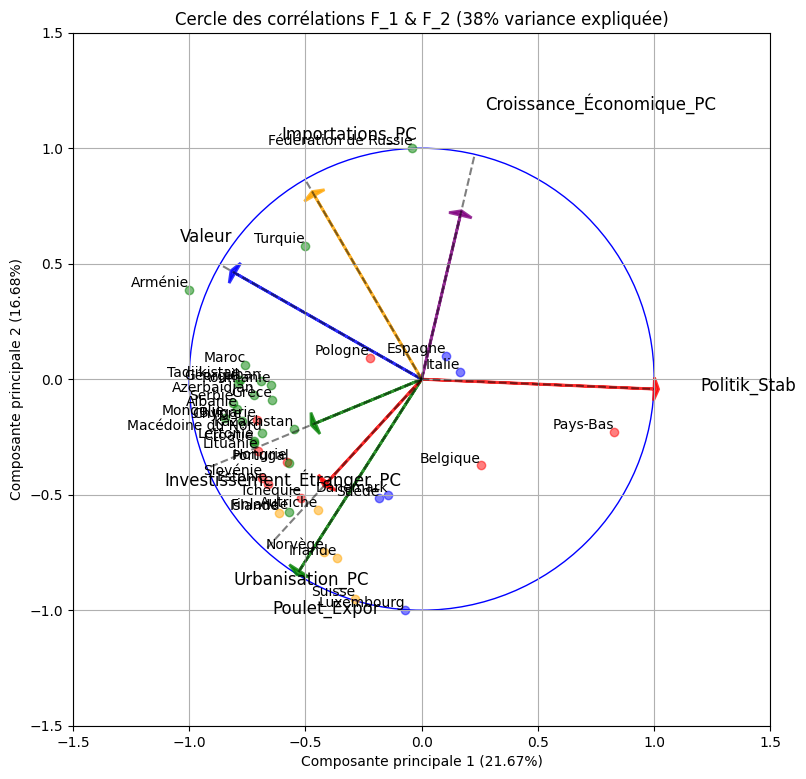

In [117]:
Cercoloration(pca, pcs, 1, 2, features, 7,acp_df_casse_Mx_K)# acp_df_N_K)


## 

## 
